In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import seaborn.objects as so

["['begin_B', 'begin_CP', 'begin_C', 'begin_OOA', 'end_C', 'end_OOA']_3.parquet", "['begin_B', 'end_B', 'end_CP']_3.parquet", "['begin_D', 'begin_B', 'begin_CP', 'begin_C', 'begin_OOA', 'end_CP']_3.parquet", "['begin_B', 'begin_CP', 'begin_C', 'begin_OOA', 'end_D', 'end_B', 'end_C']_3.parquet", "['begin_D', 'begin_CP', 'begin_OOA', 'end_C']_3.parquet", "['begin_D', 'begin_CP', 'begin_C', 'end_CP']_3.parquet", "['begin_D', 'begin_B', 'begin_C', 'end_D', 'end_B', 'end_CP', 'end_C']_3.parquet", "['begin_B', 'begin_CP', 'begin_C', 'begin_OOA', 'end_B', 'end_CP', 'end_C']_3.parquet", "['begin_B', 'begin_CP', 'begin_OOA', 'end_B', 'end_CP', 'end_OOA']_3.parquet", "['begin_B', 'begin_CP', 'begin_C', 'begin_OOA', 'end_CP', 'end_C']_3.parquet", "['begin_D', 'begin_C', 'begin_OOA', 'end_D', 'end_B']_3.parquet", "['begin_D', 'begin_B', 'begin_CP', 'begin_C', 'begin_OOA', 'end_D', 'end_B', 'end_C']_3.parquet", "['begin_B', 'begin_CP', 'begin_C', 'end_B', 'end_C']_3.parquet", "['begin_B', 'begin_CP

/var/folders/5x/mbw4tfss45b3h4qfg6gpkcx40000gn/T/ipykernel_11349/2786525445.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(figsize=(7, 6))


file ::: ../../models/KMeans/cluster3/['begin_D', 'begin_B', 'begin_CP', 'begin_OOA', 'end_D']_3.parquet
Var :: ['begin_D', 'begin_B', 'begin_CP', 'begin_OOA', 'end_D']_3
DF ::            total_time begin_D  begin_B  begin_CP  begin_OOA  end_D  \
0     3 days 01:27:48   500.0    262.0     262.0      304.0  500.0   
1     3 days 04:15:10   500.0    262.0     262.0      304.0  501.0   
2     0 days 05:24:03   500.0    262.0     262.0      304.0  499.0   
3     4 days 00:22:26   500.0    262.0     262.0      304.0  500.0   
4    12 days 00:39:27   499.0    261.0     261.0      304.0  500.0   
...               ...     ...      ...       ...        ...    ...   
1063  0 days 00:43:10    16.0     14.0      14.0        7.0   16.0   
1064  0 days 19:01:39    14.0     12.0      12.0        8.0   16.0   
1065  0 days 00:16:22    14.0     12.0      12.0        8.0   16.0   
1066  0 days 00:33:35     2.0      3.0       3.0        3.0   16.0   
1067  0 days 00:09:14     2.0      3.0       3.0     

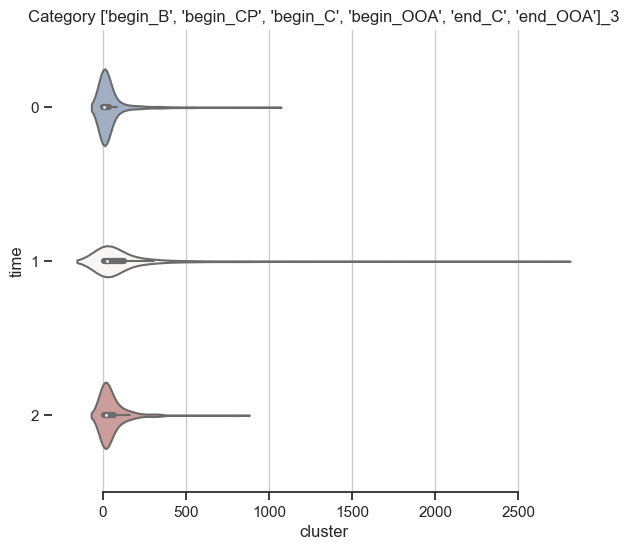

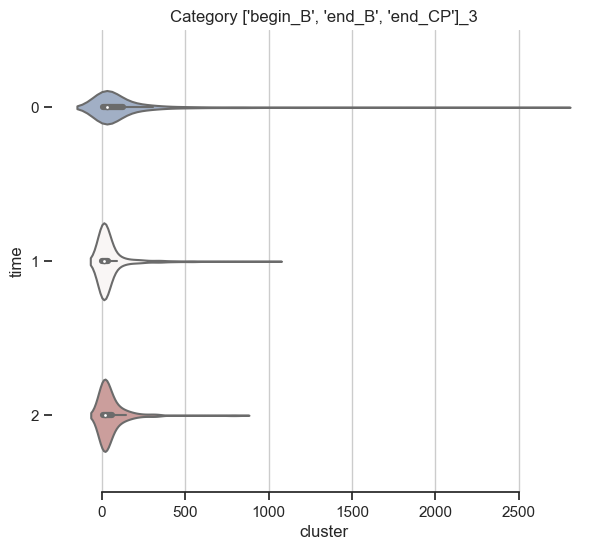

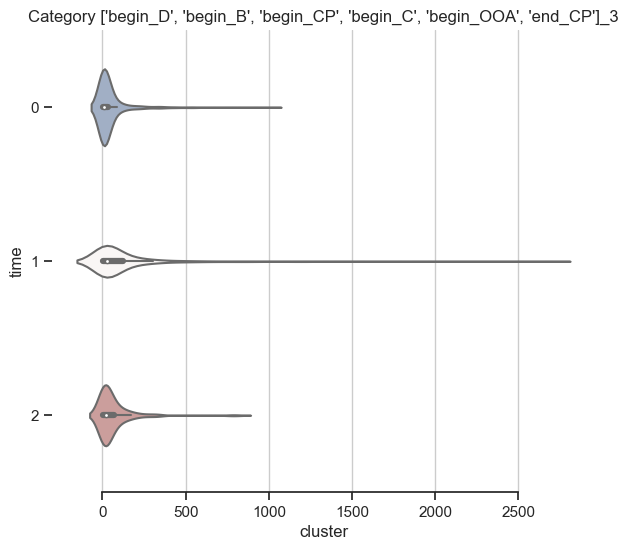

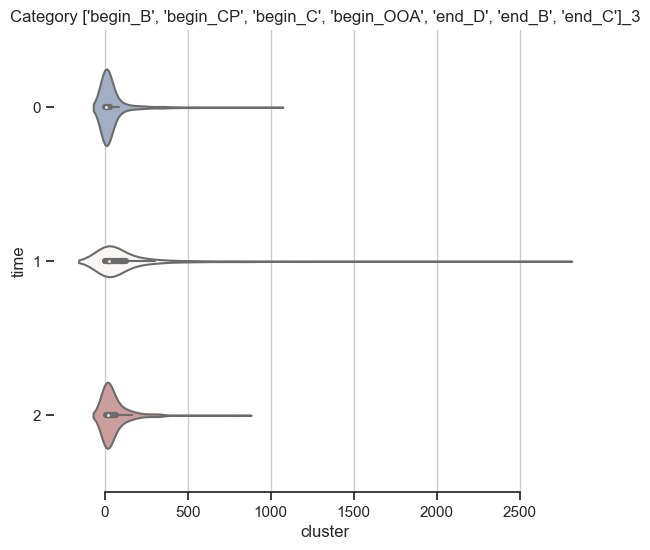

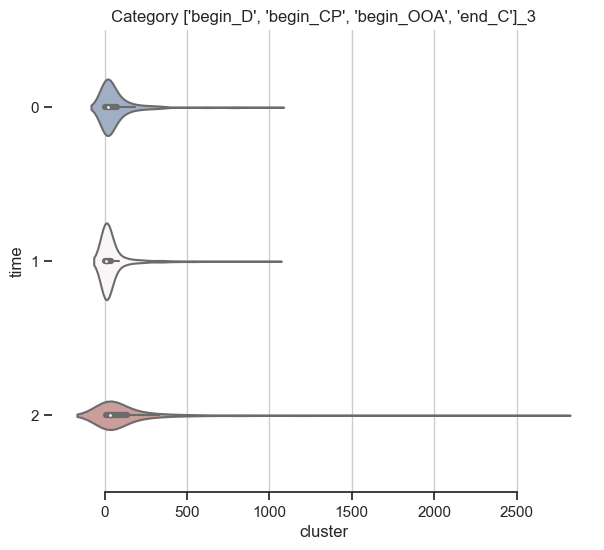

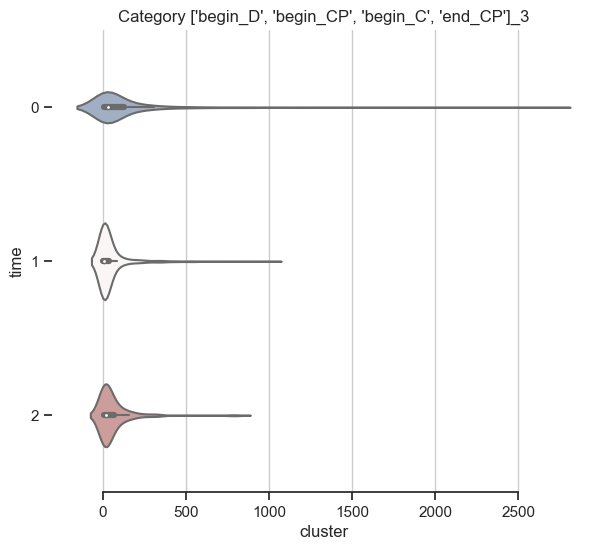

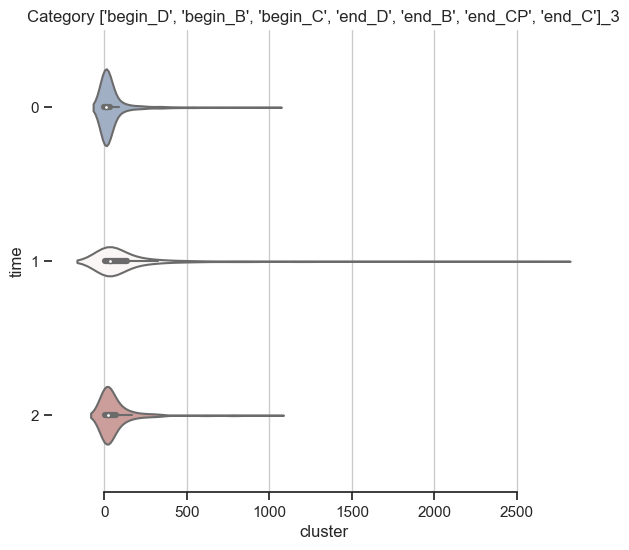

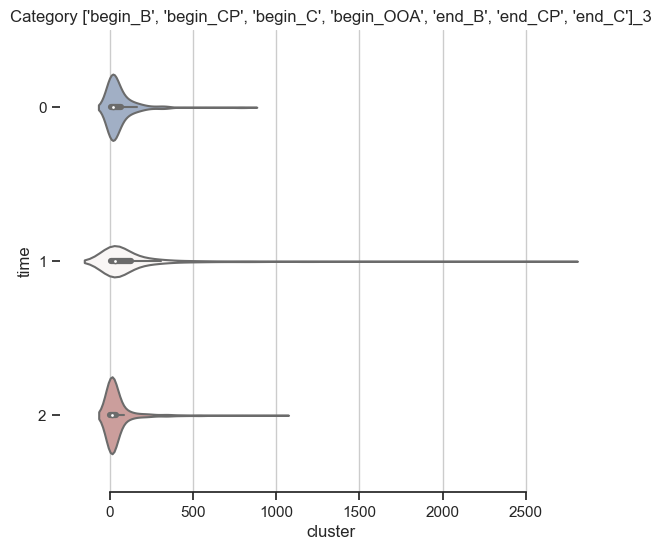

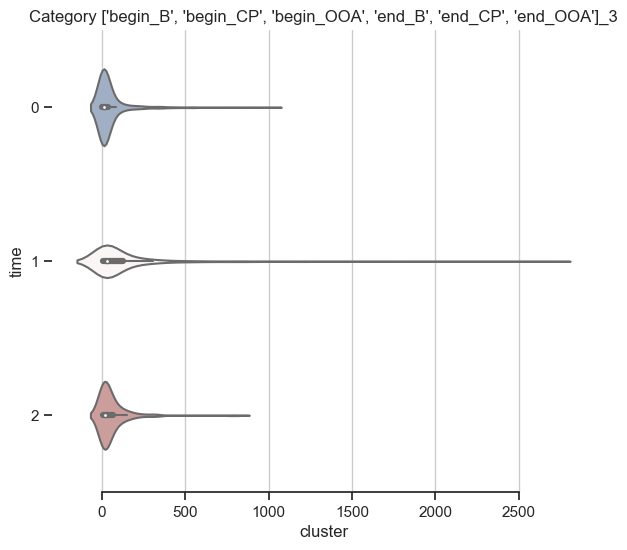

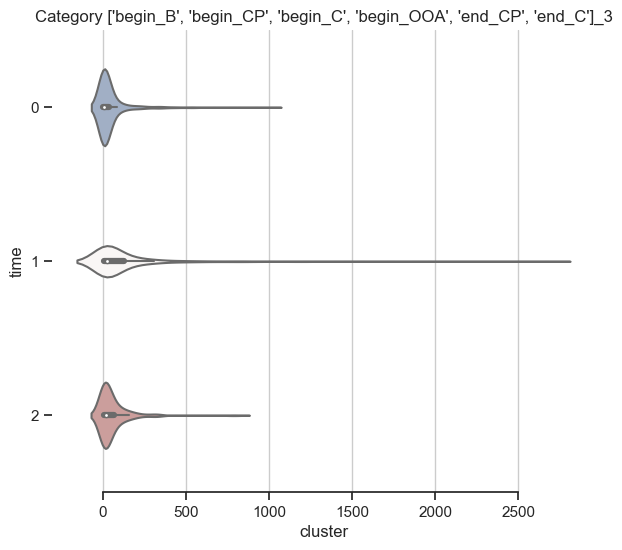

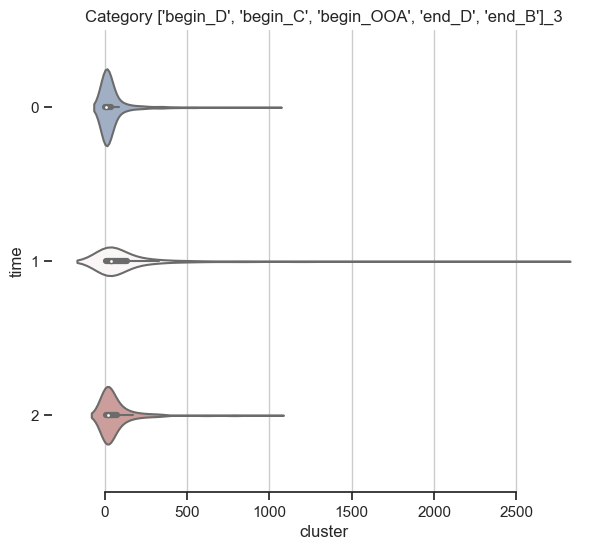

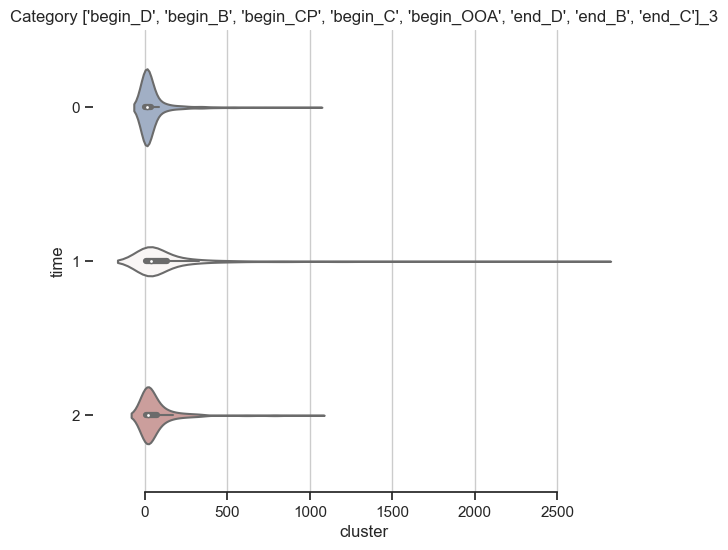

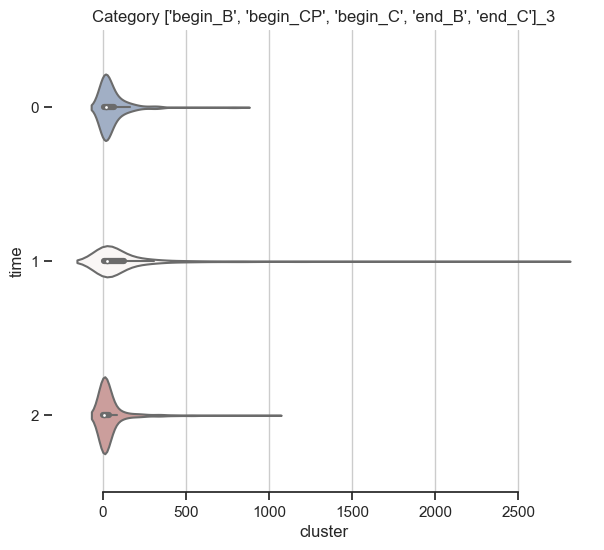

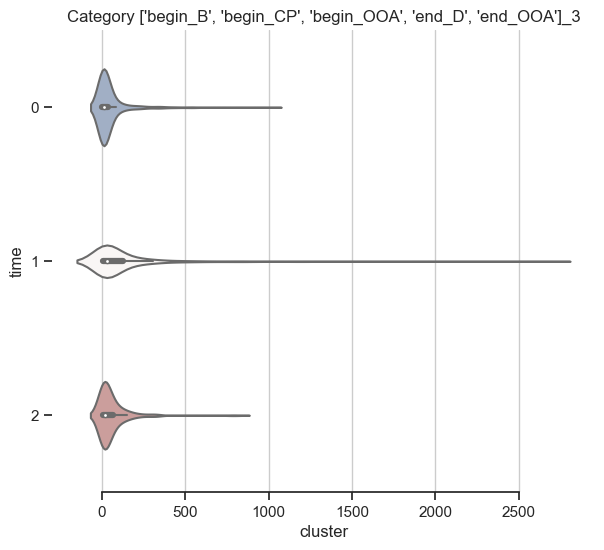

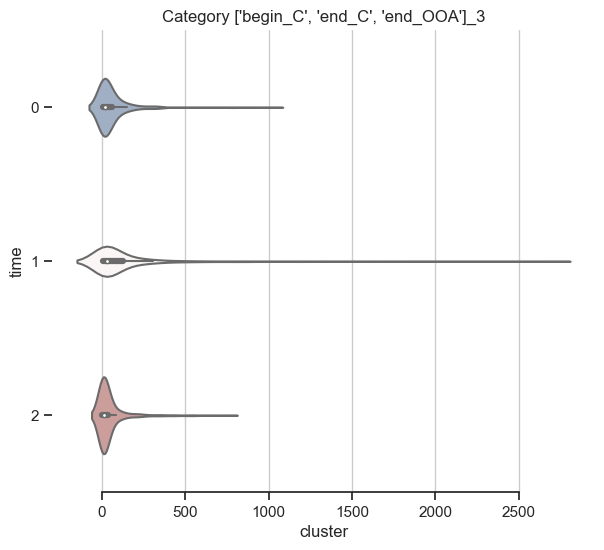

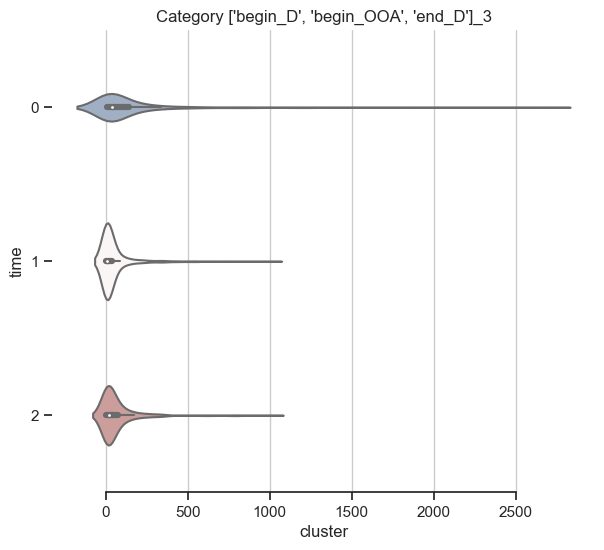

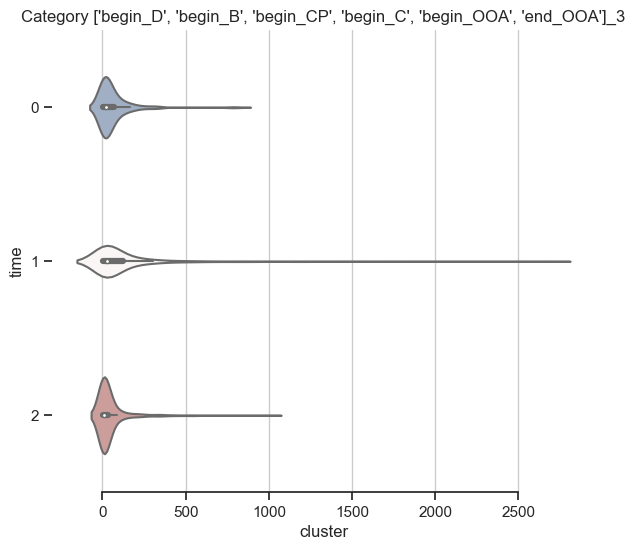

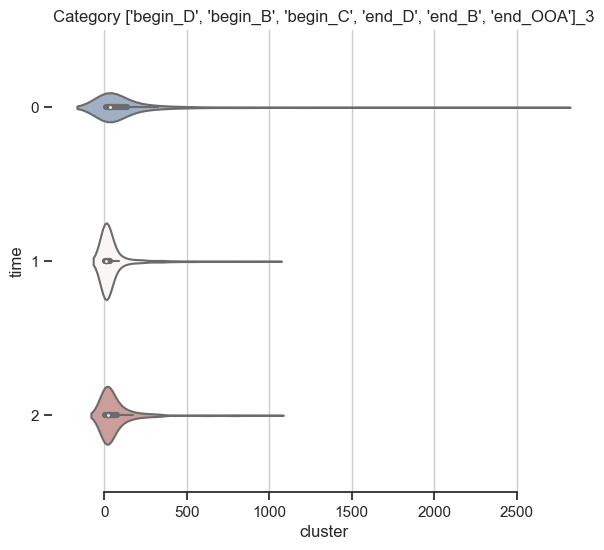

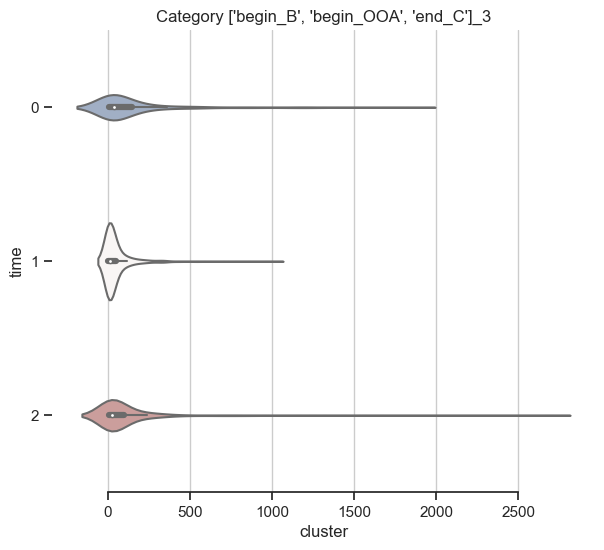

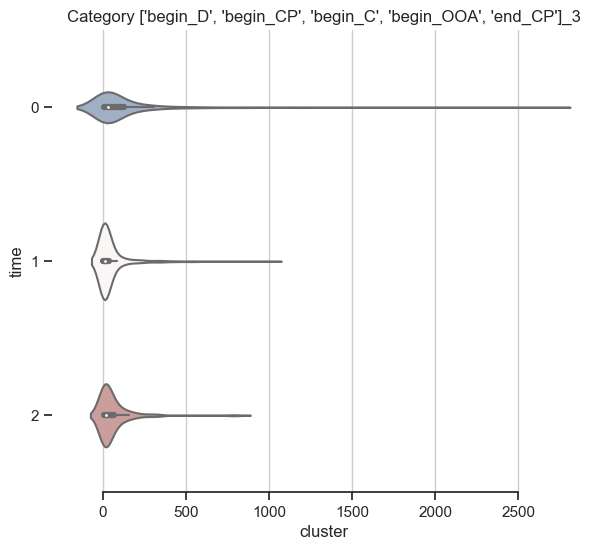

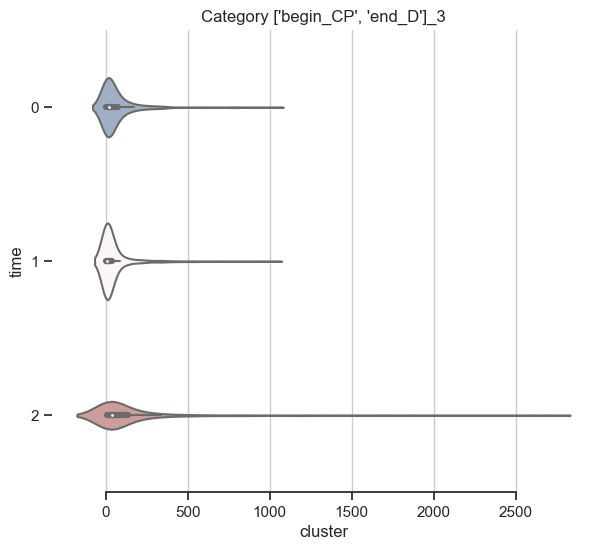

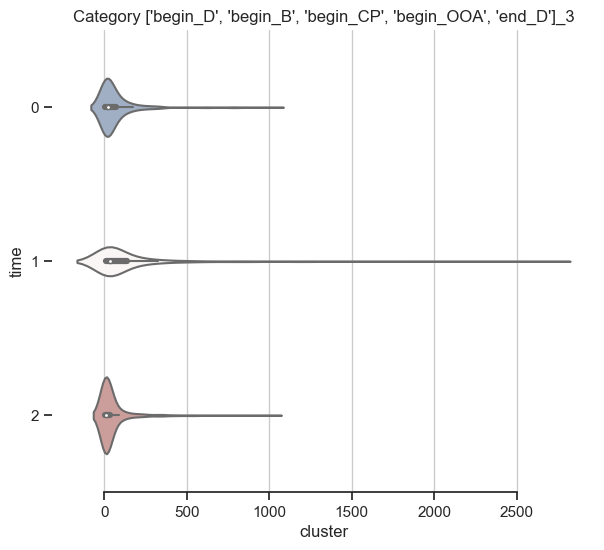

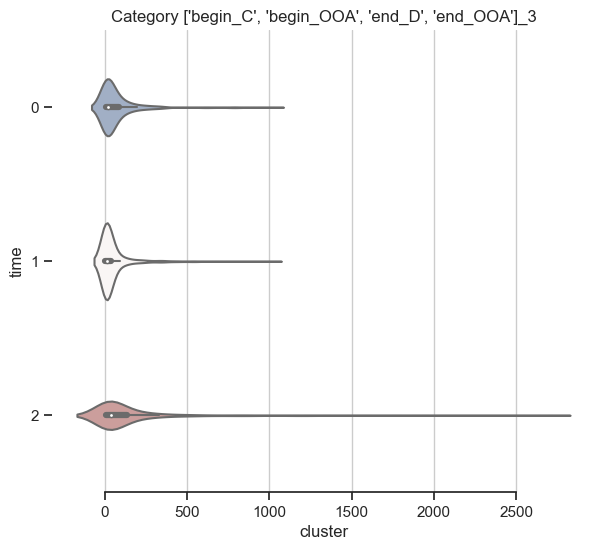

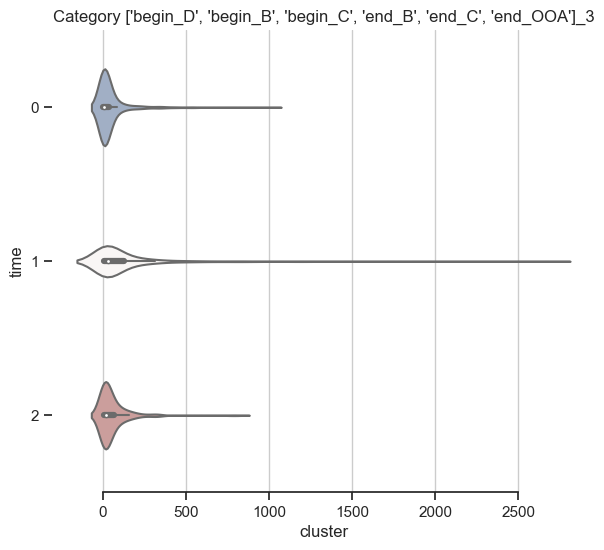

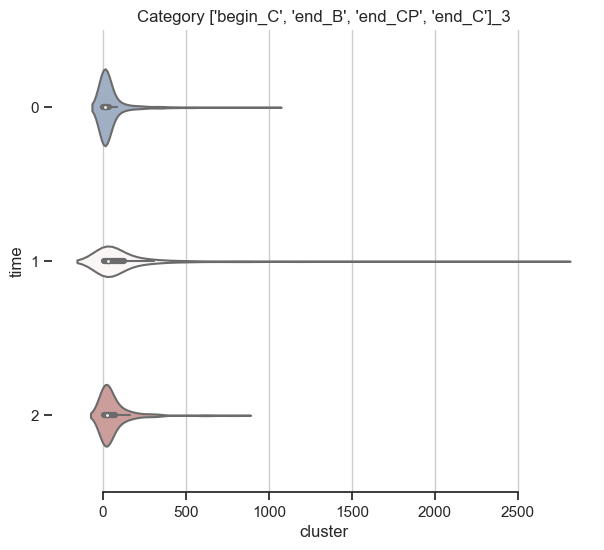

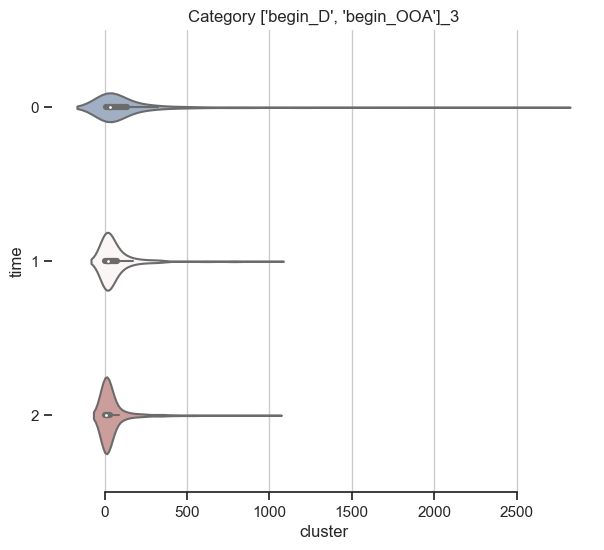

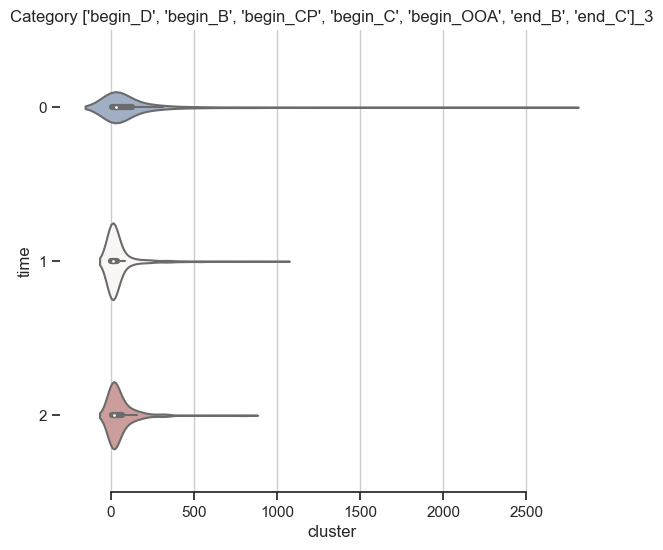

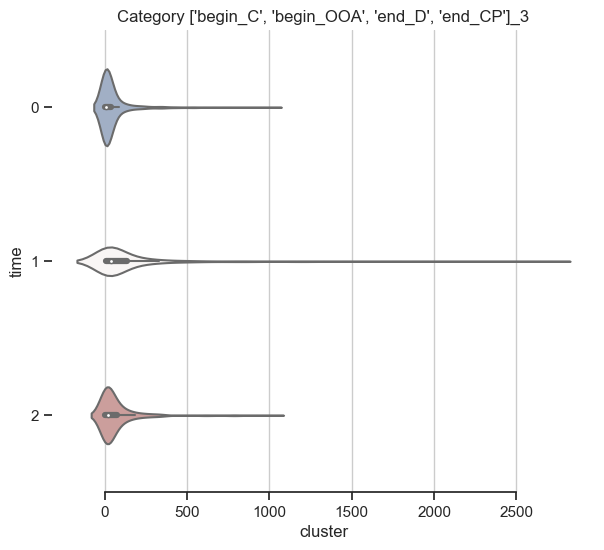

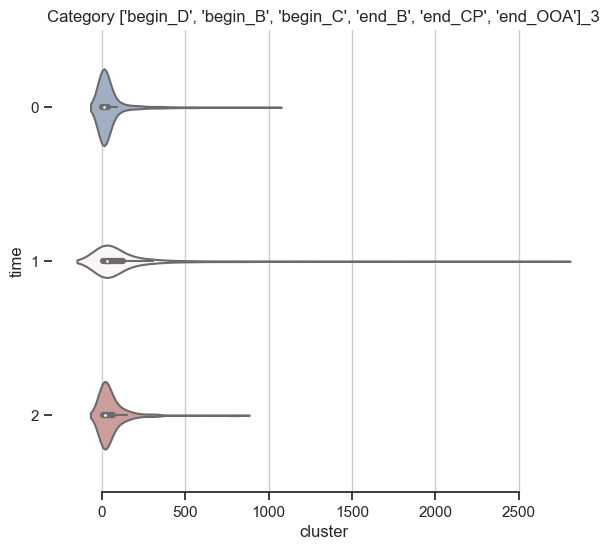

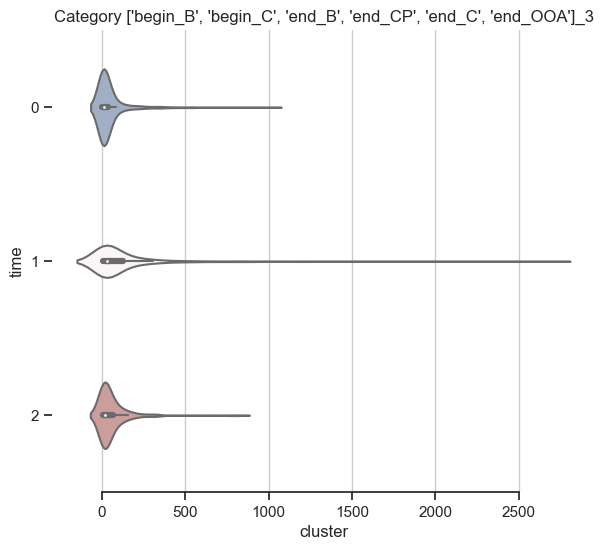

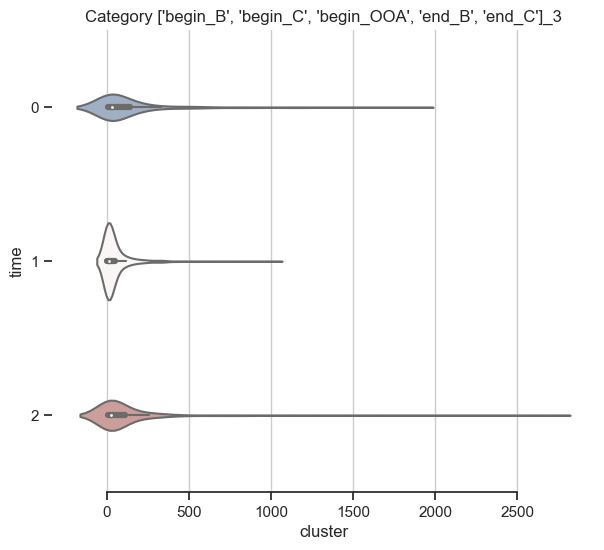

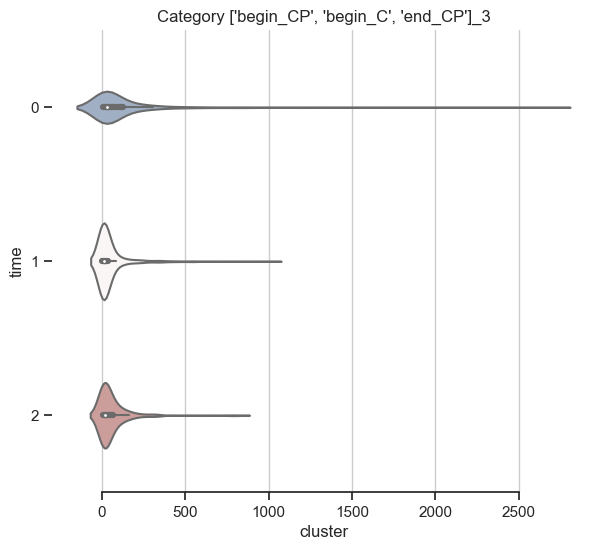

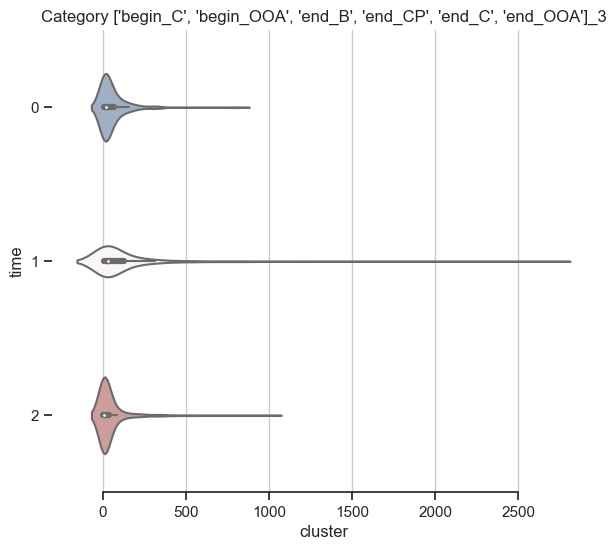

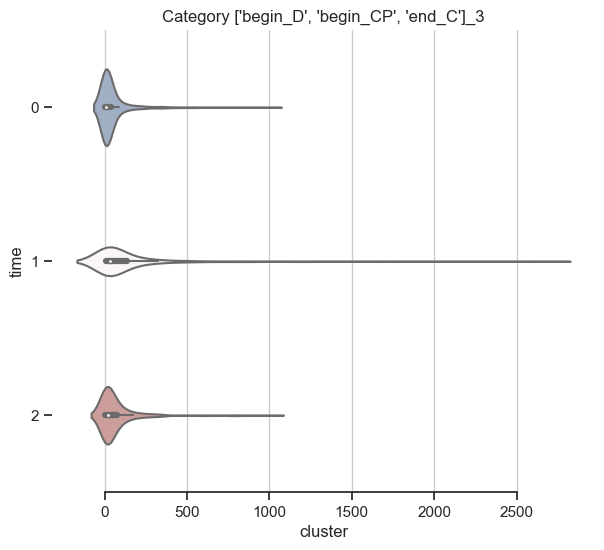

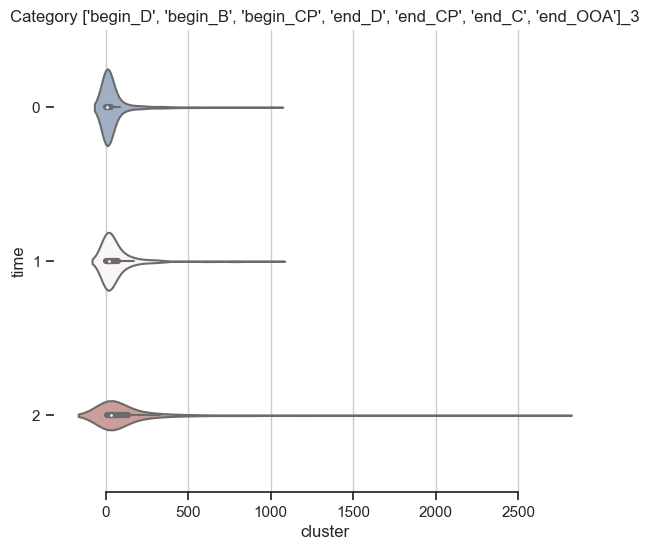

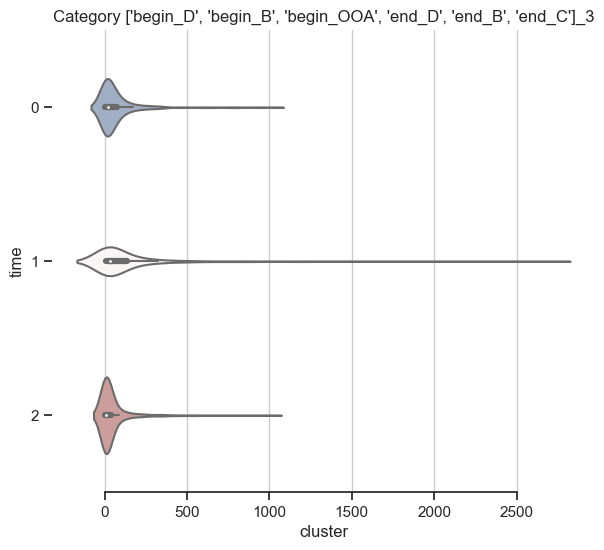

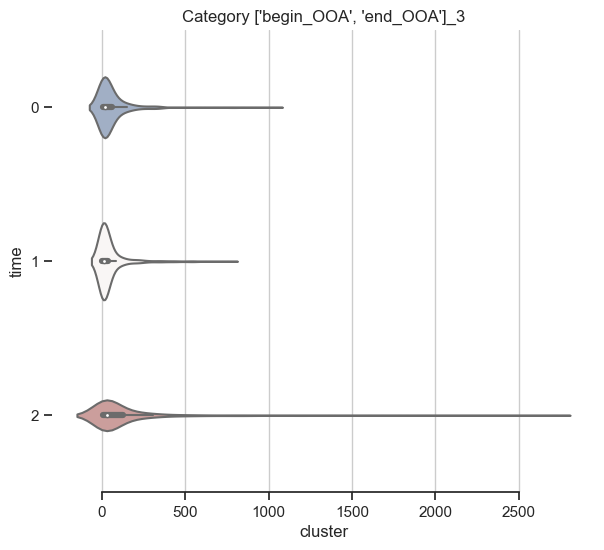

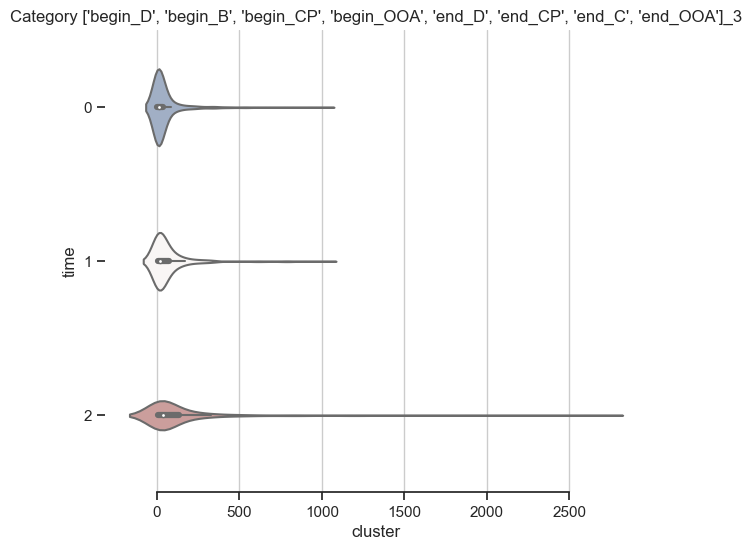

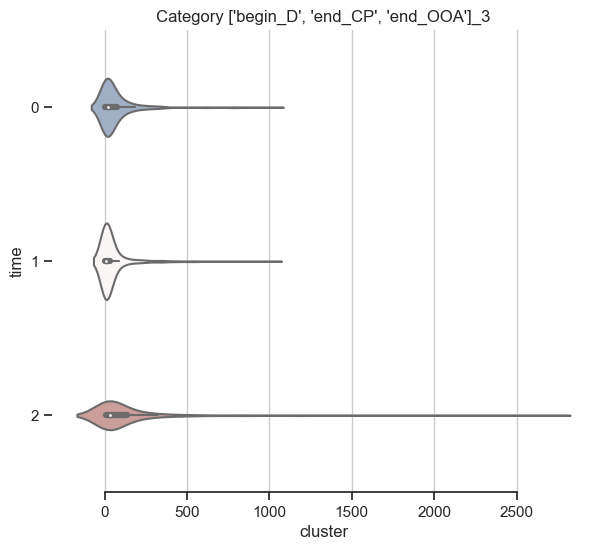

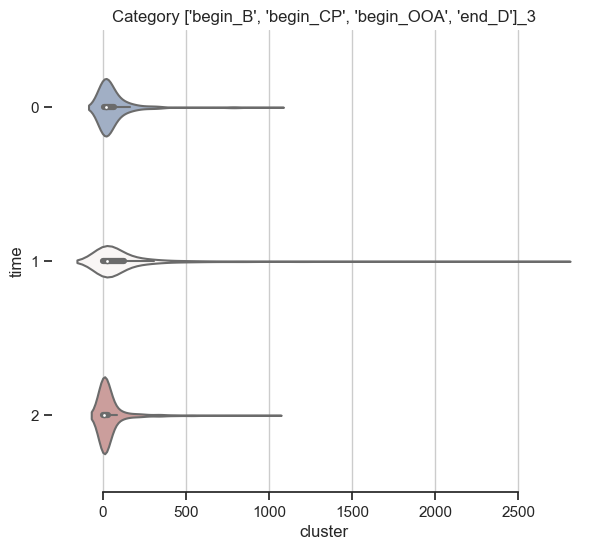

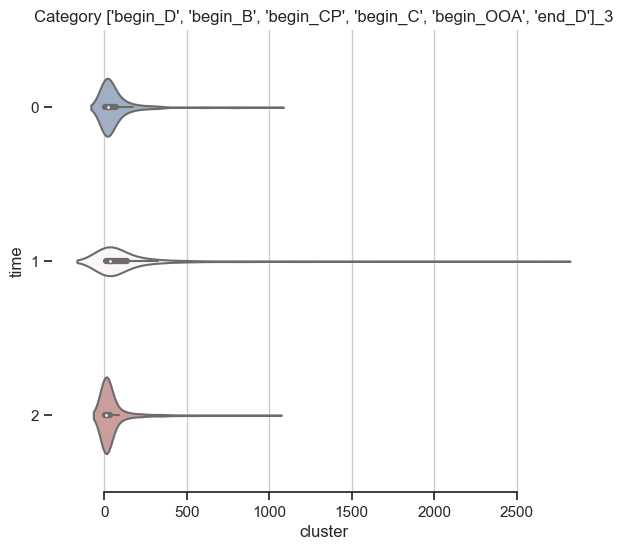

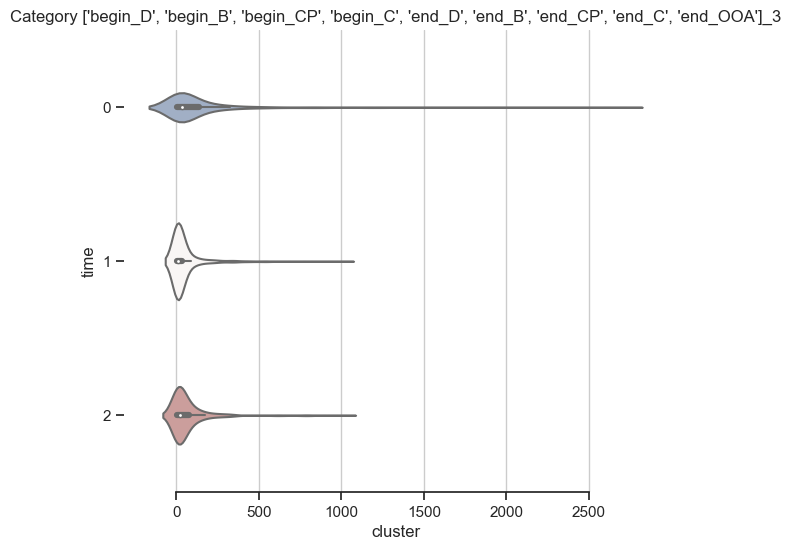

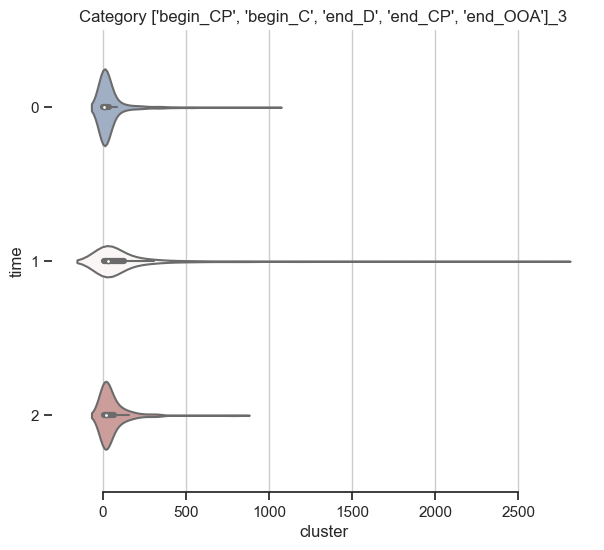

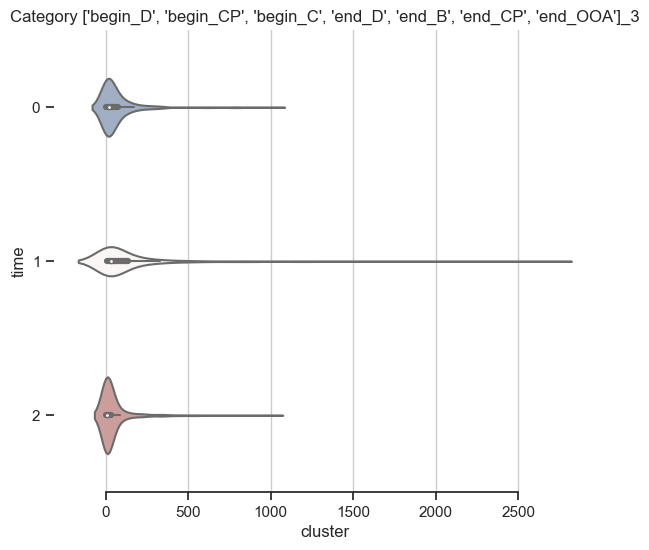

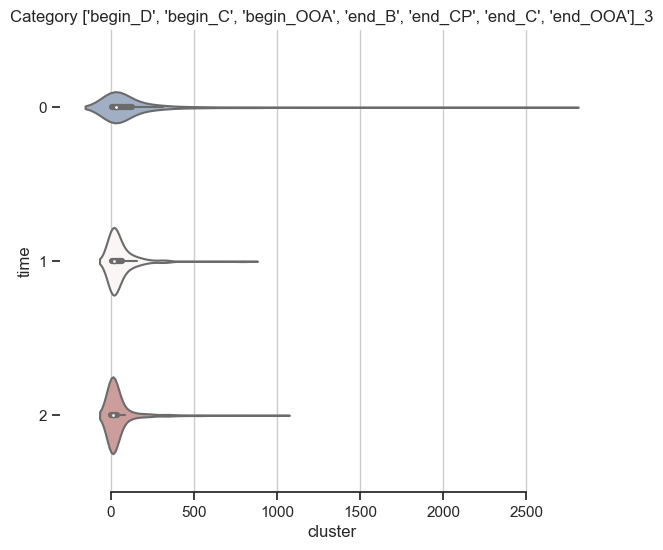

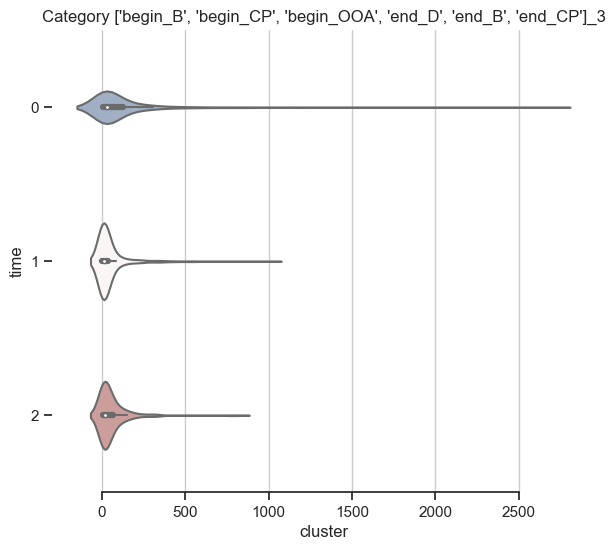

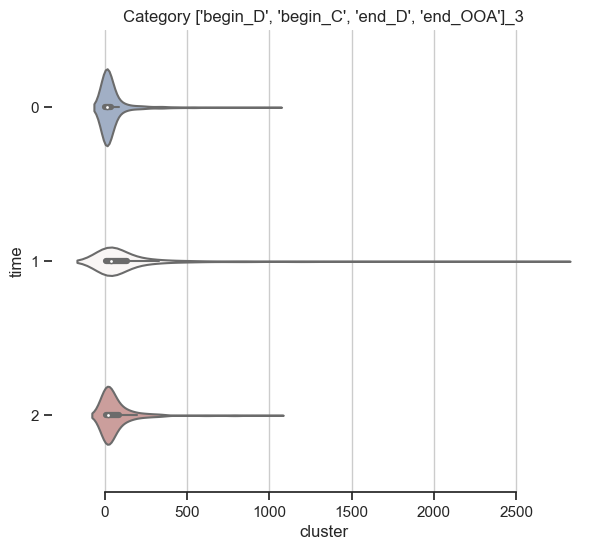

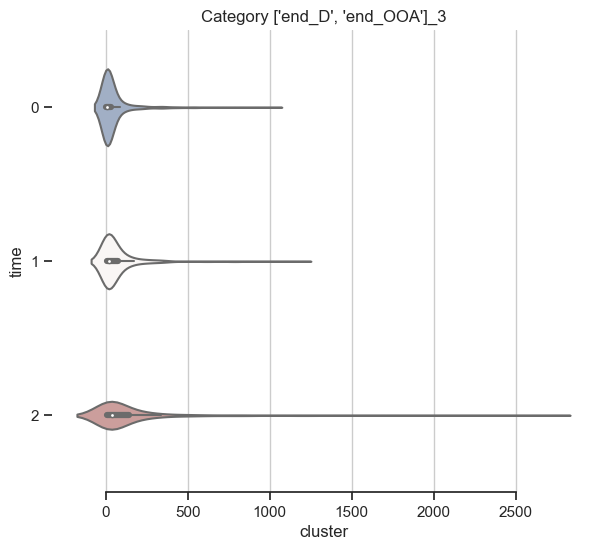

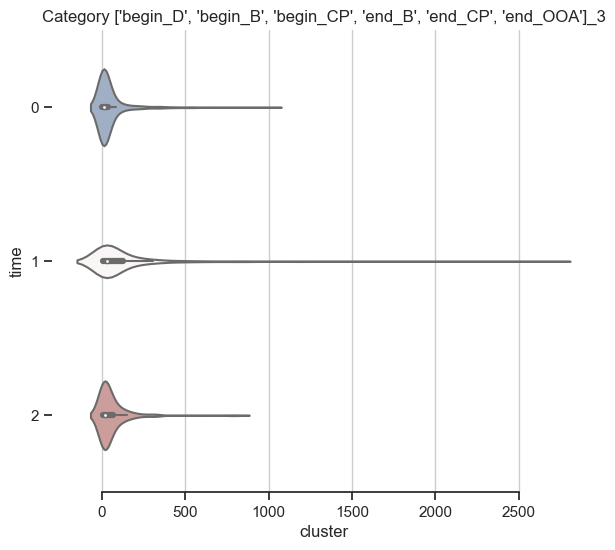

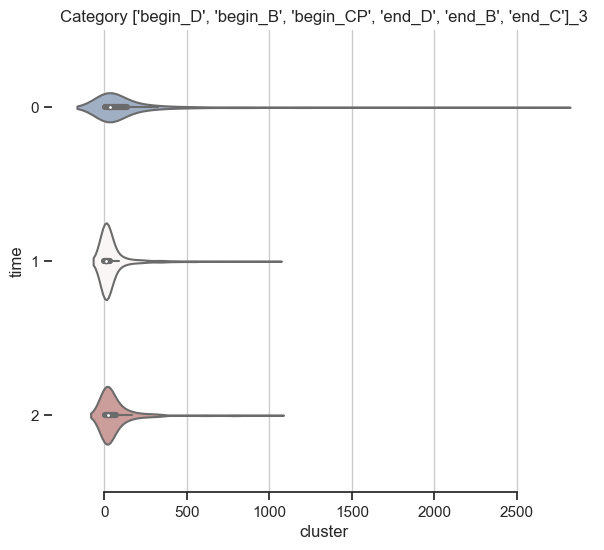

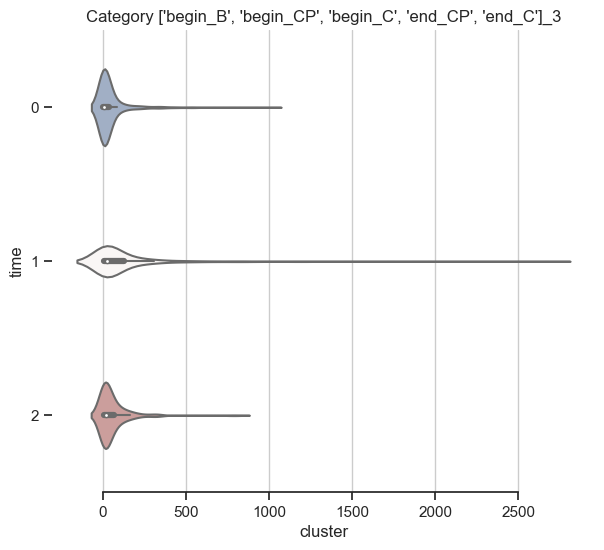

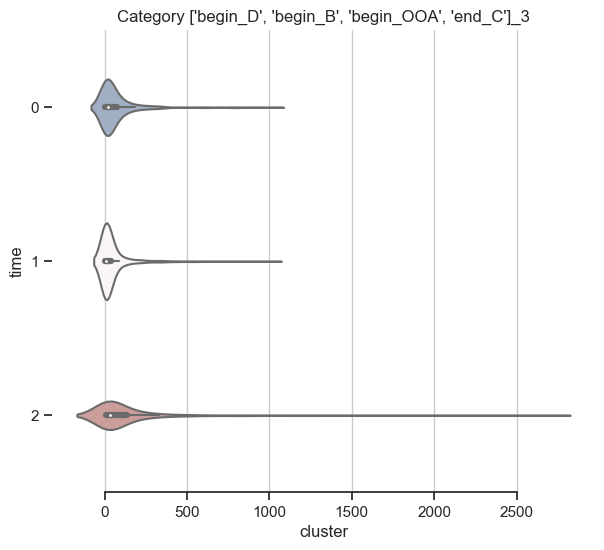

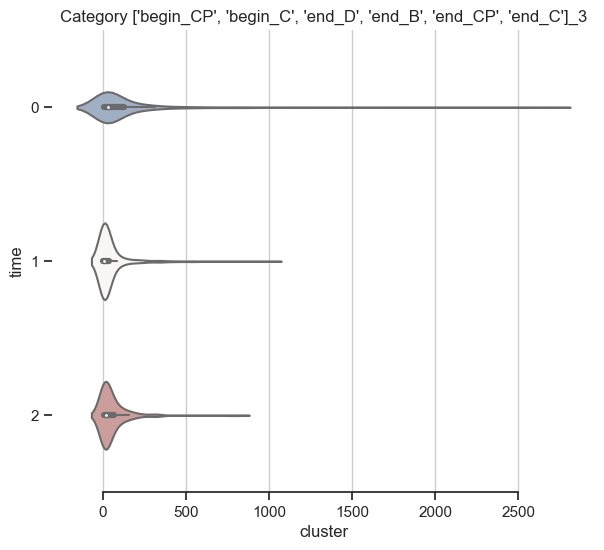

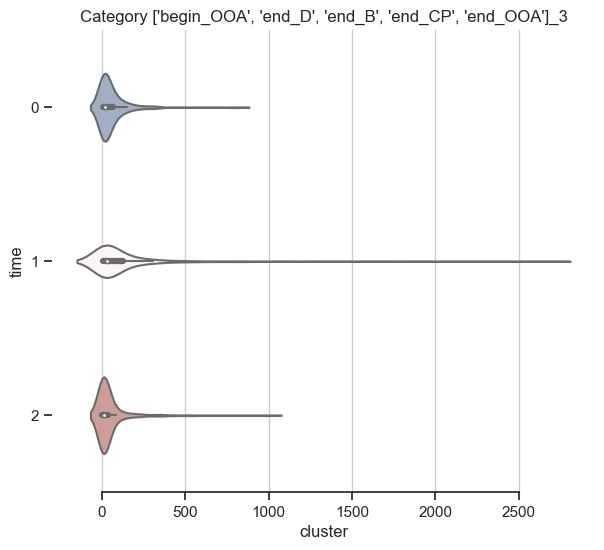

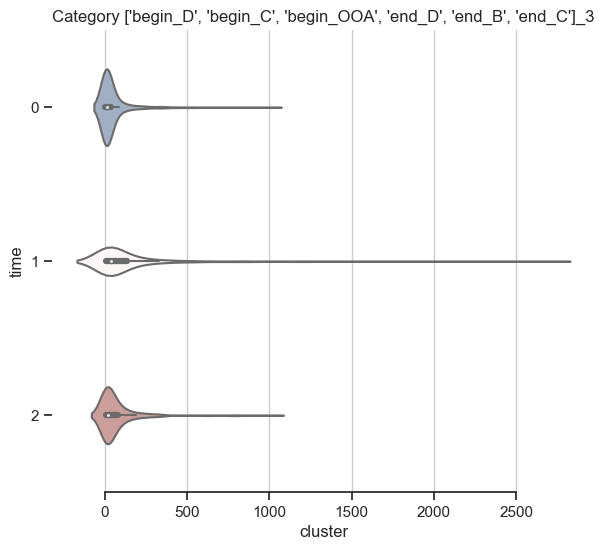

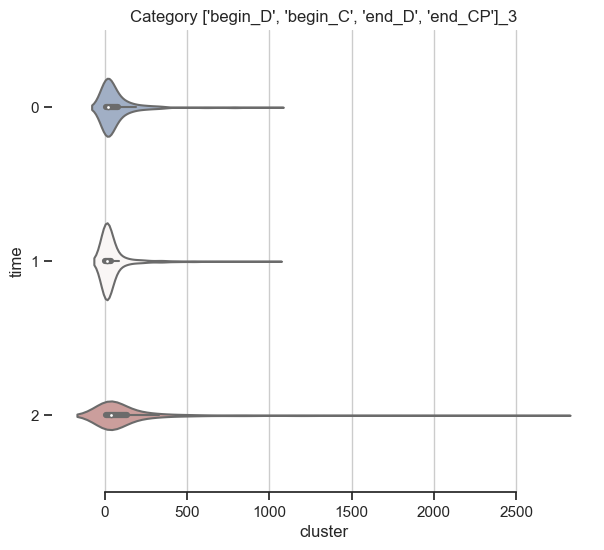

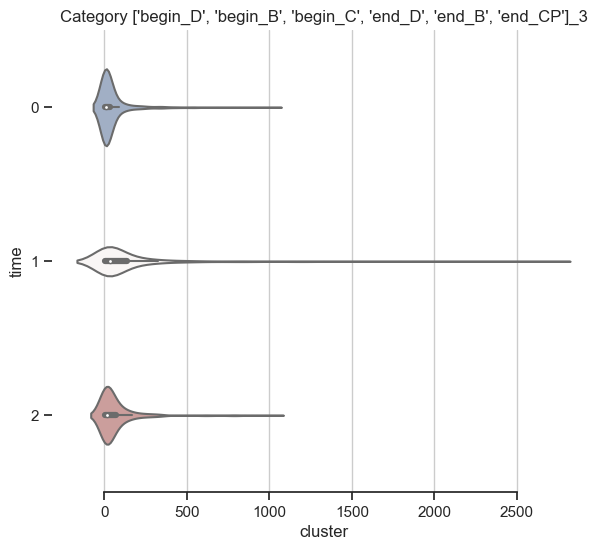

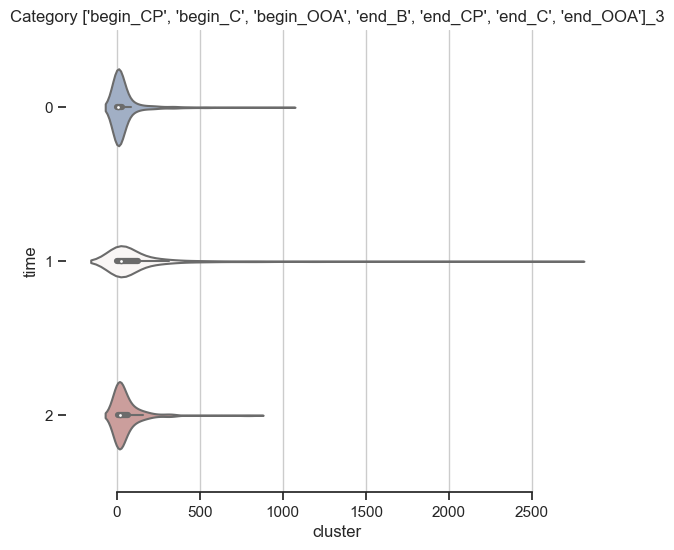

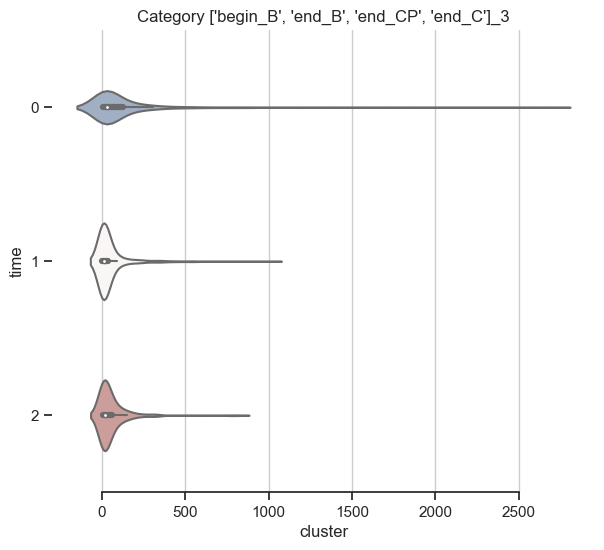

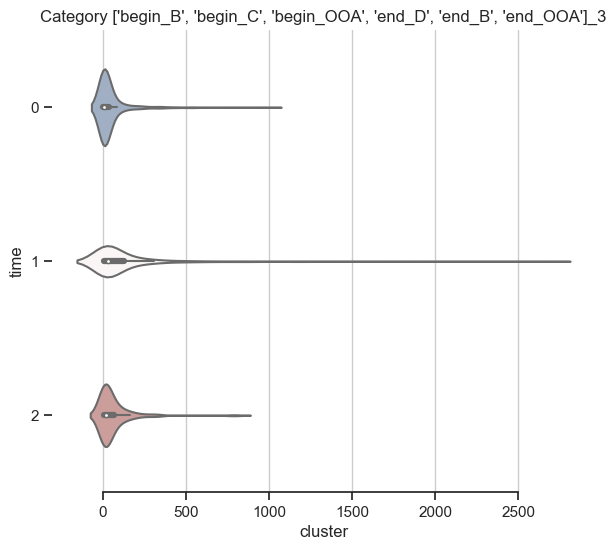

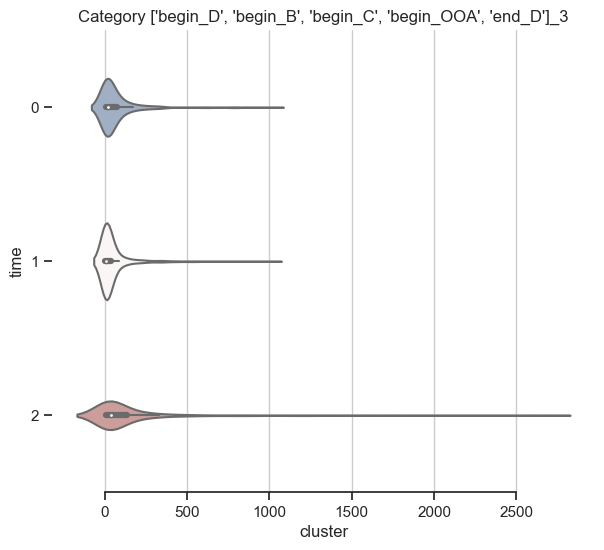

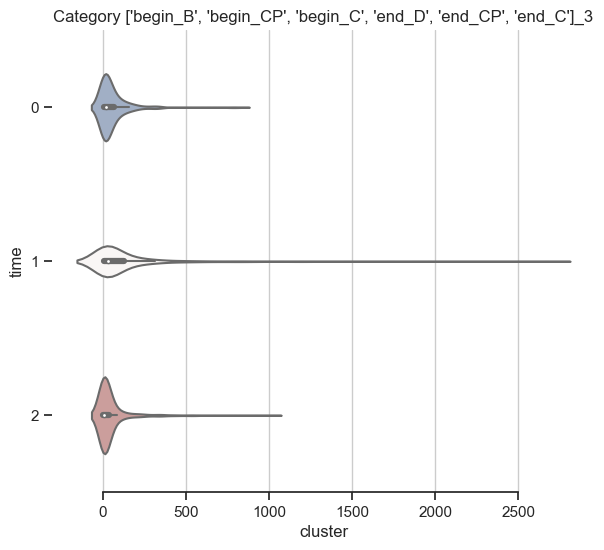

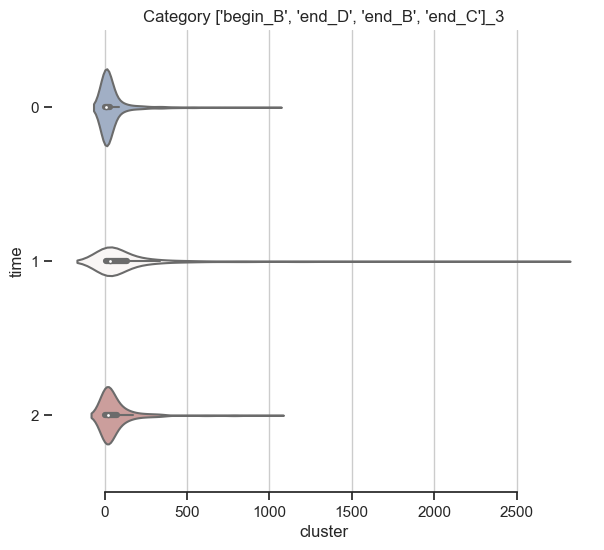

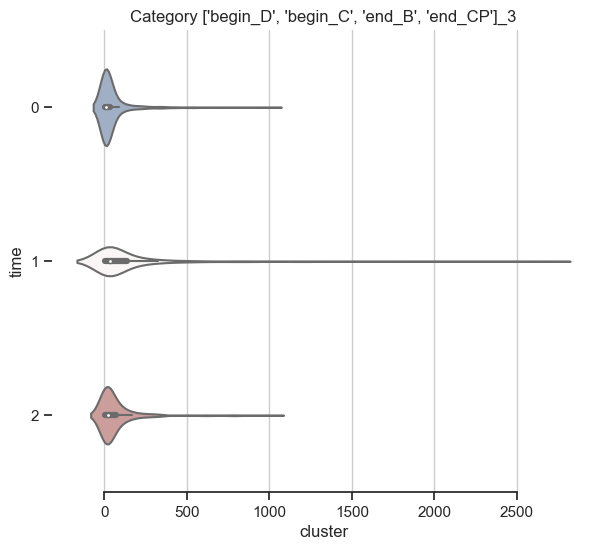

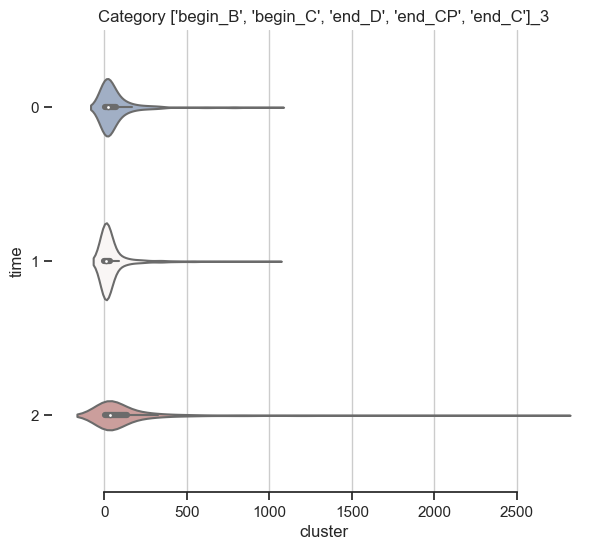

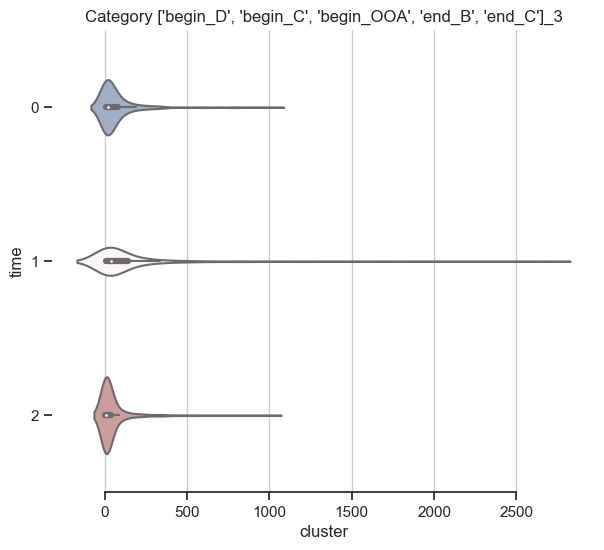

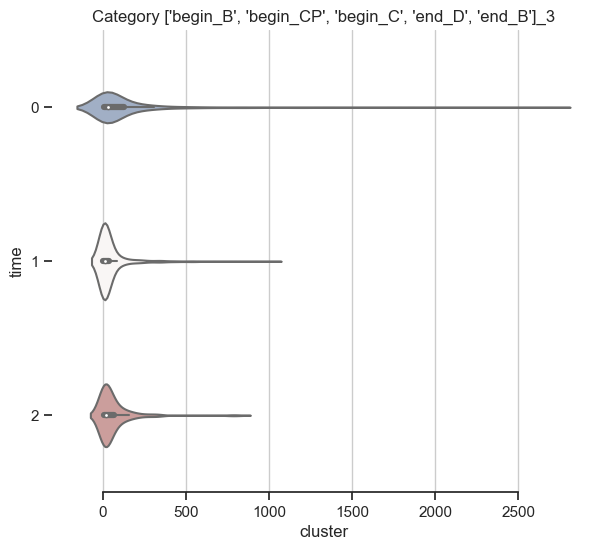

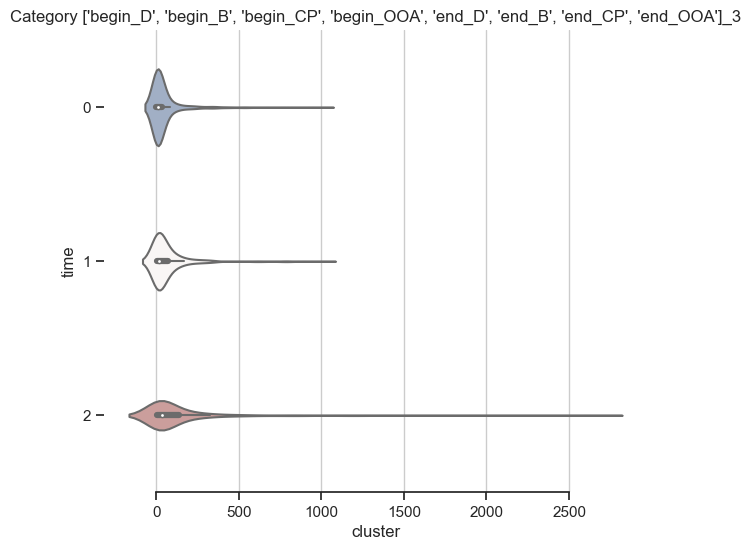

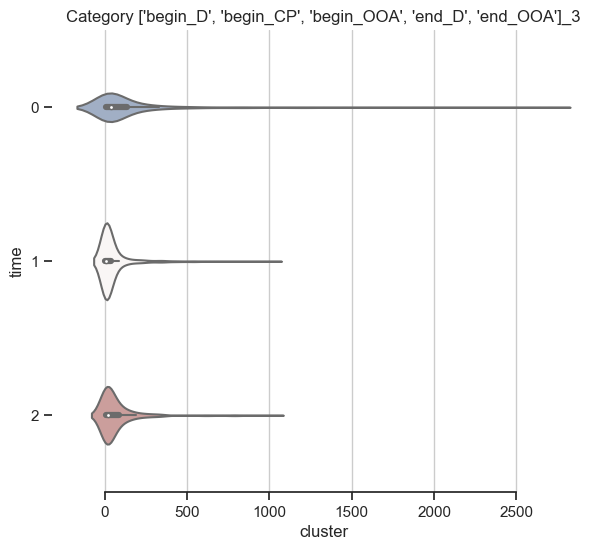

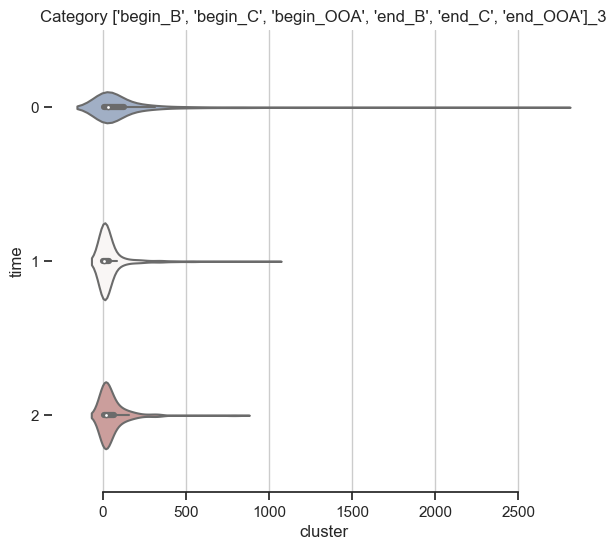

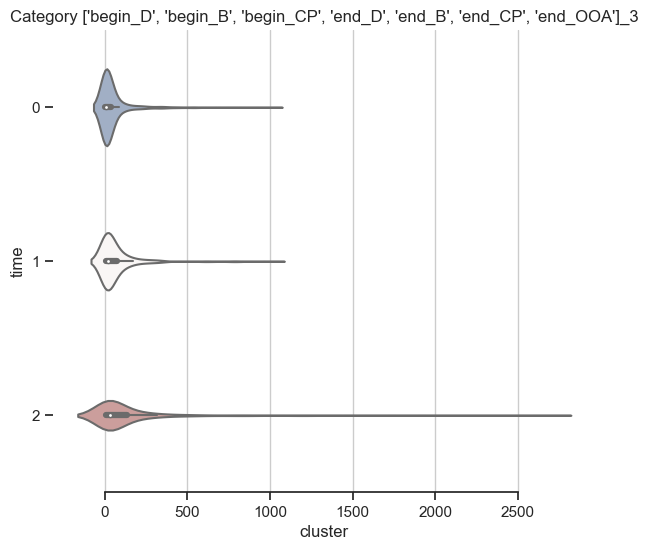

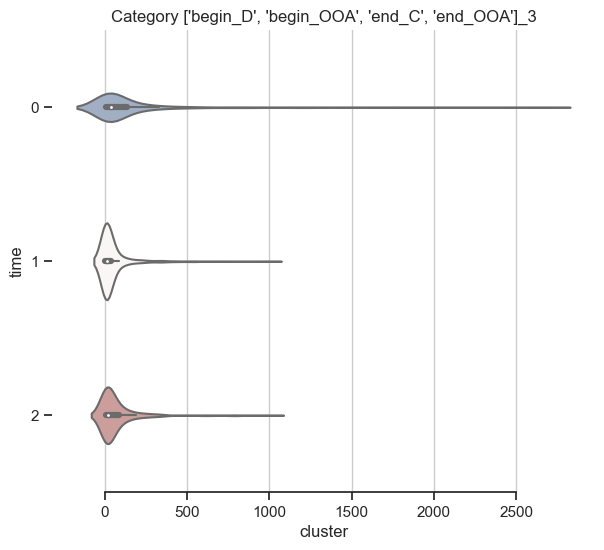

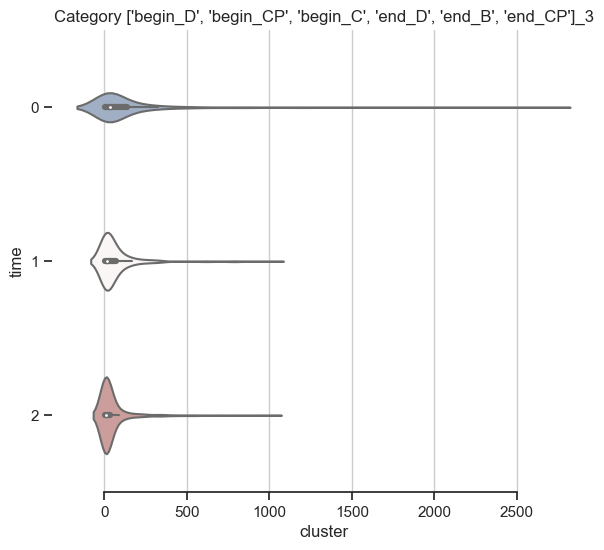

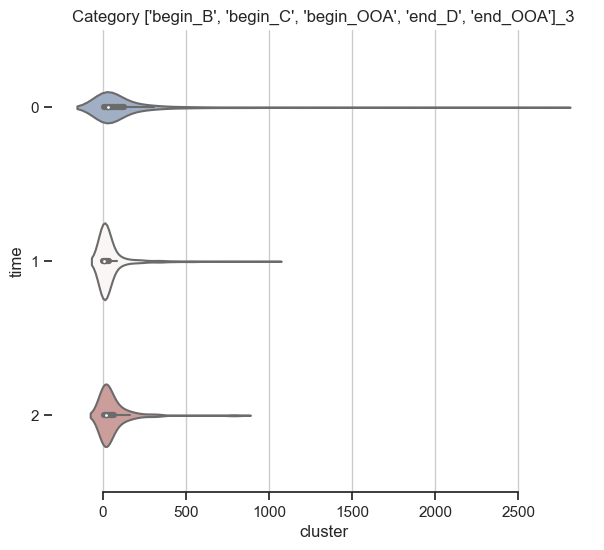

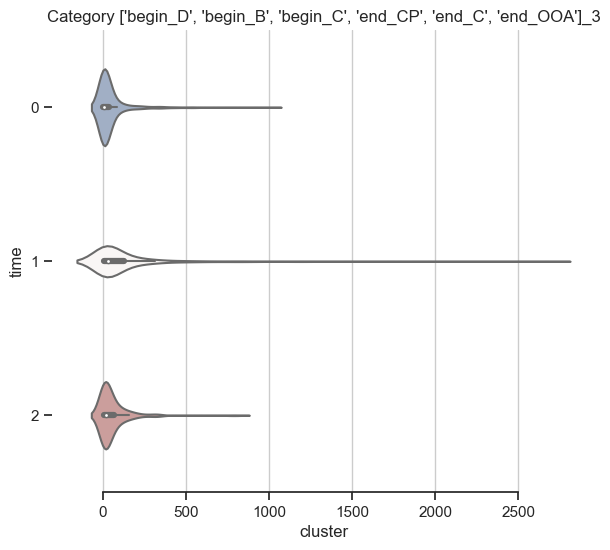

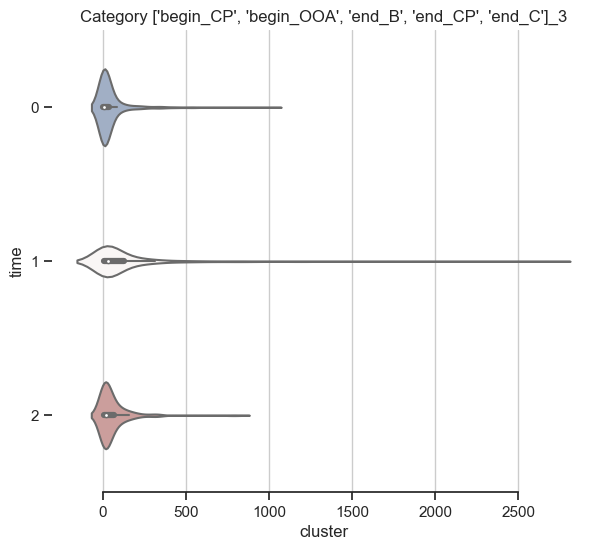

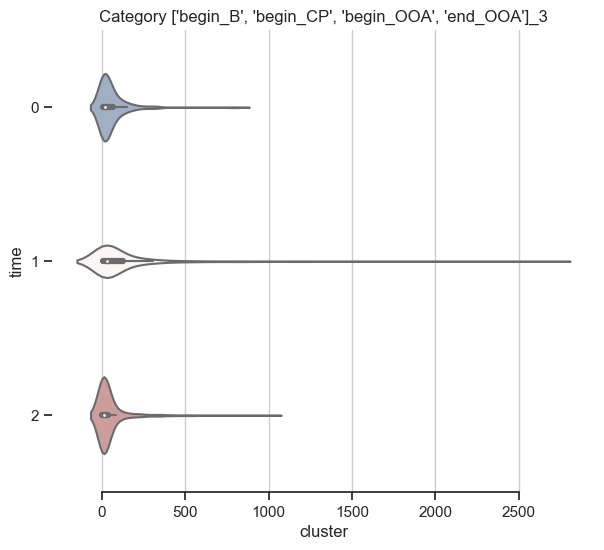

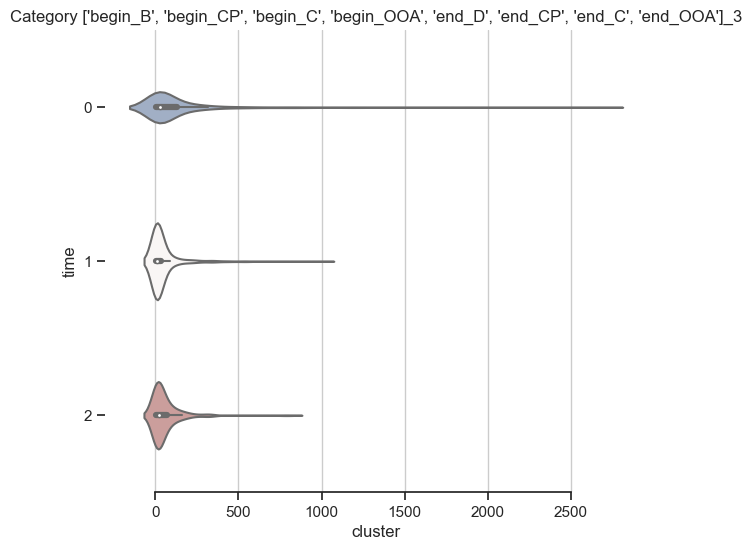

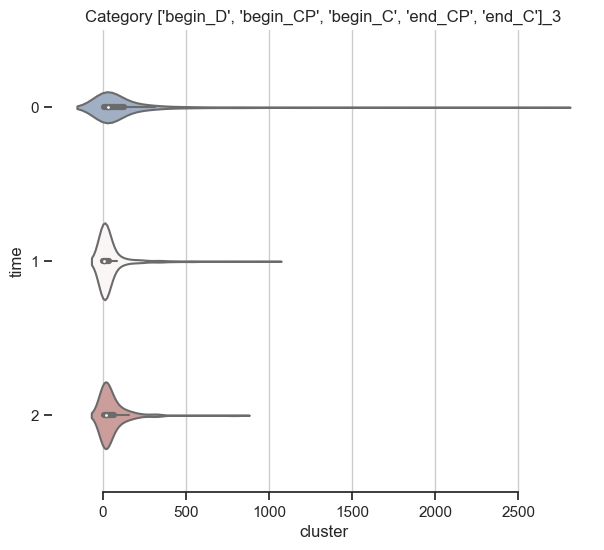

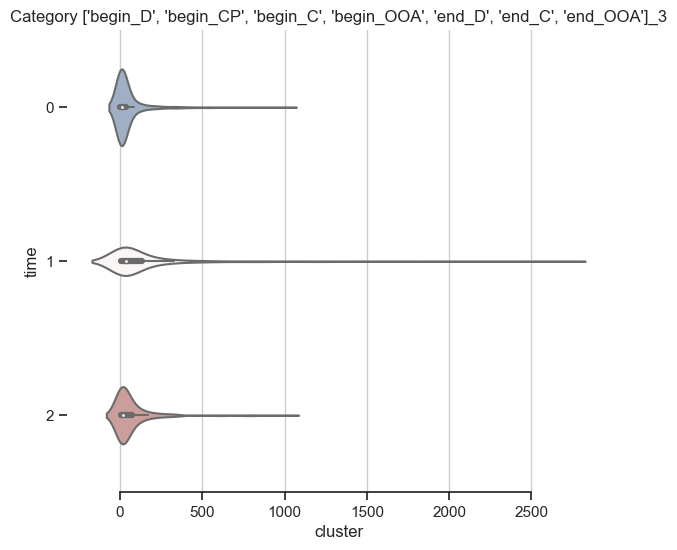

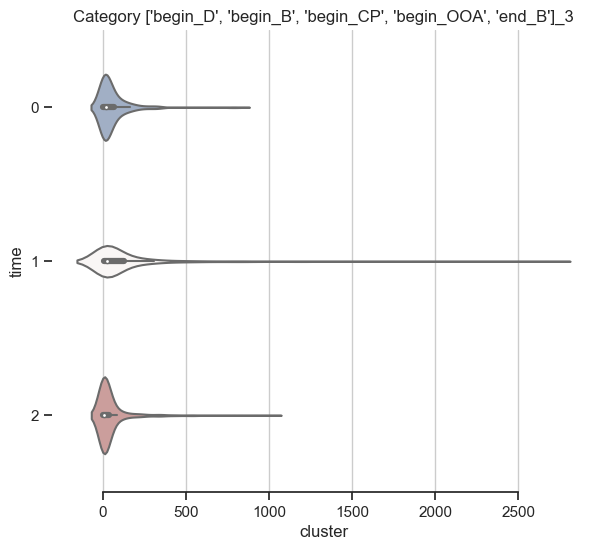

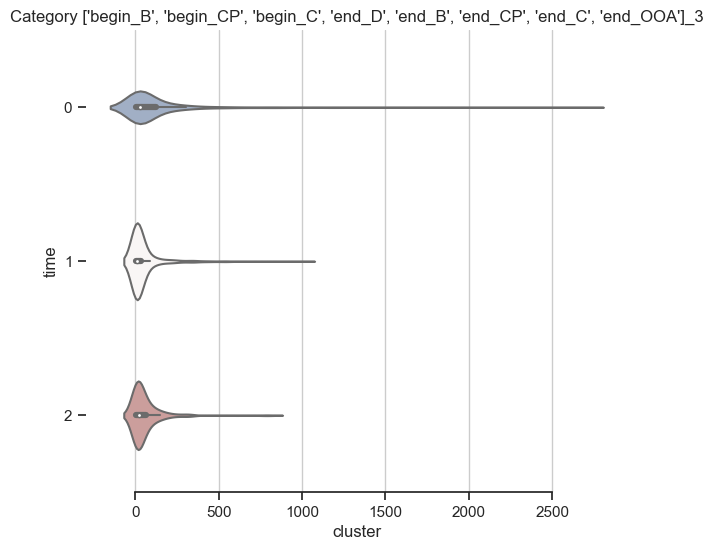

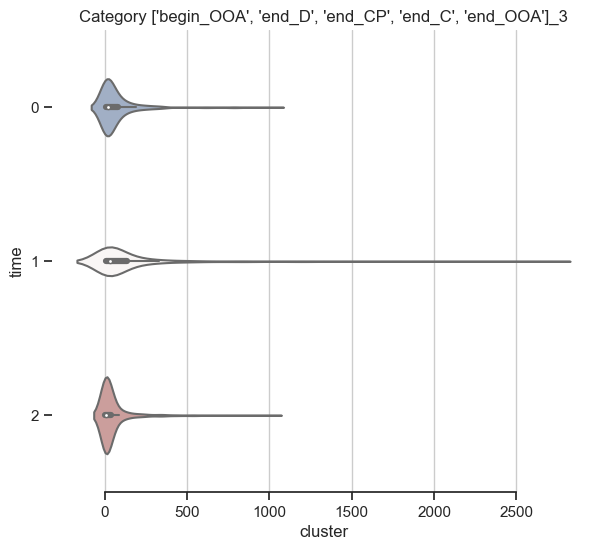

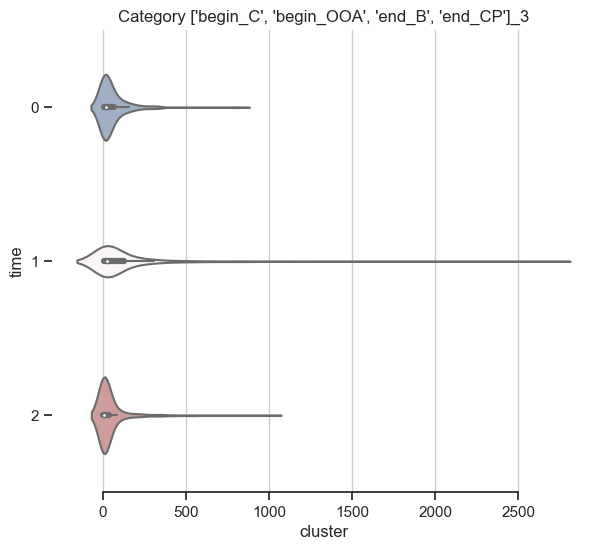

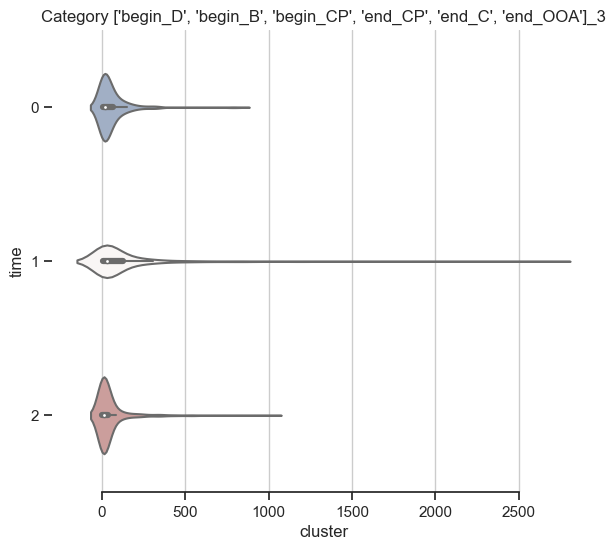

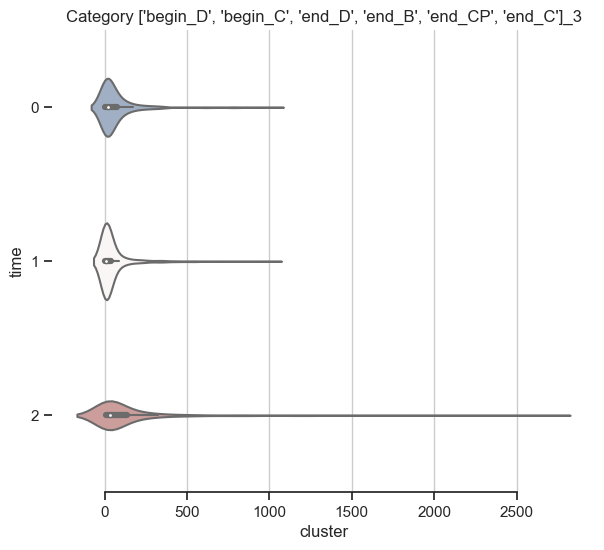

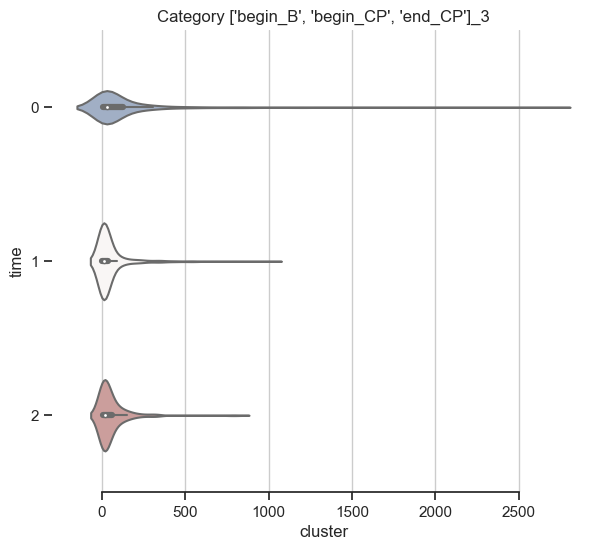

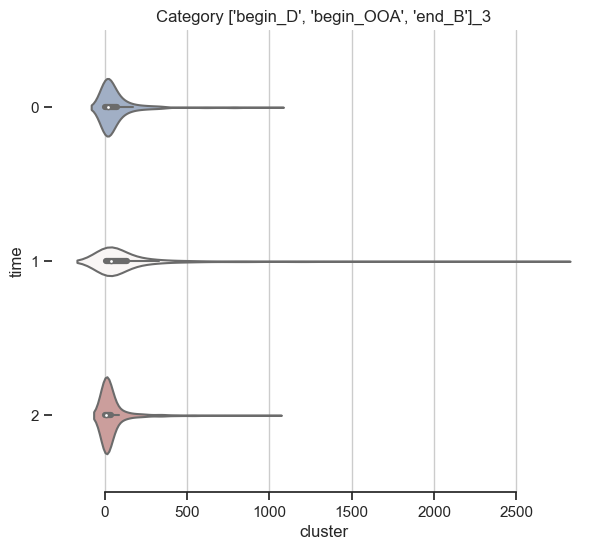

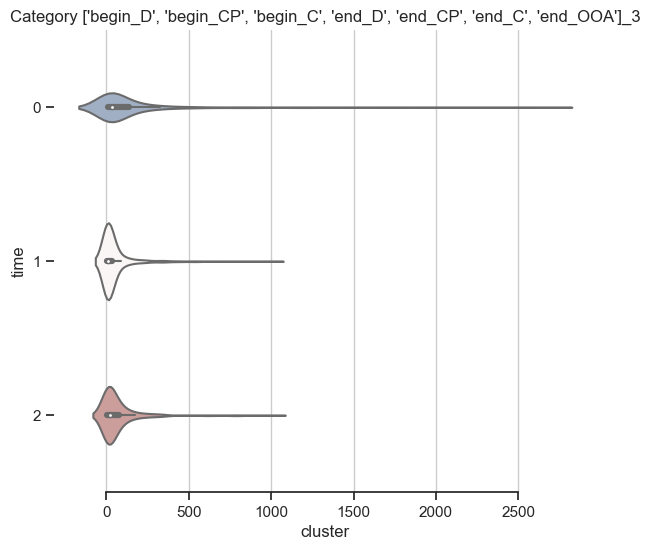

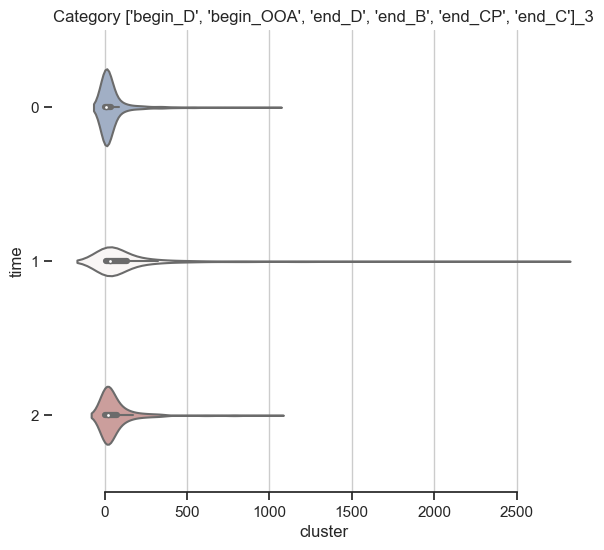

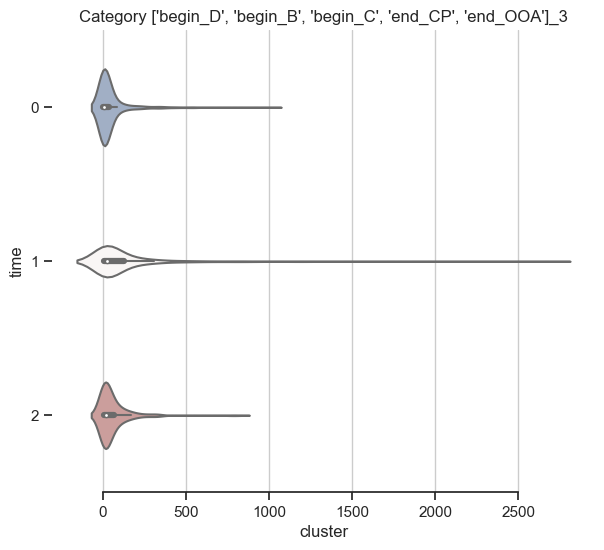

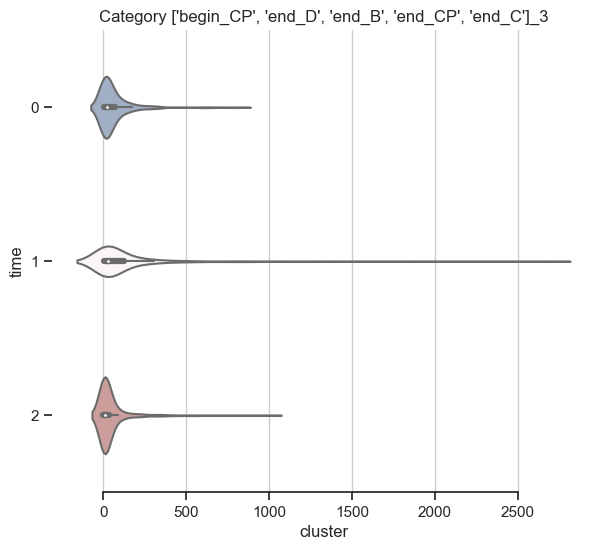

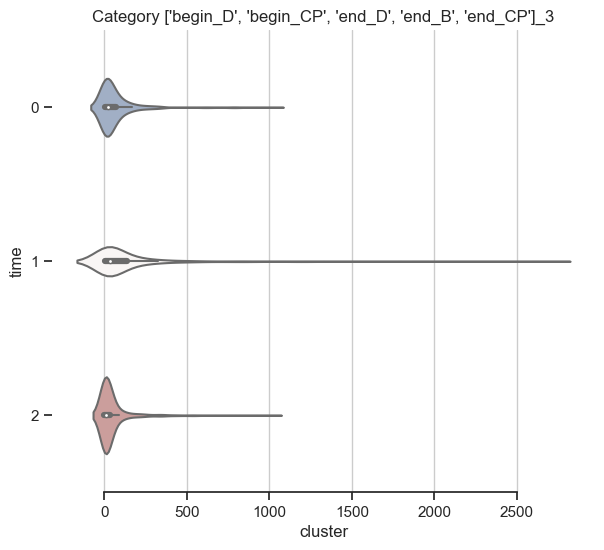

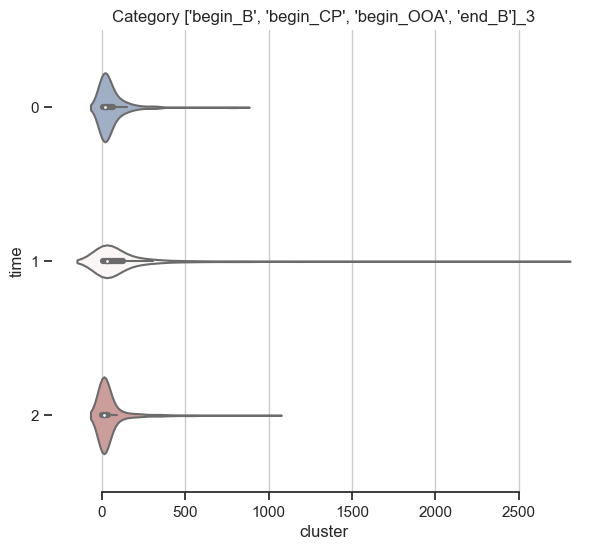

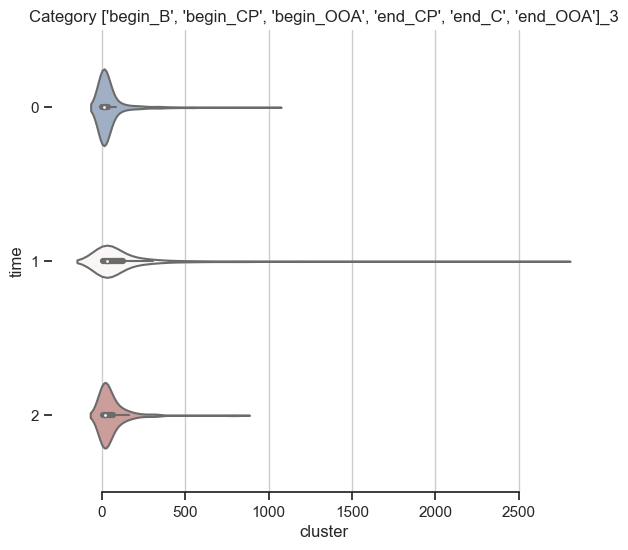

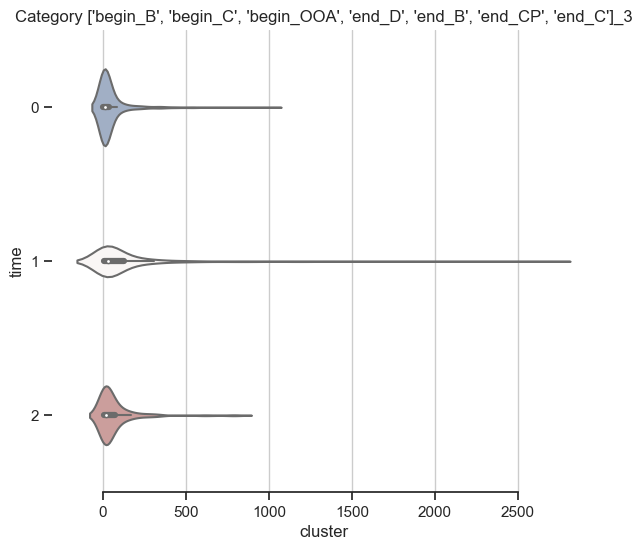

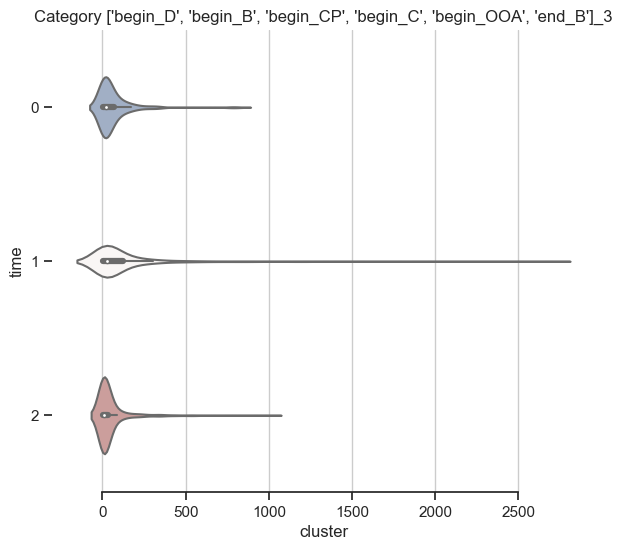

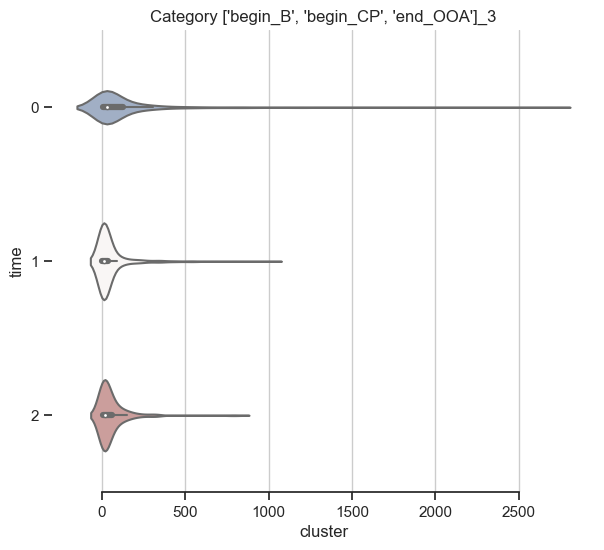

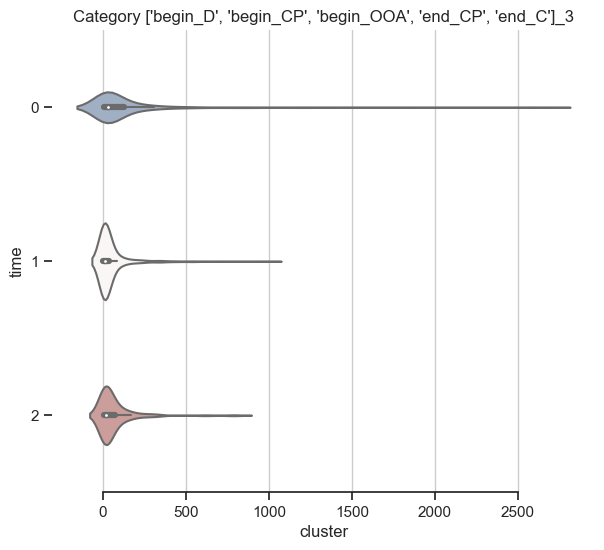

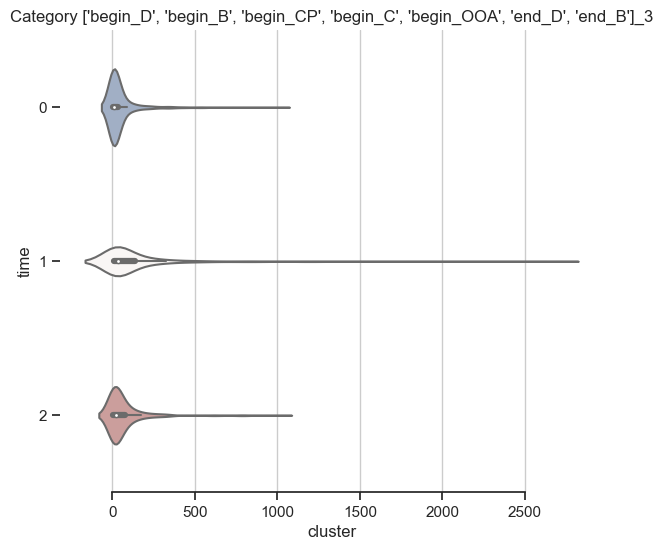

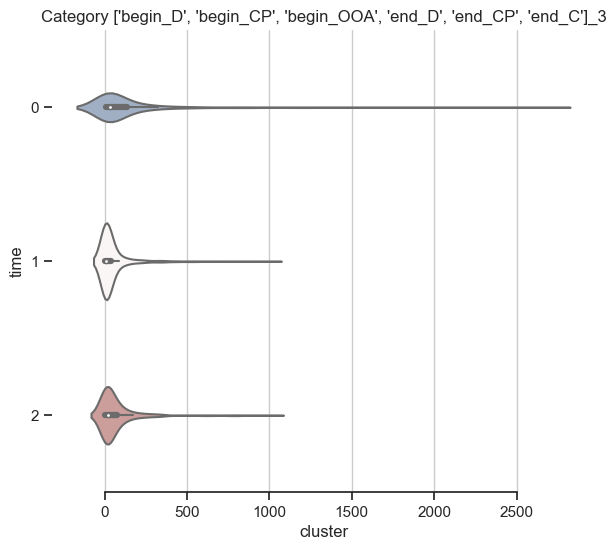

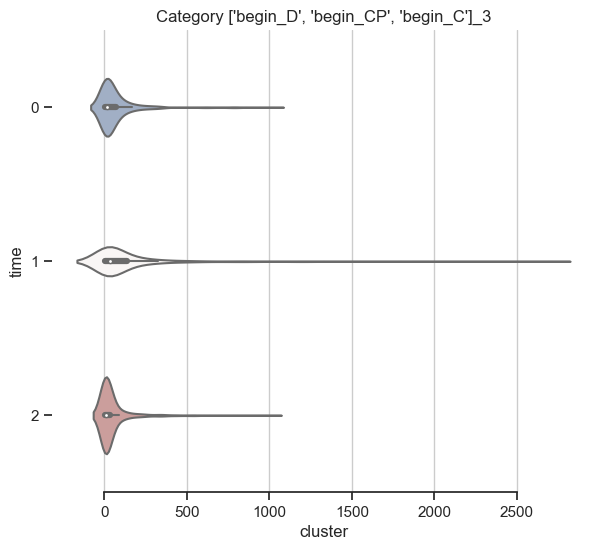

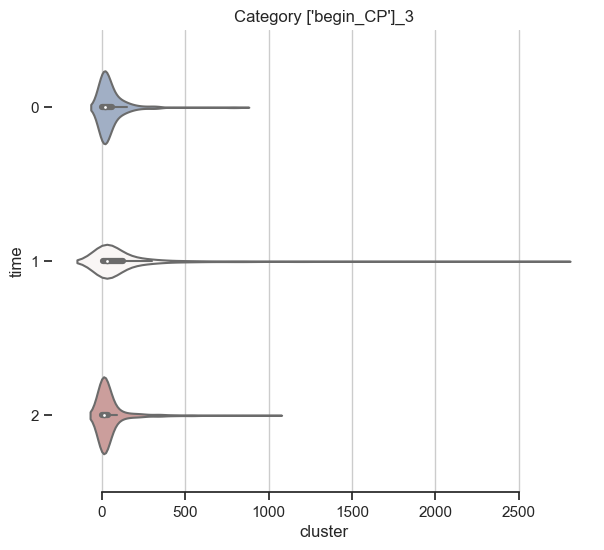

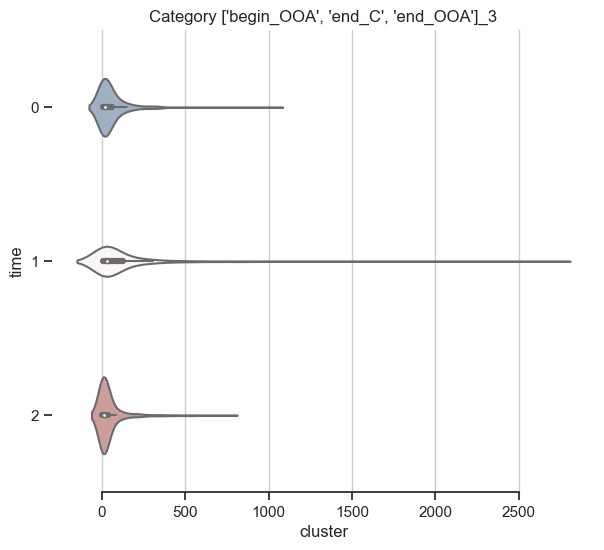

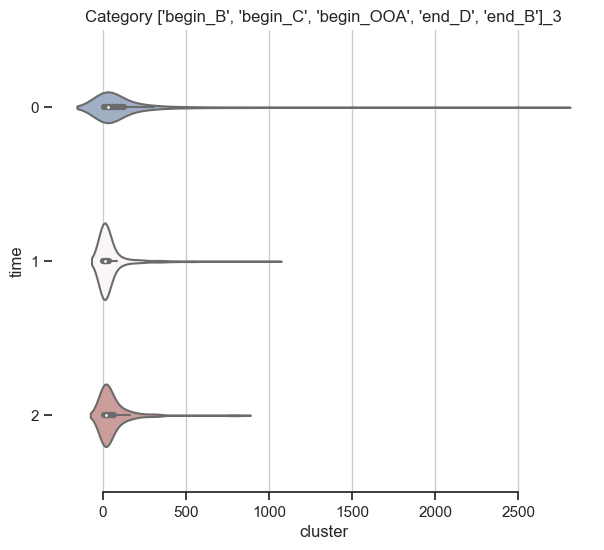

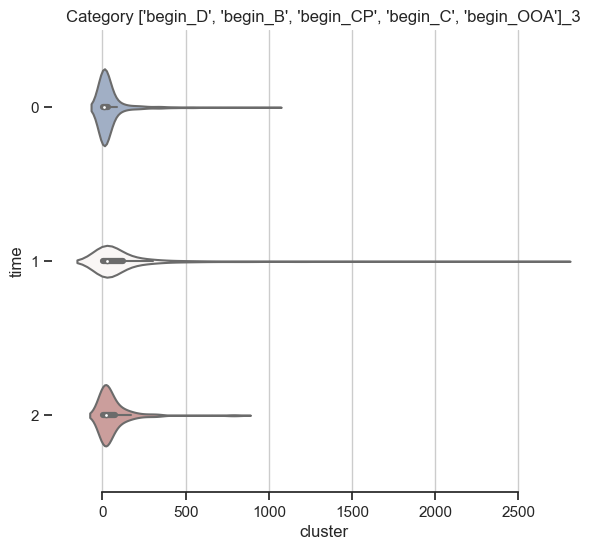

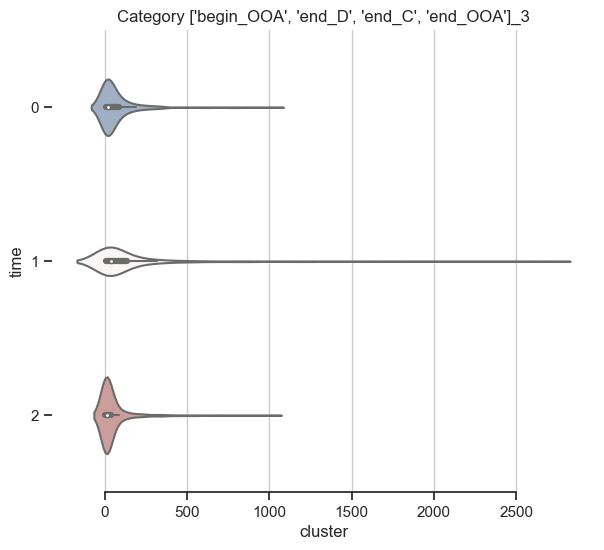

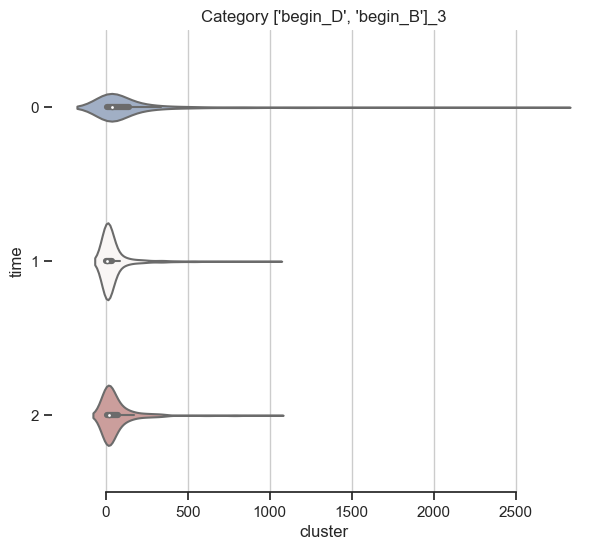

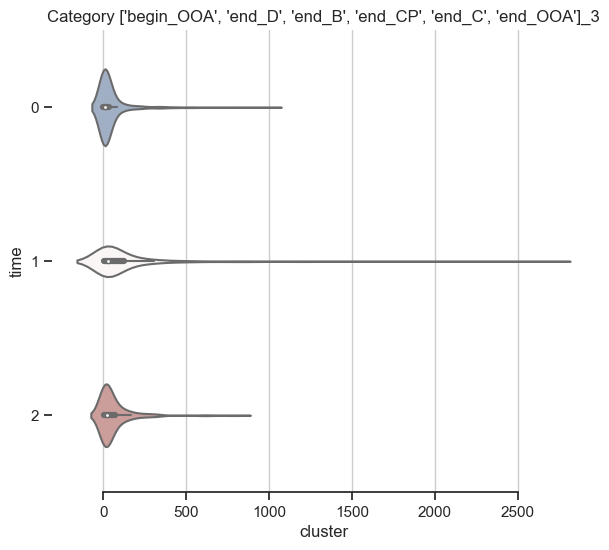

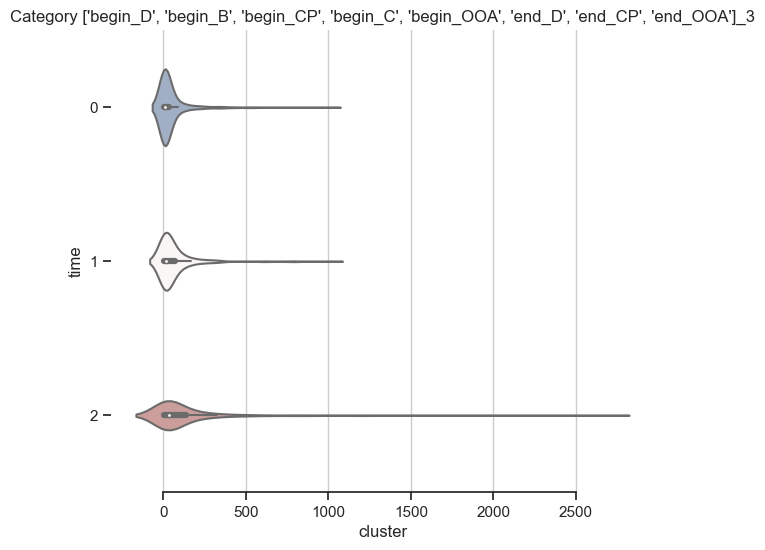

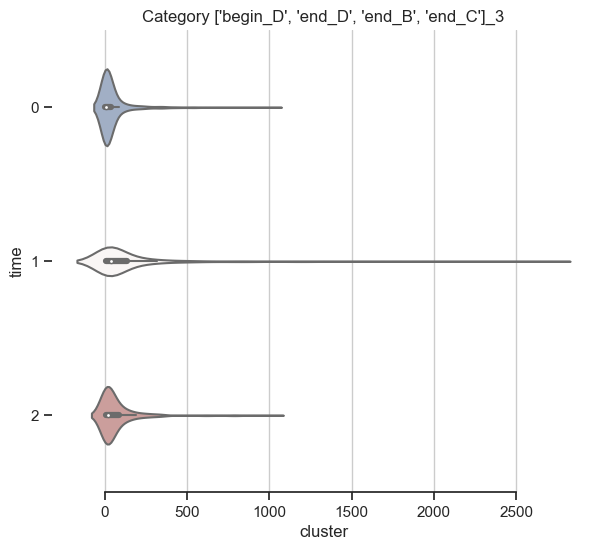

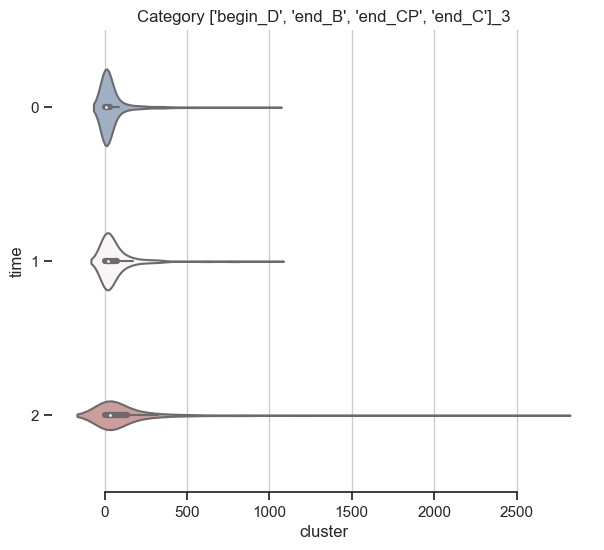

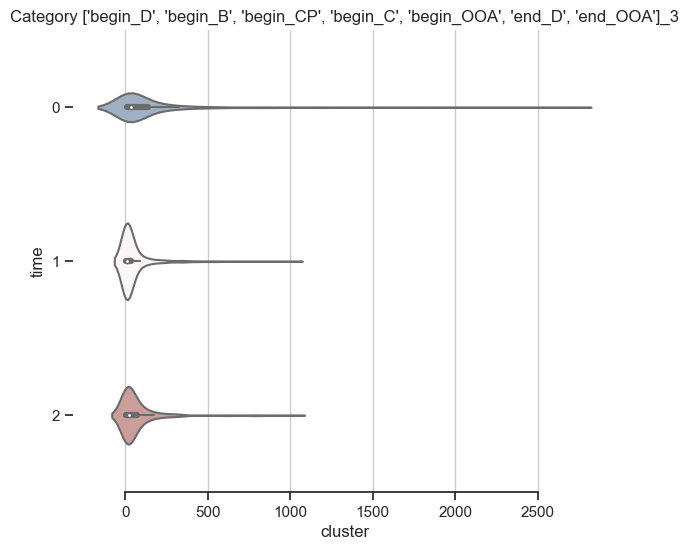

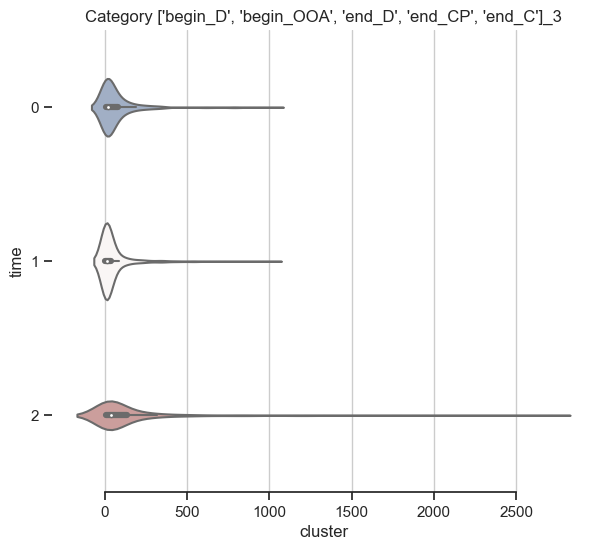

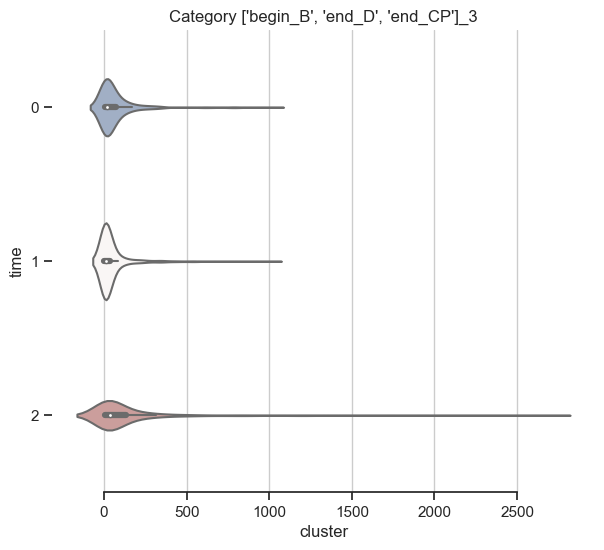

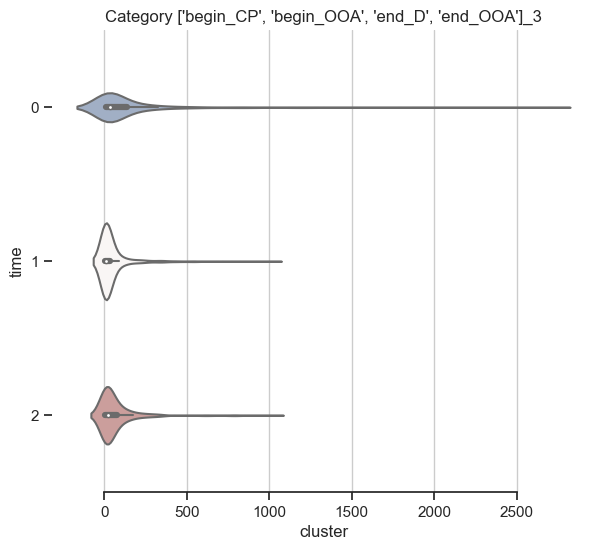

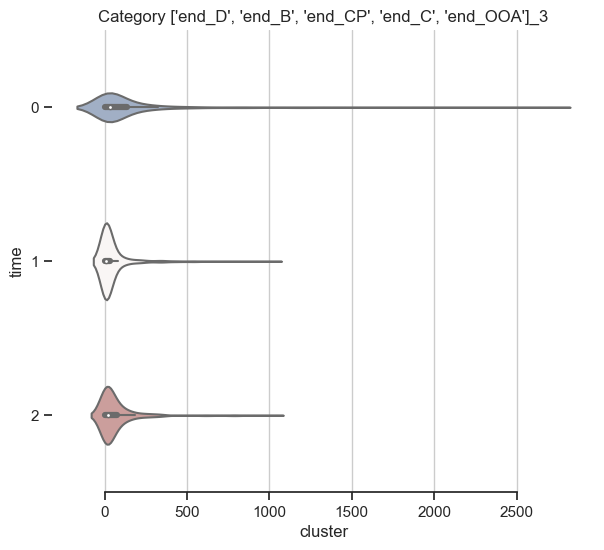

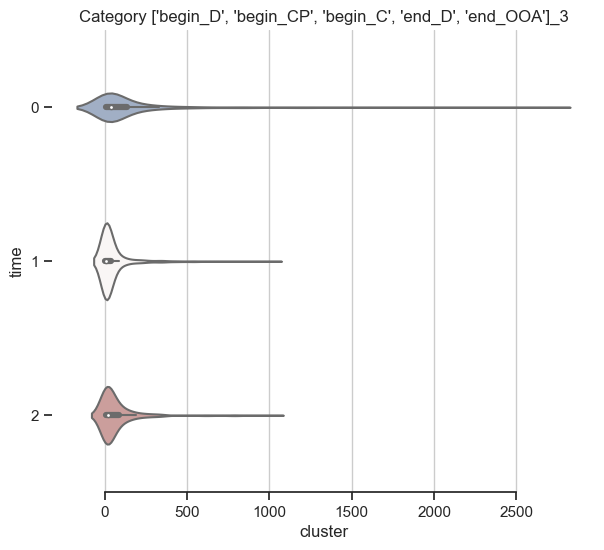

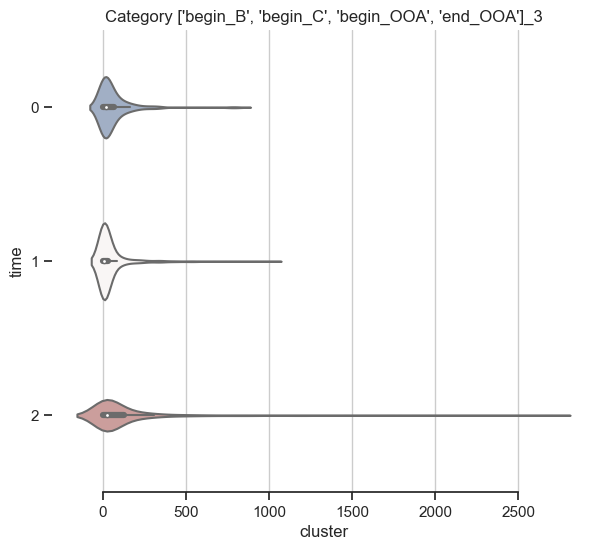

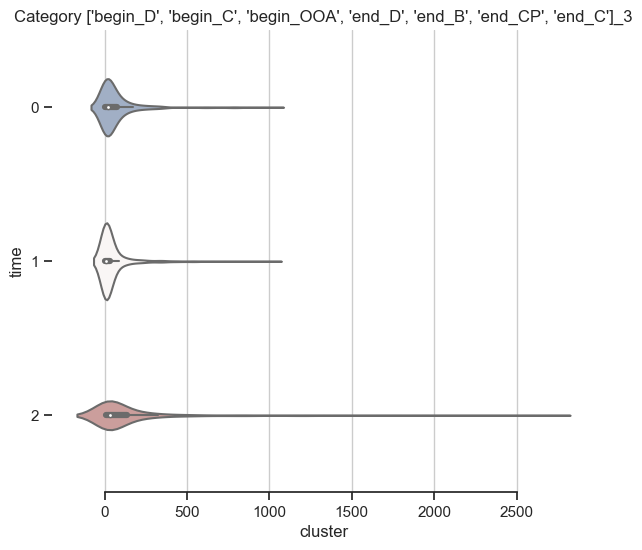

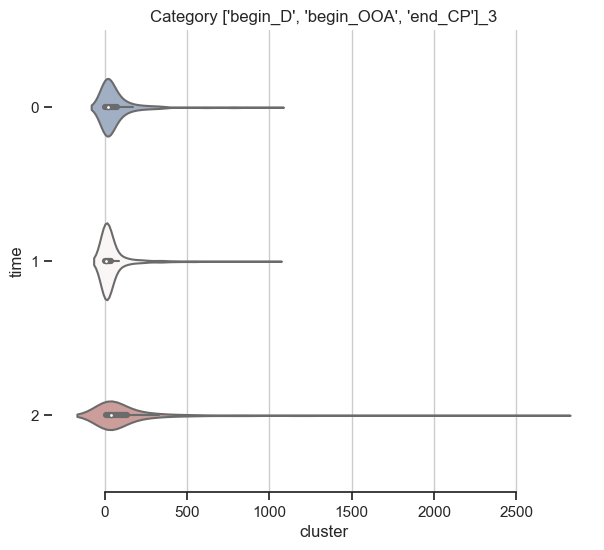

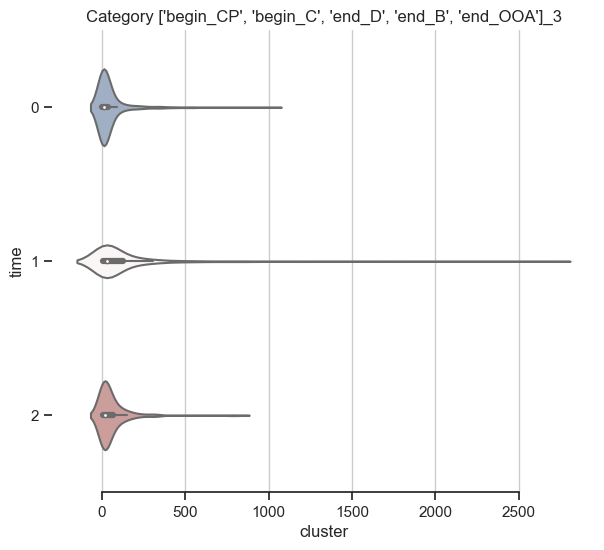

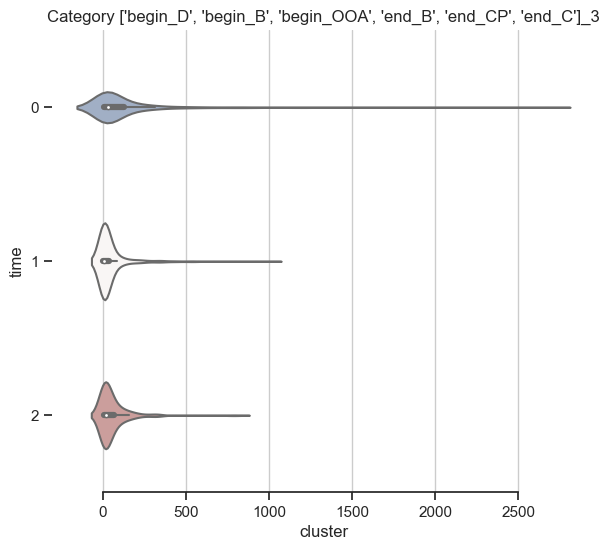

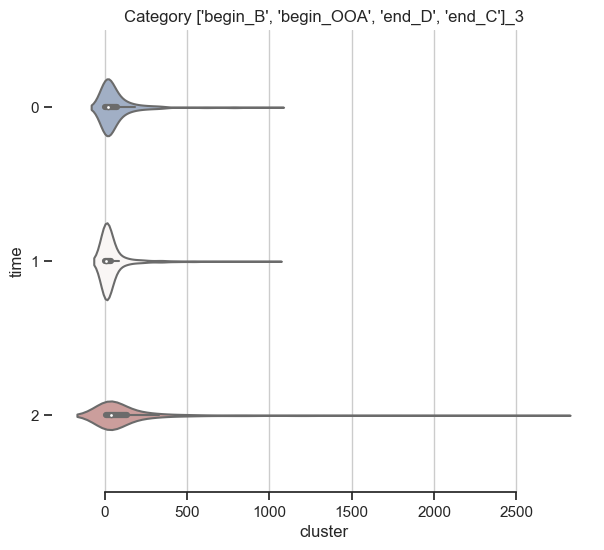

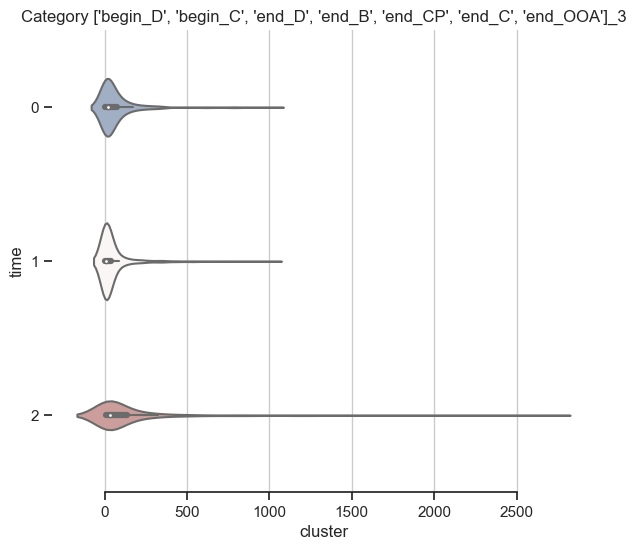

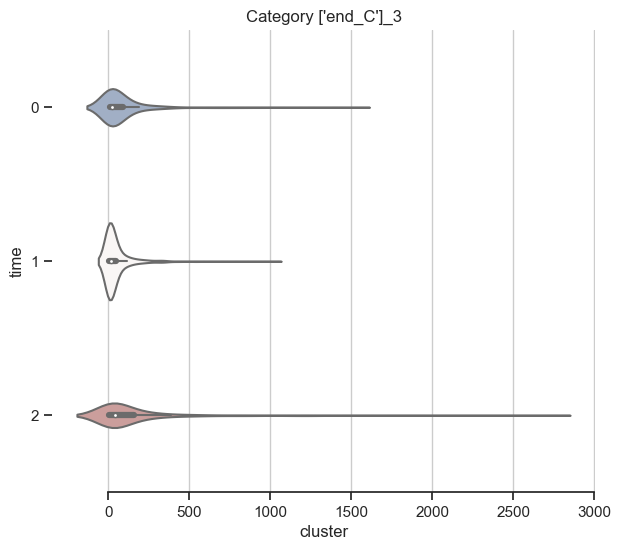

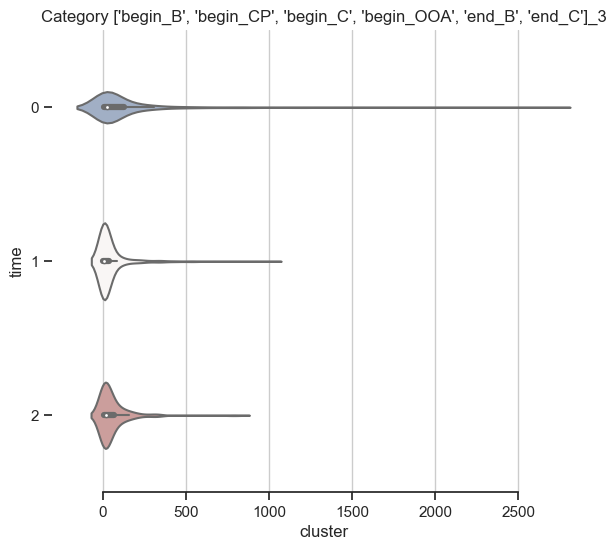

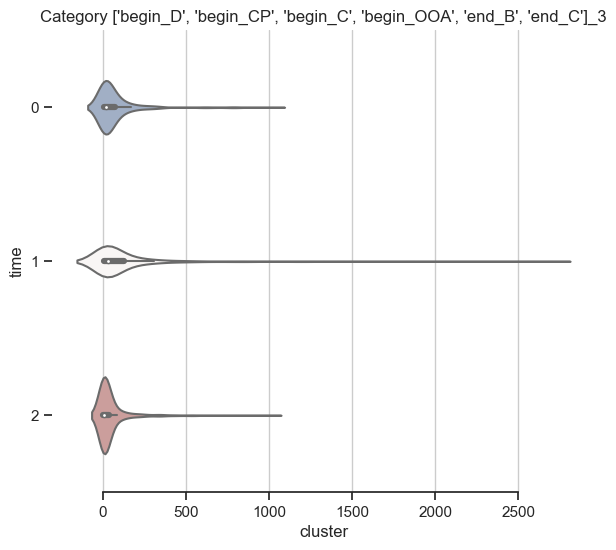

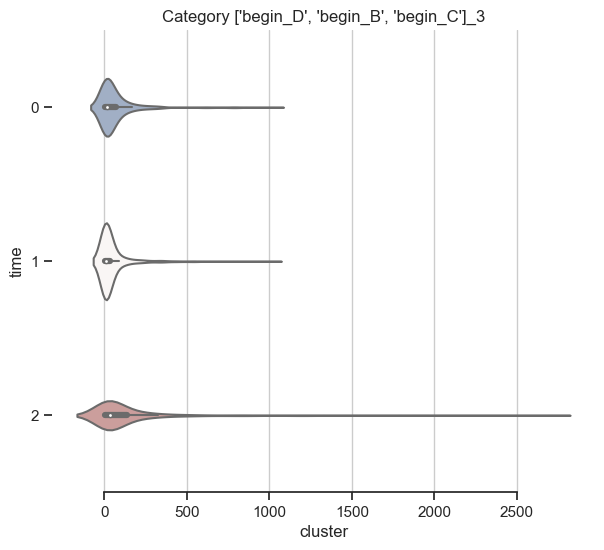

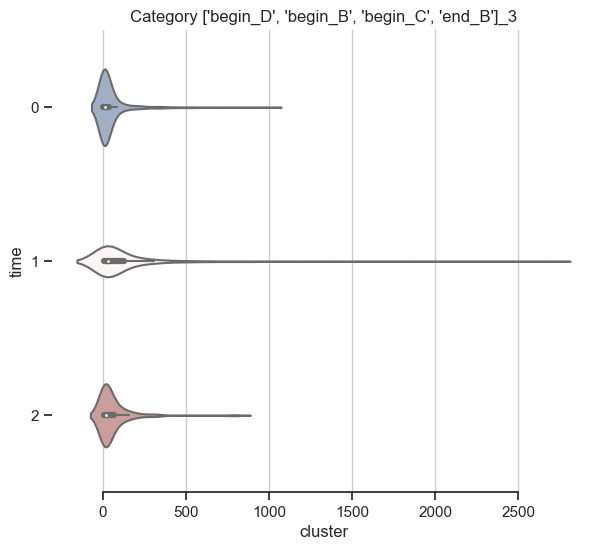

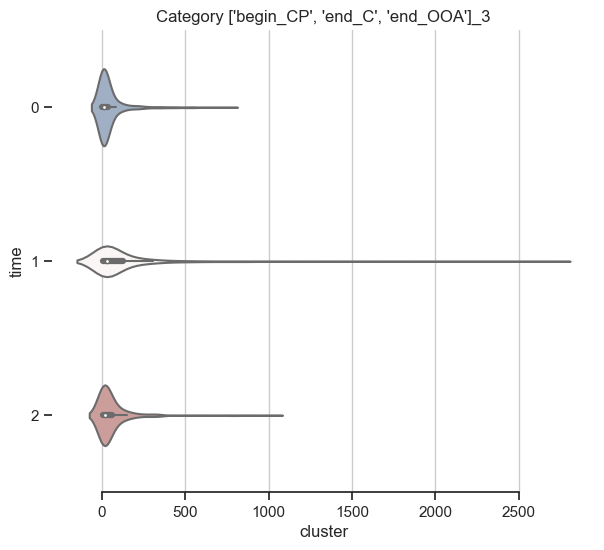

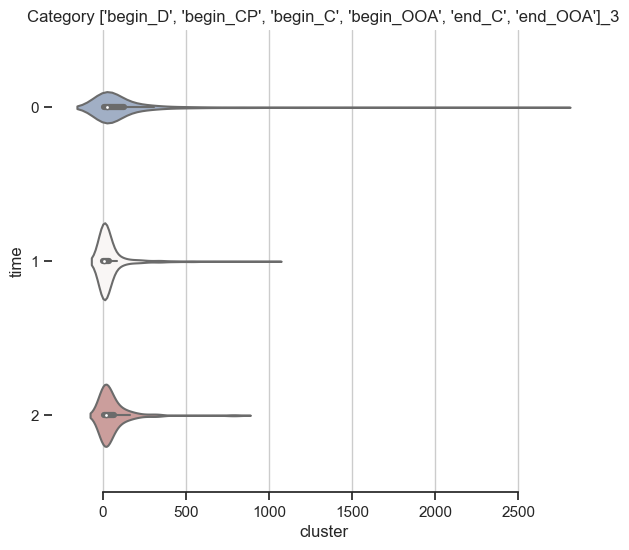

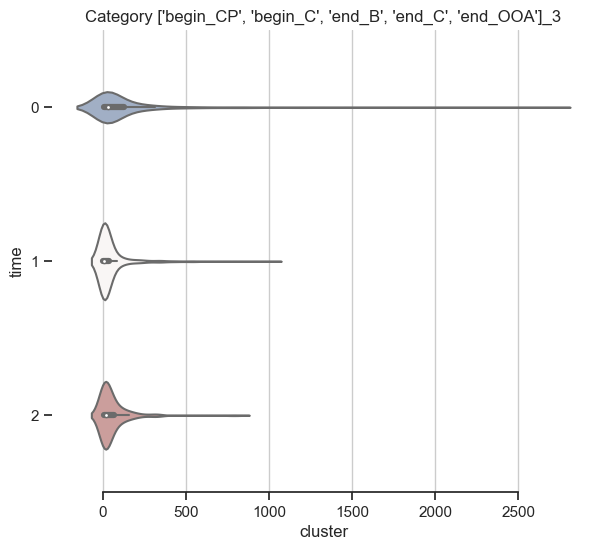

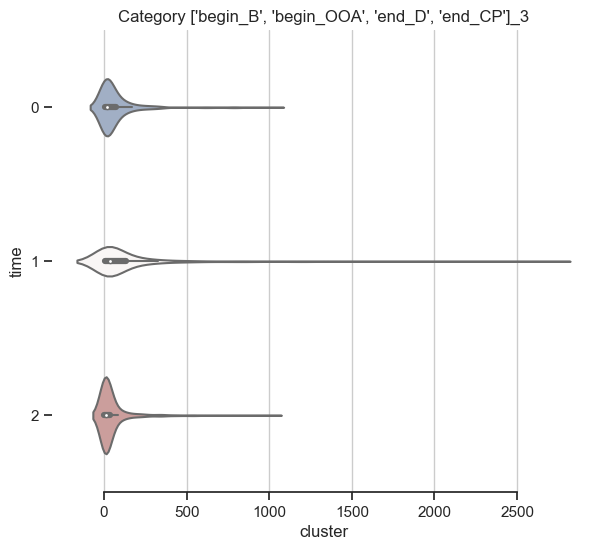

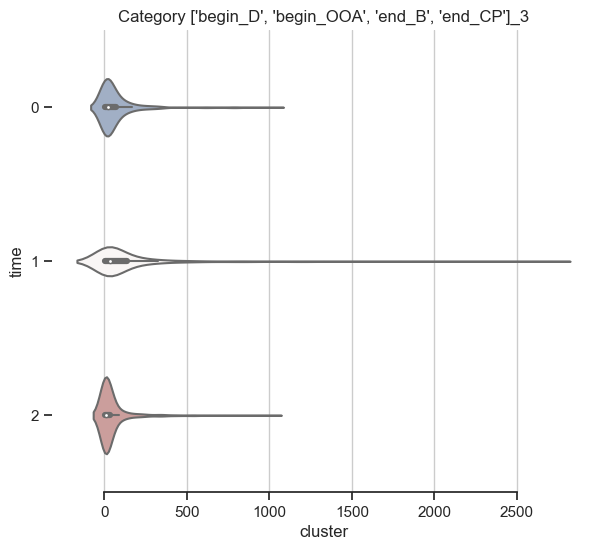

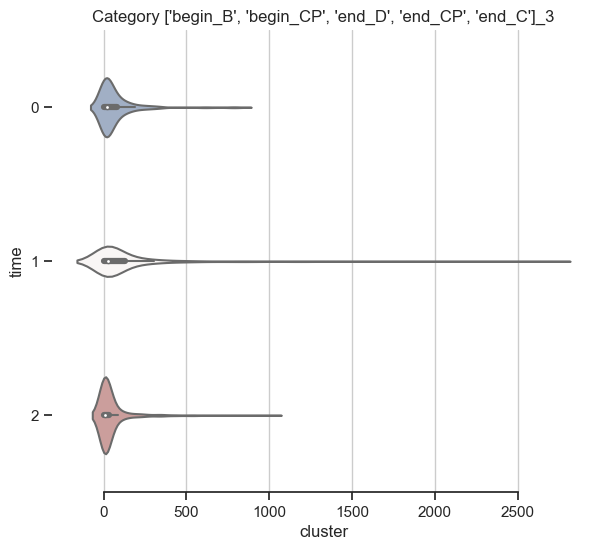

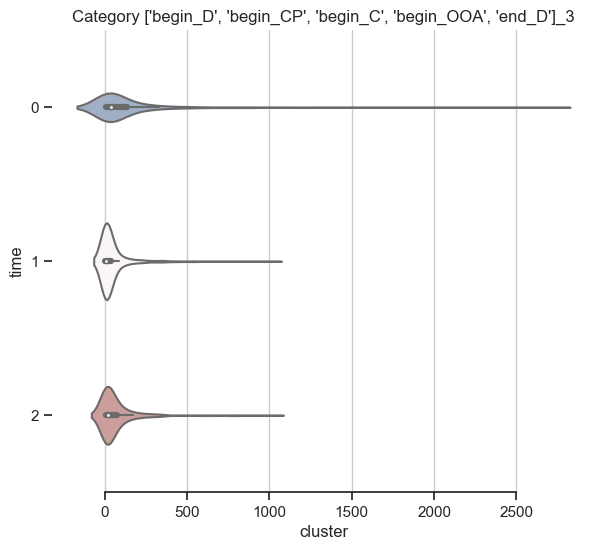

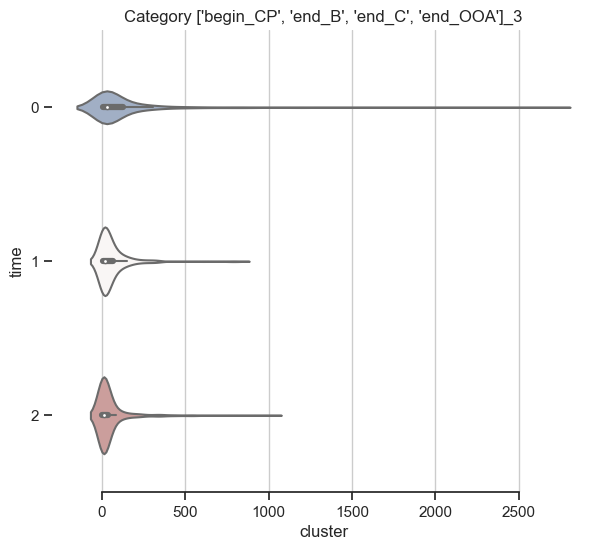

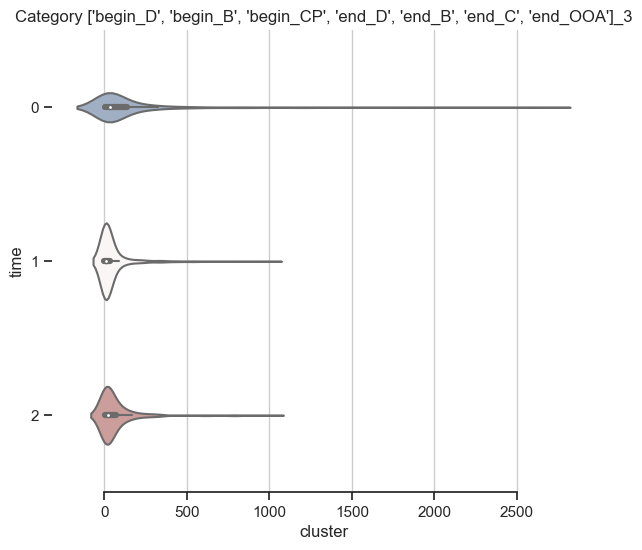

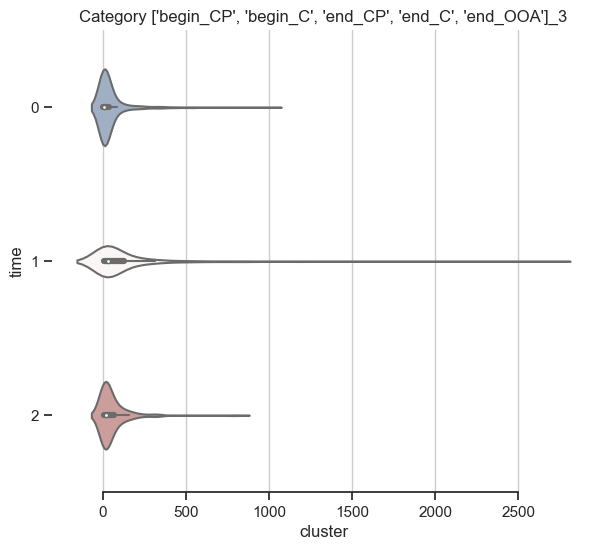

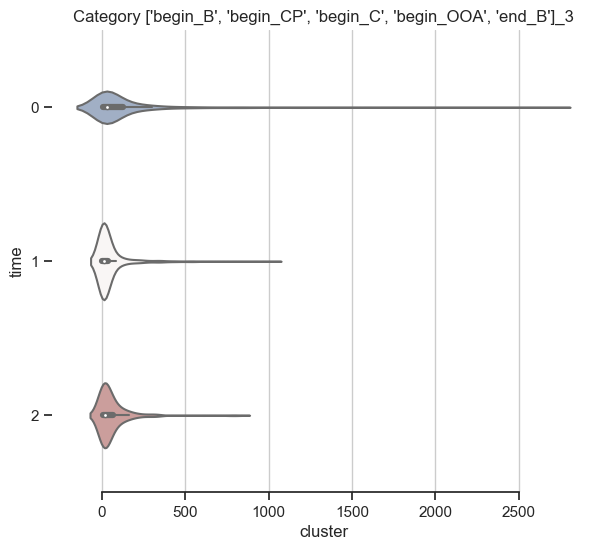

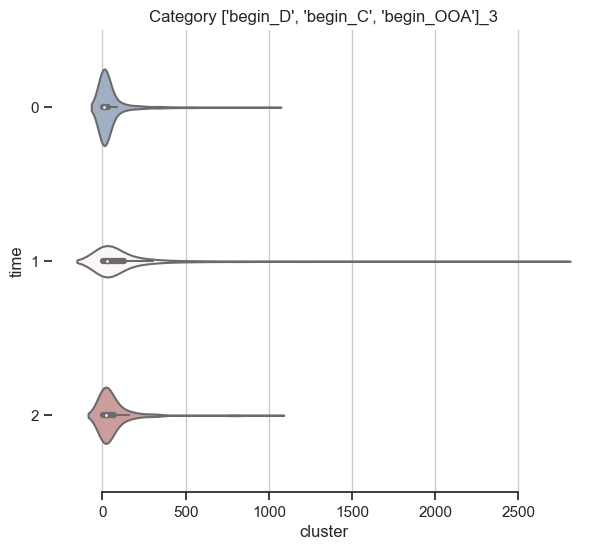

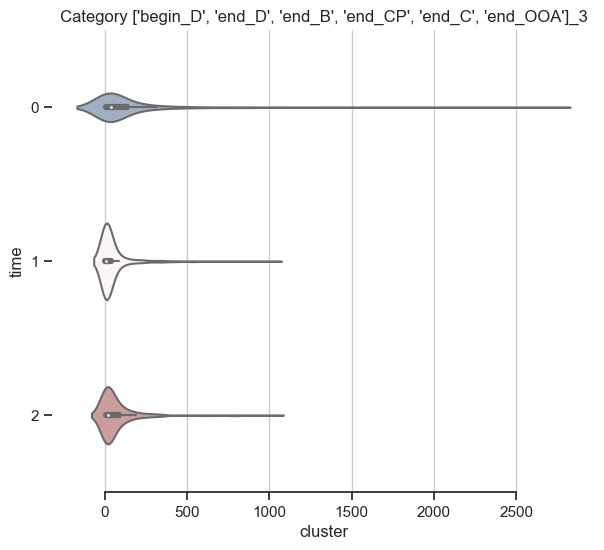

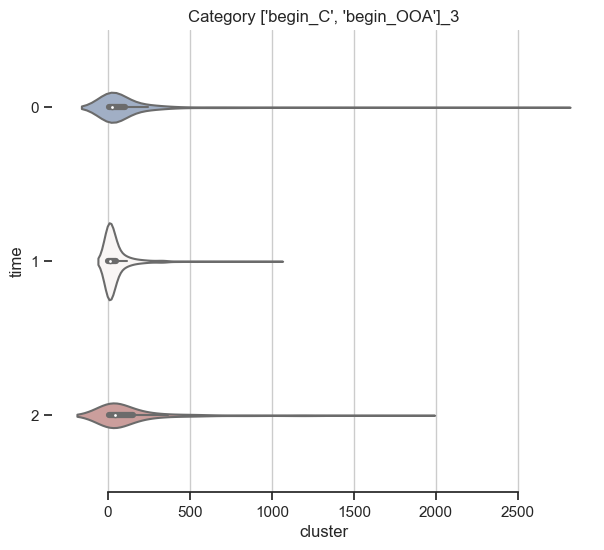

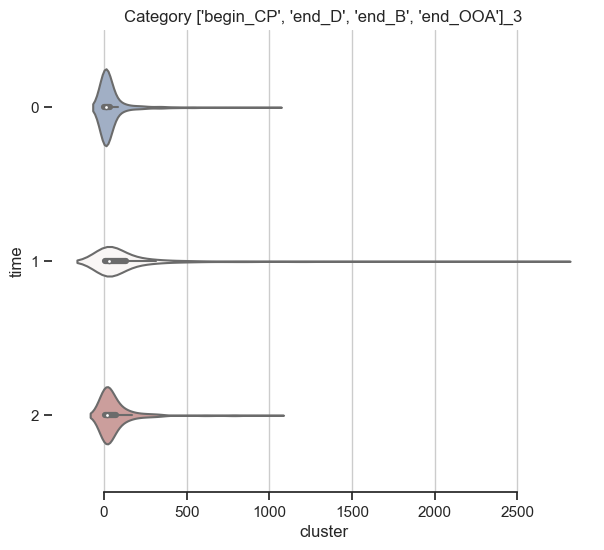

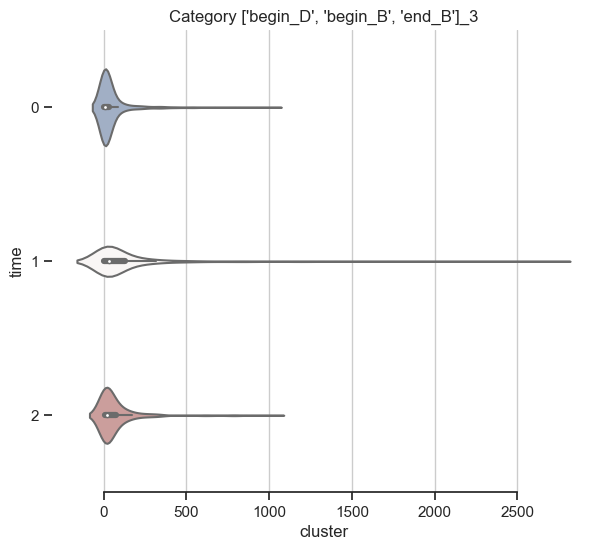

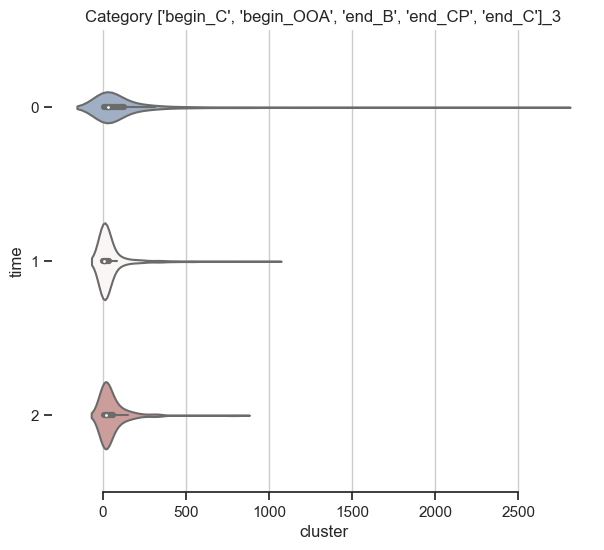

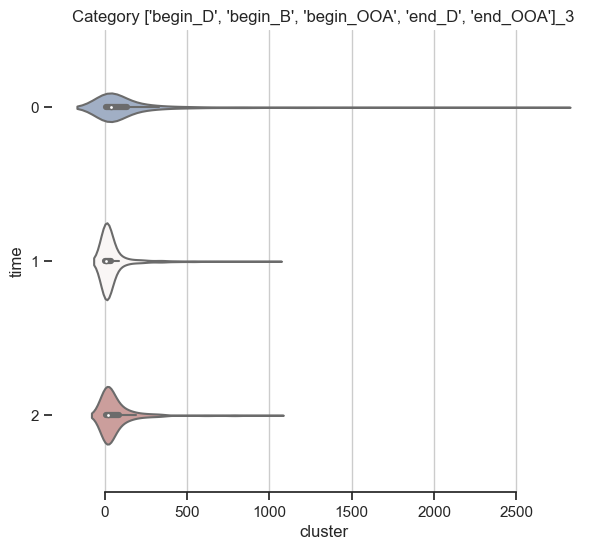

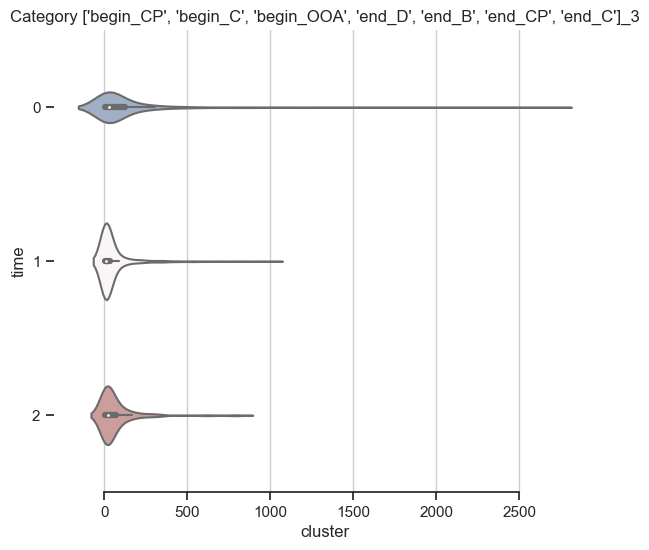

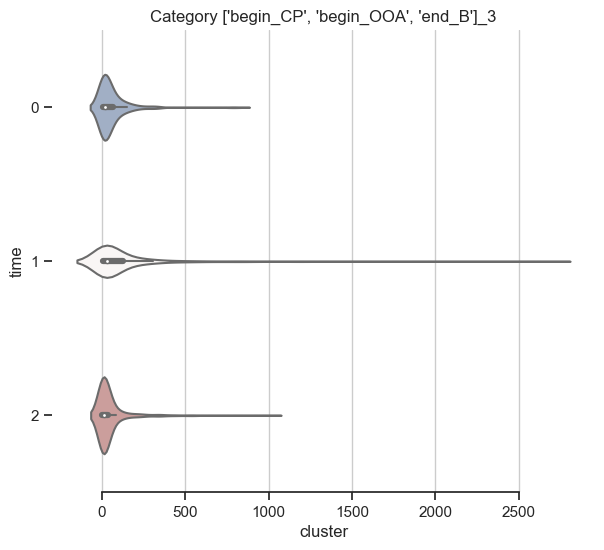

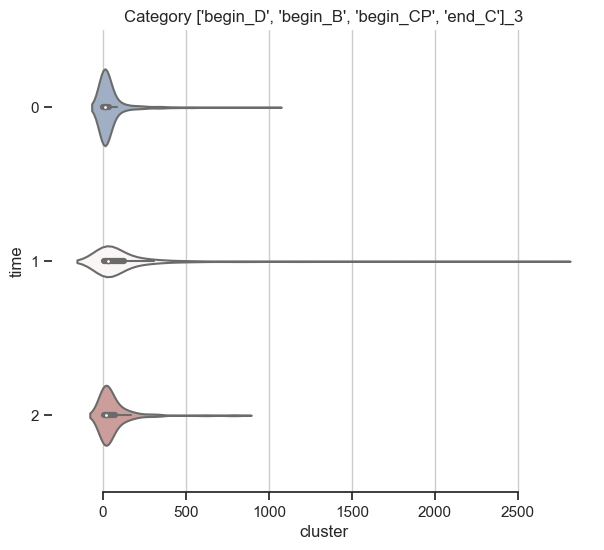

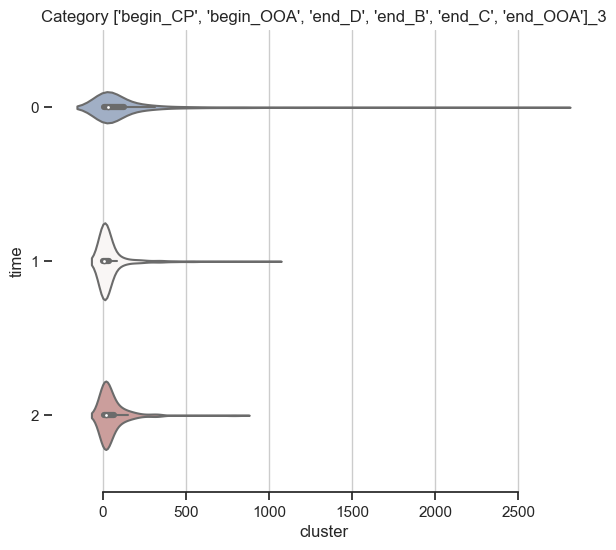

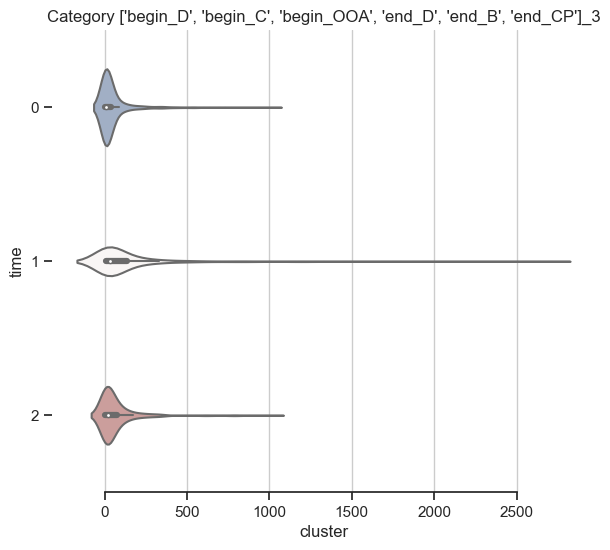

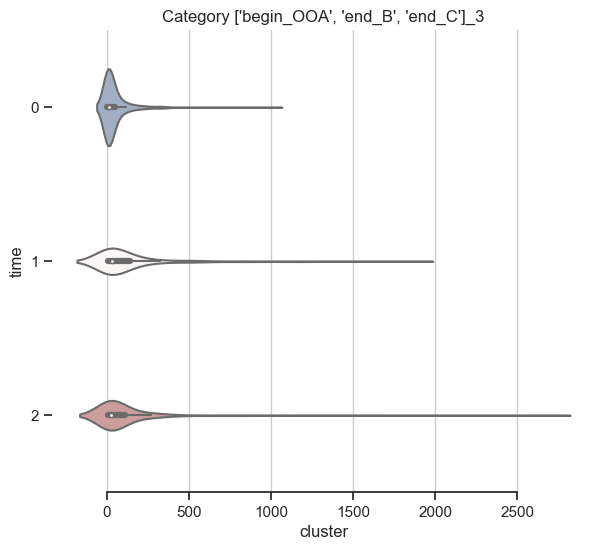

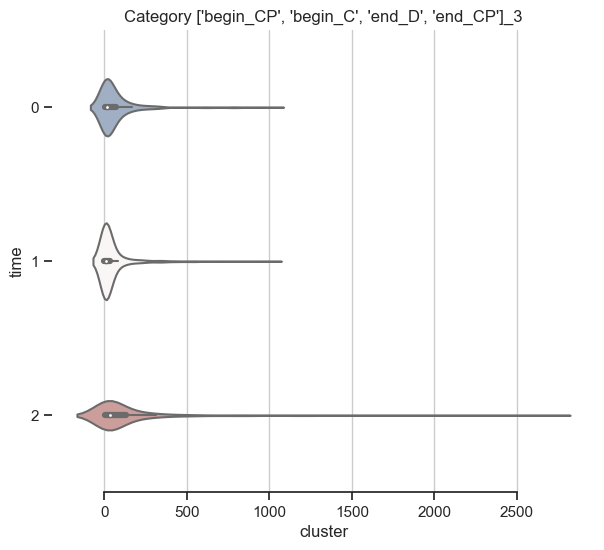

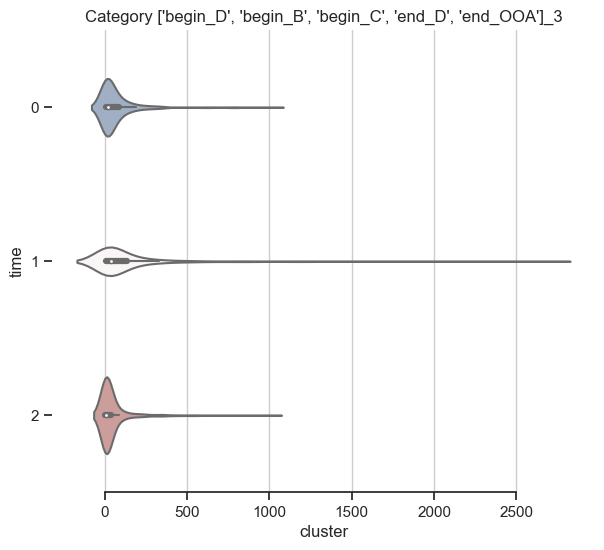

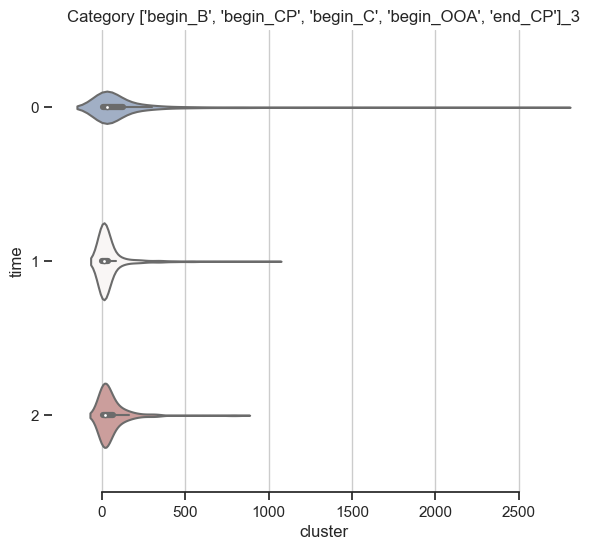

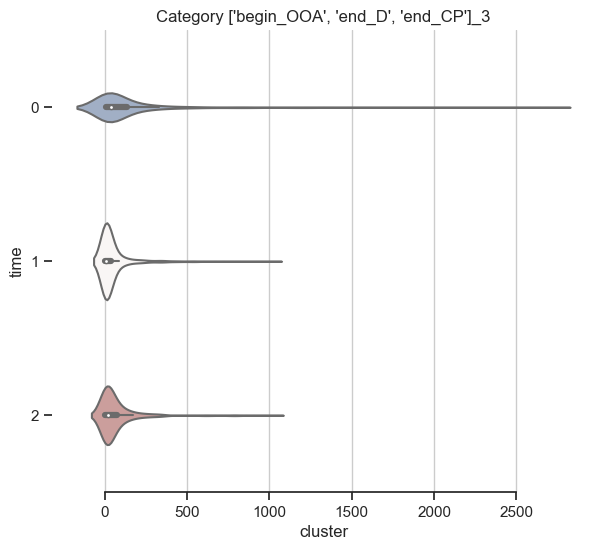

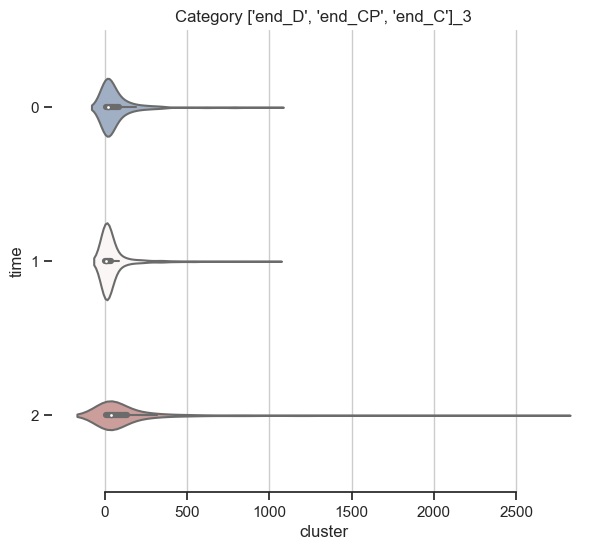

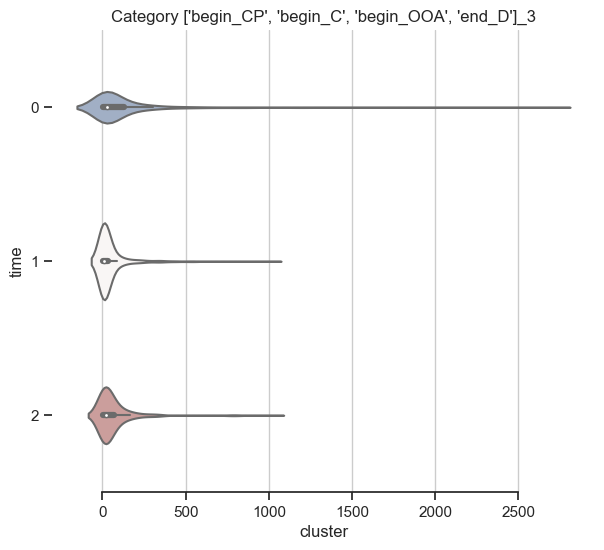

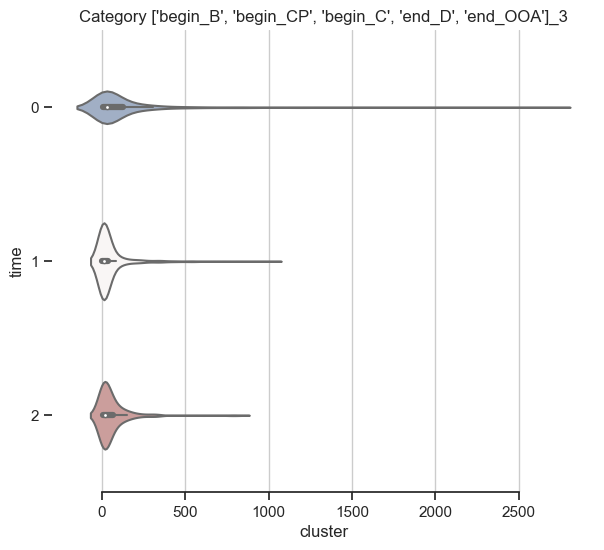

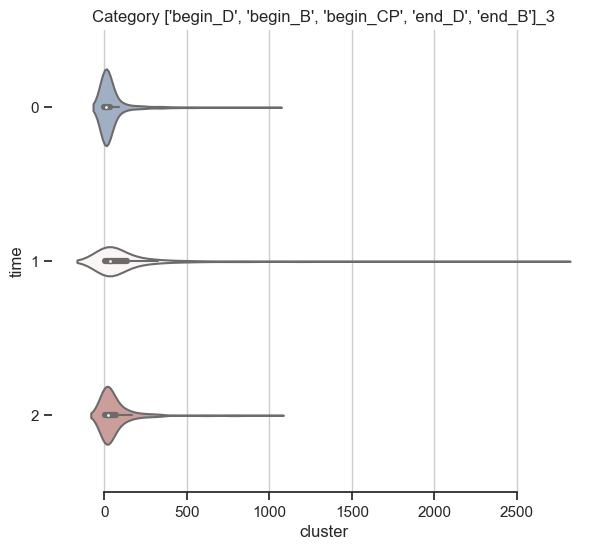

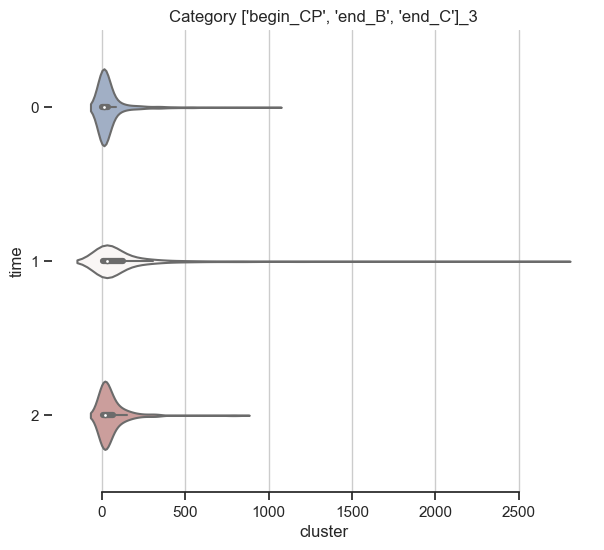

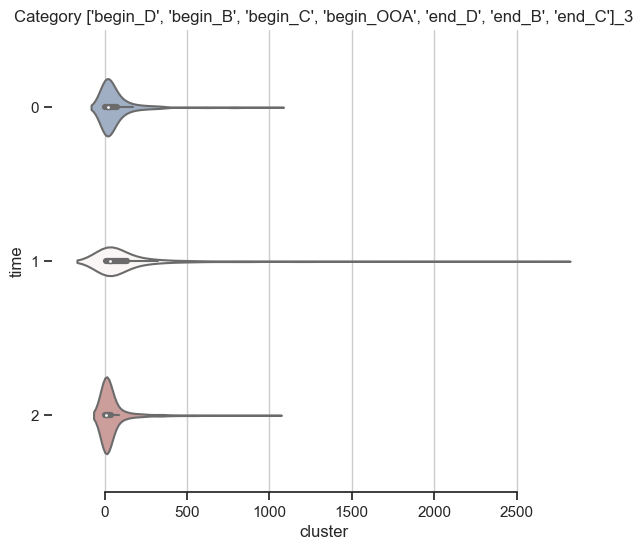

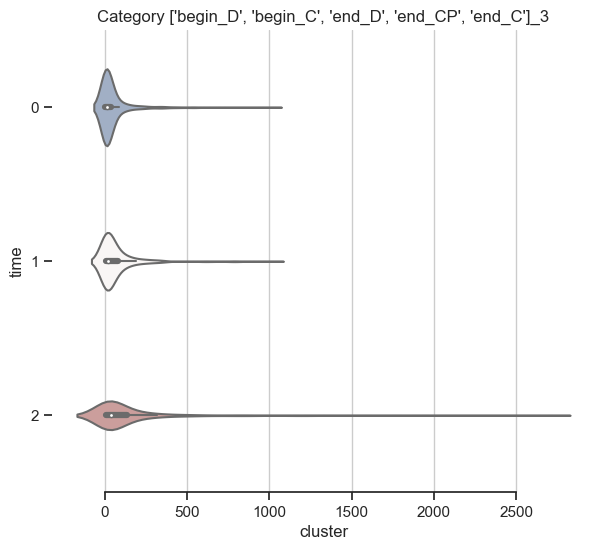

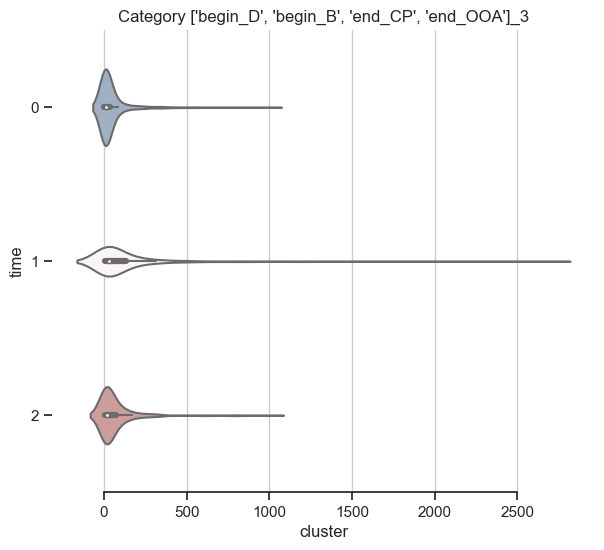

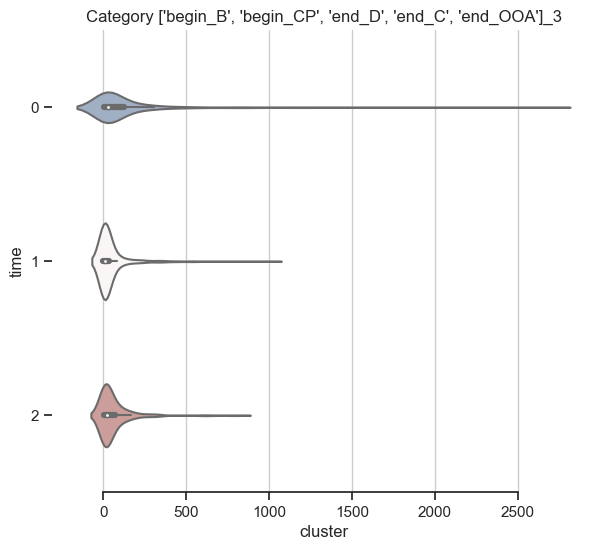

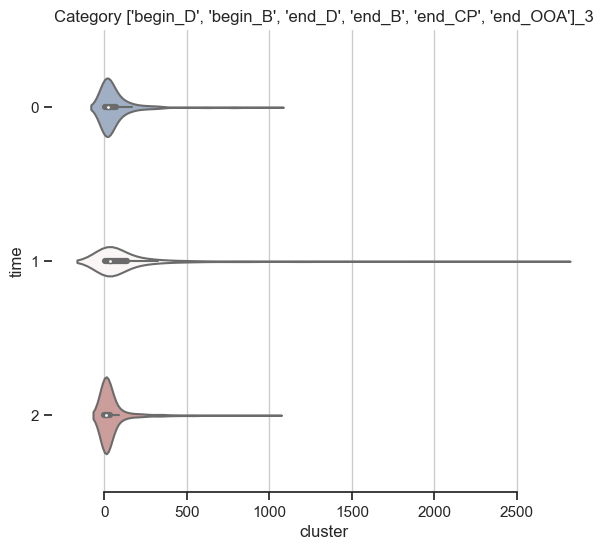

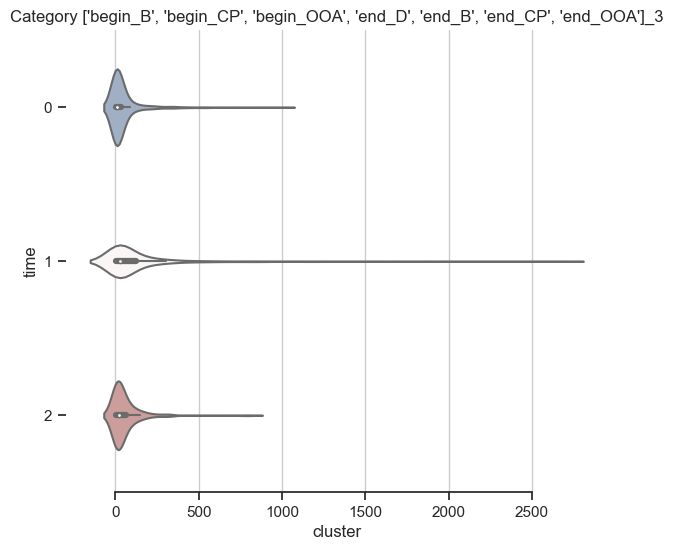

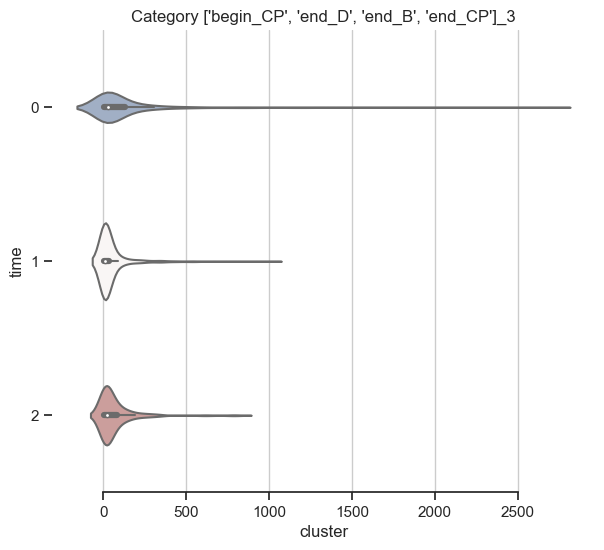

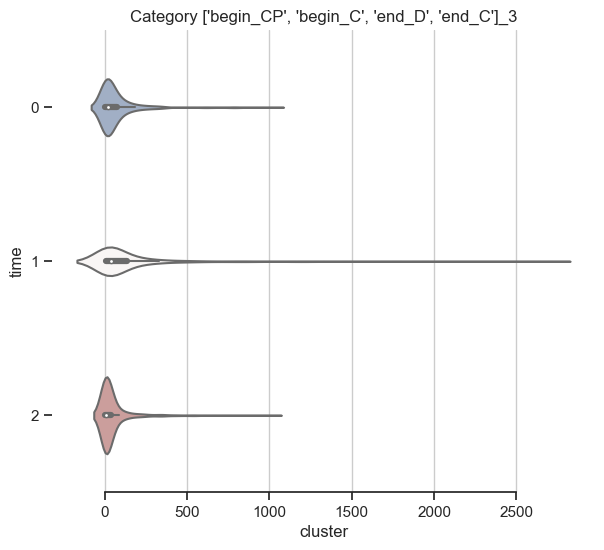

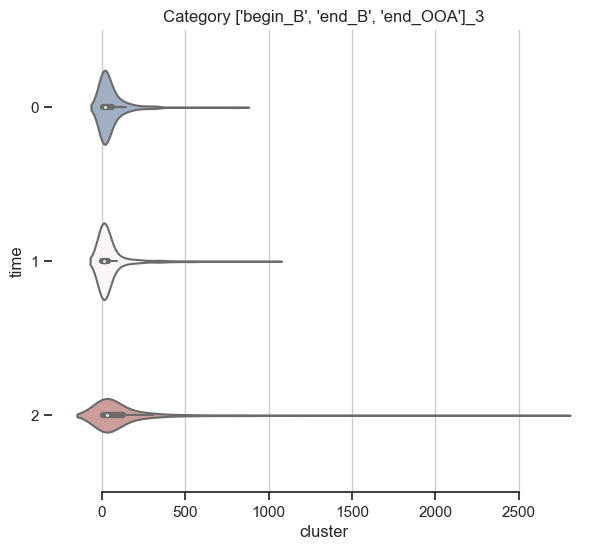

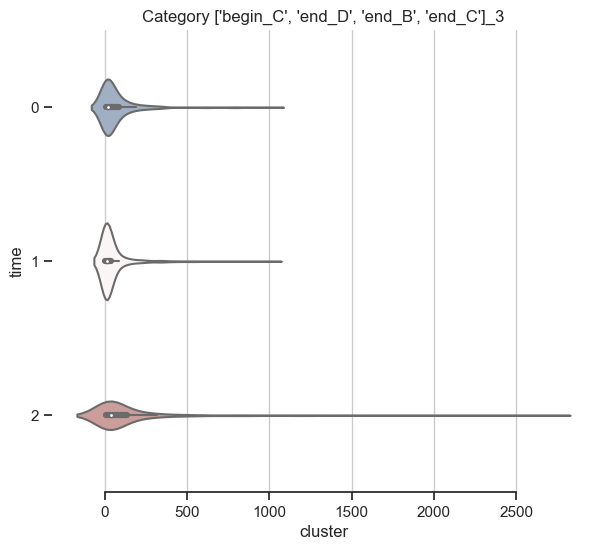

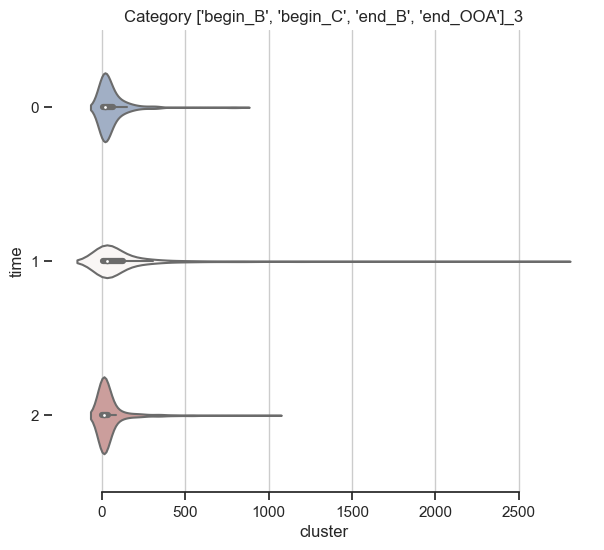

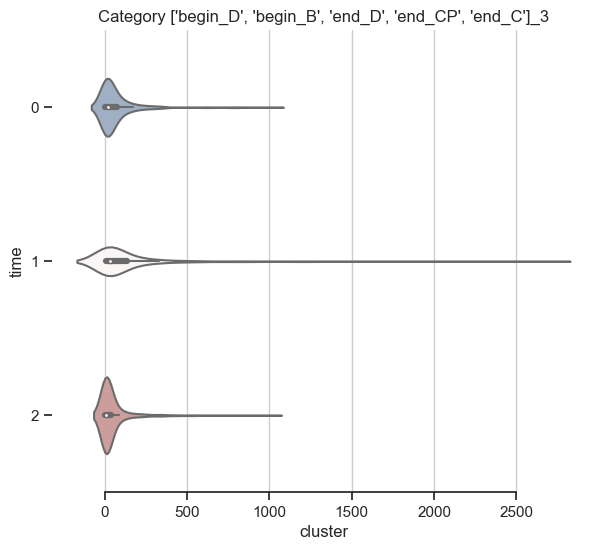

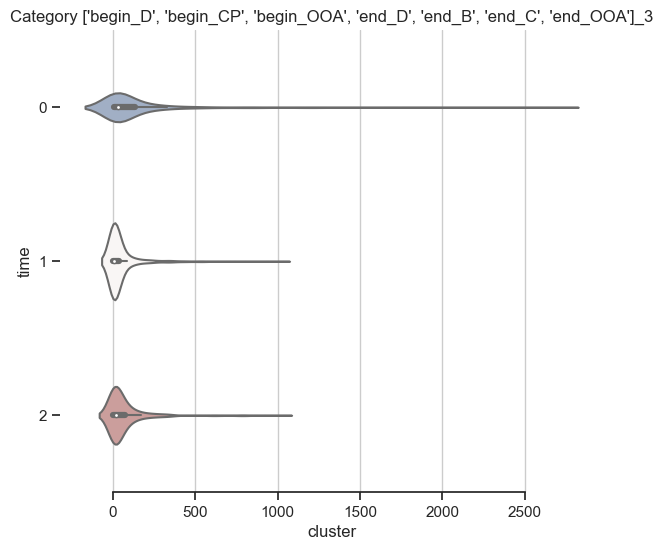

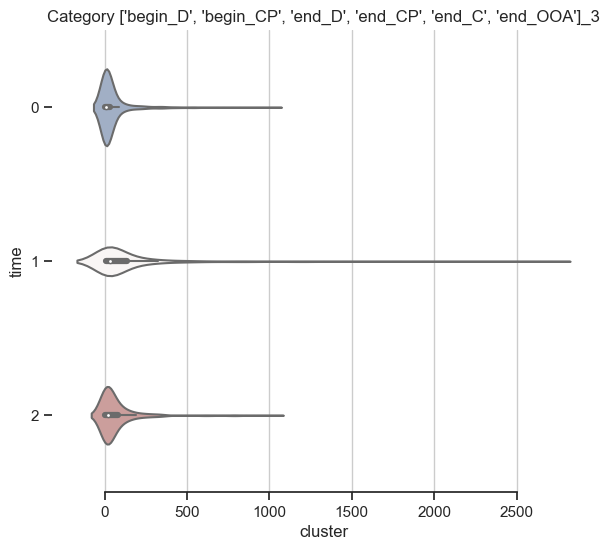

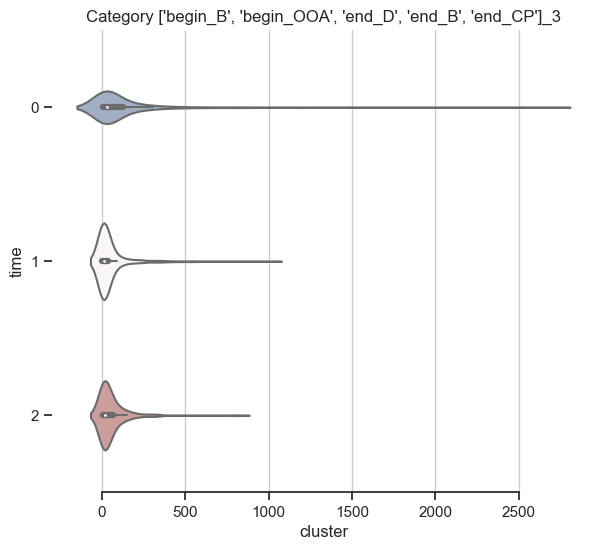

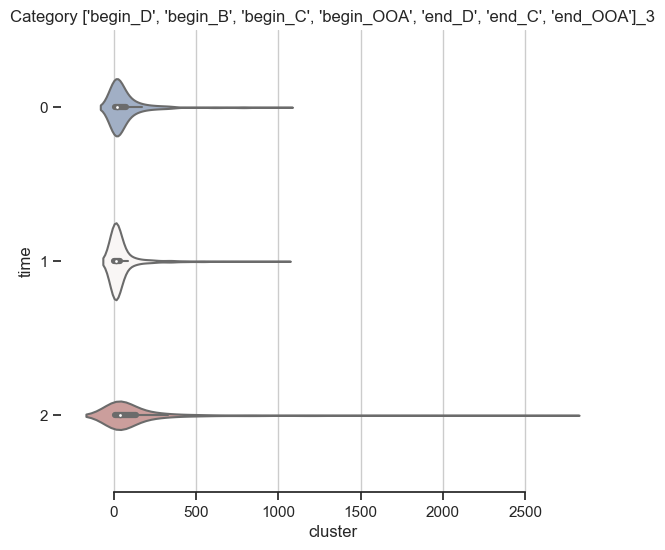

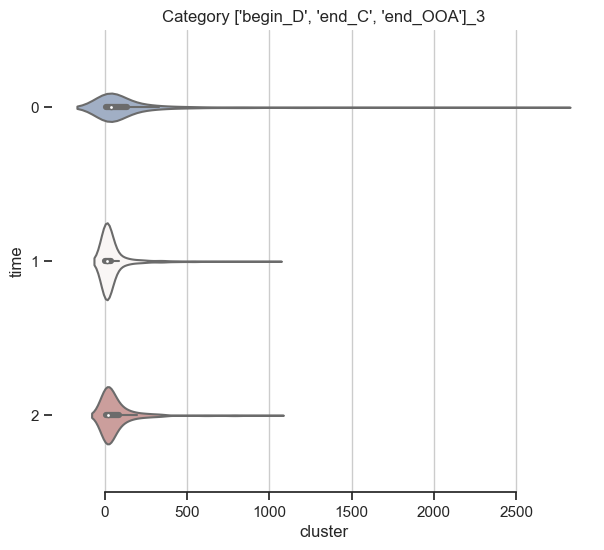

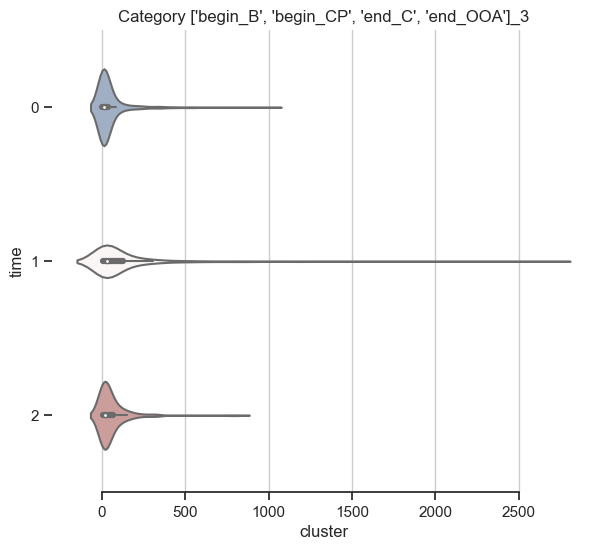

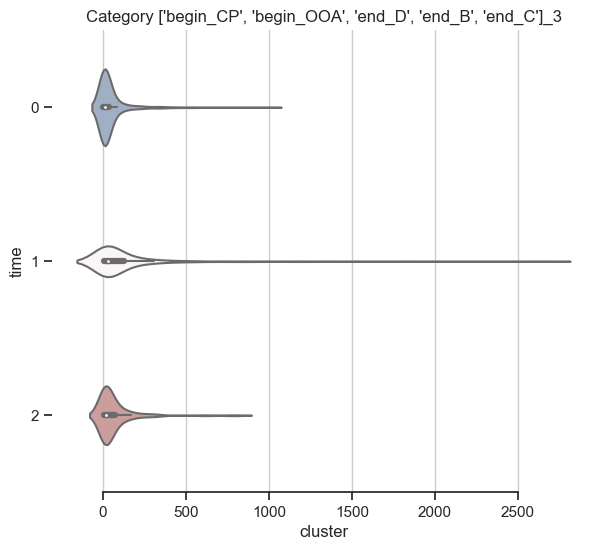

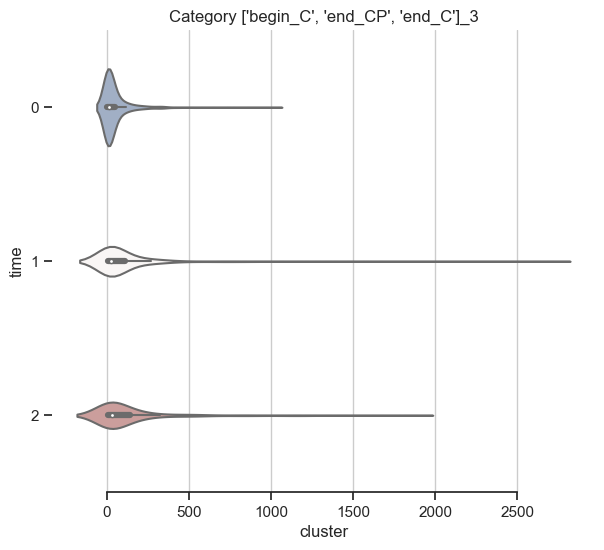

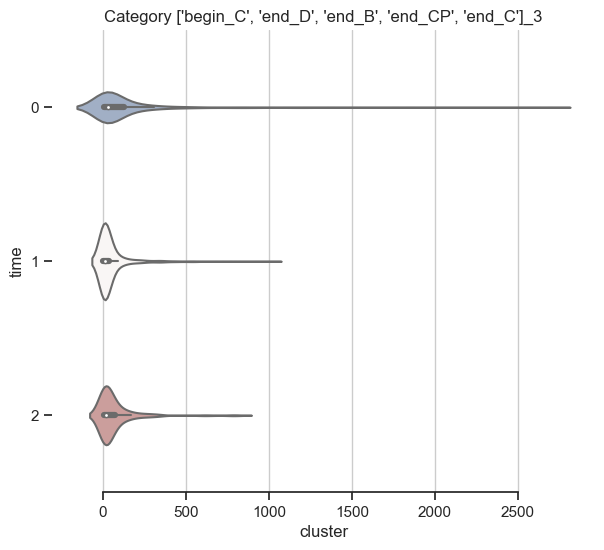

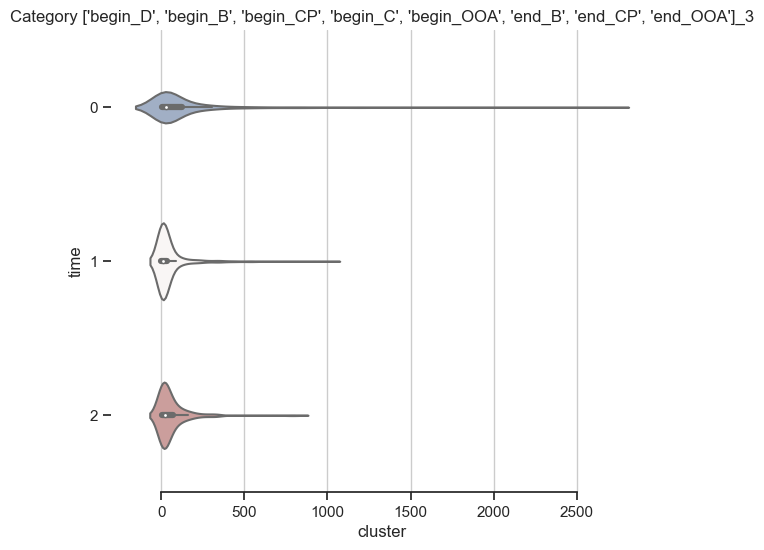

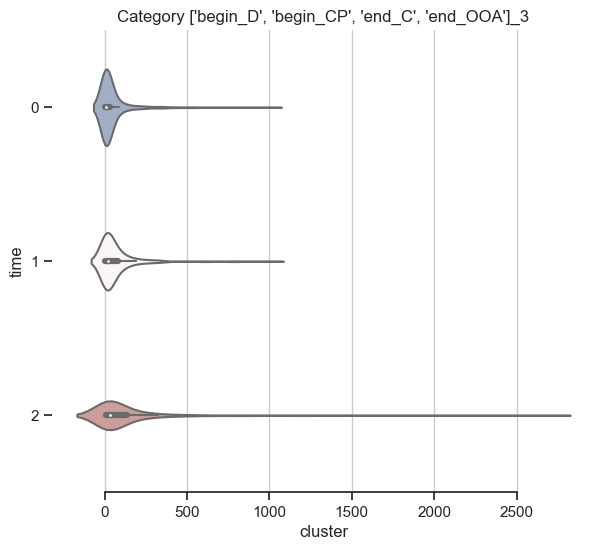

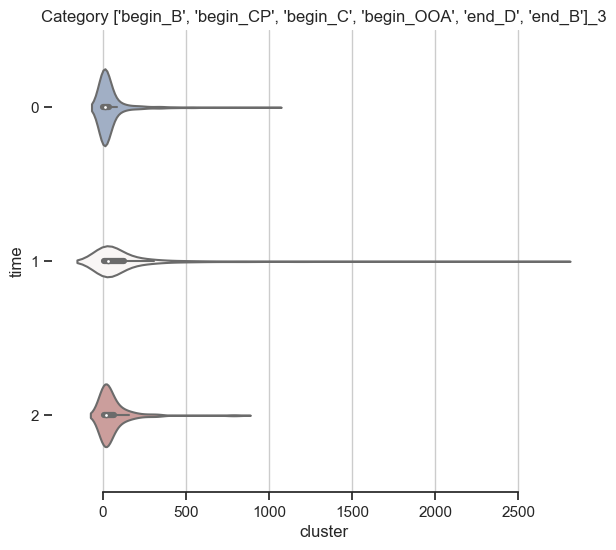

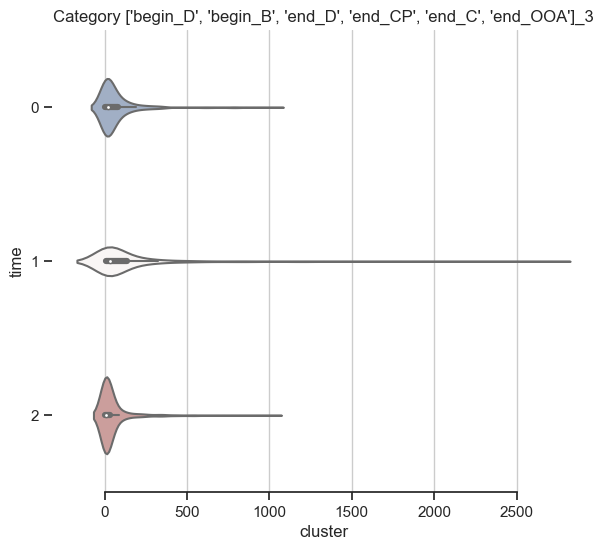

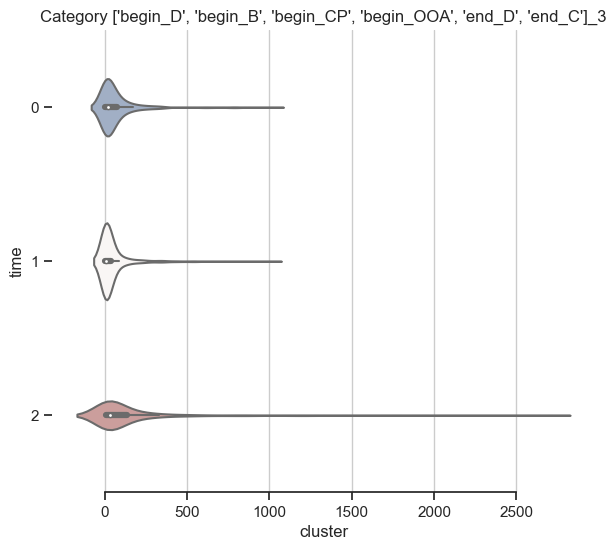

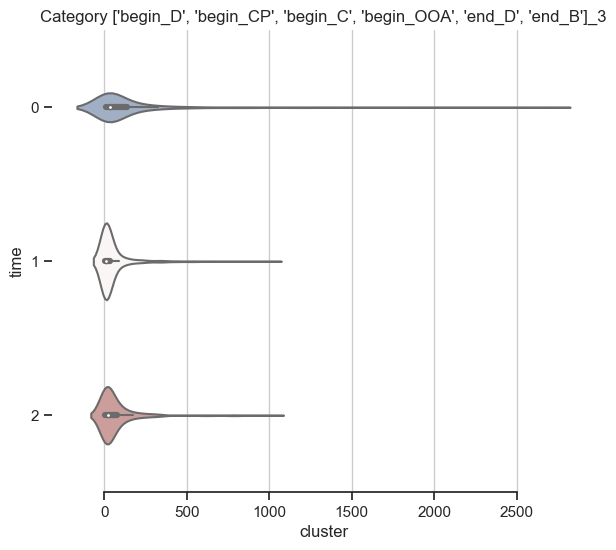

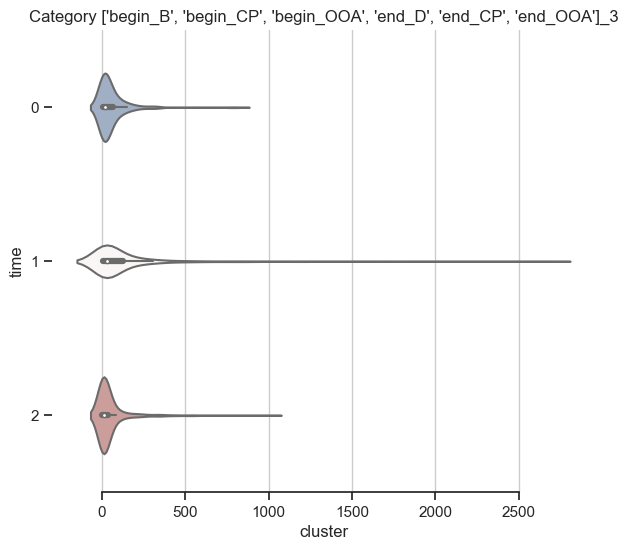

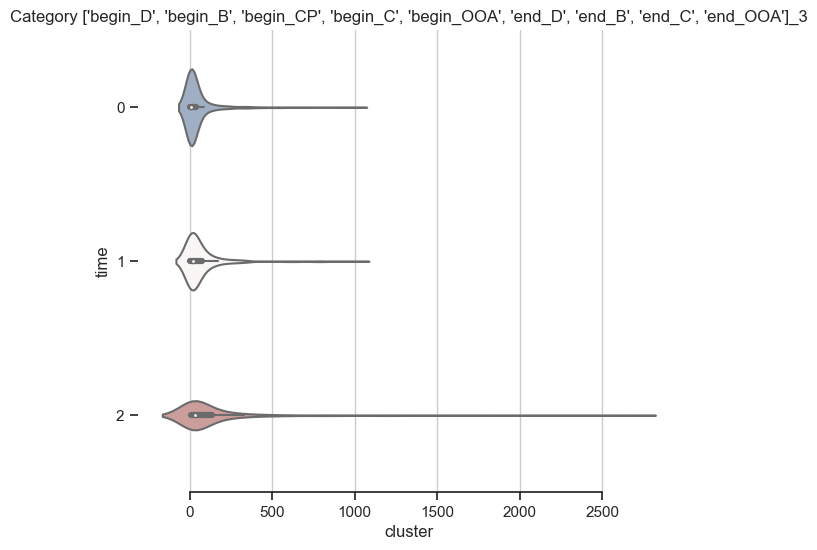

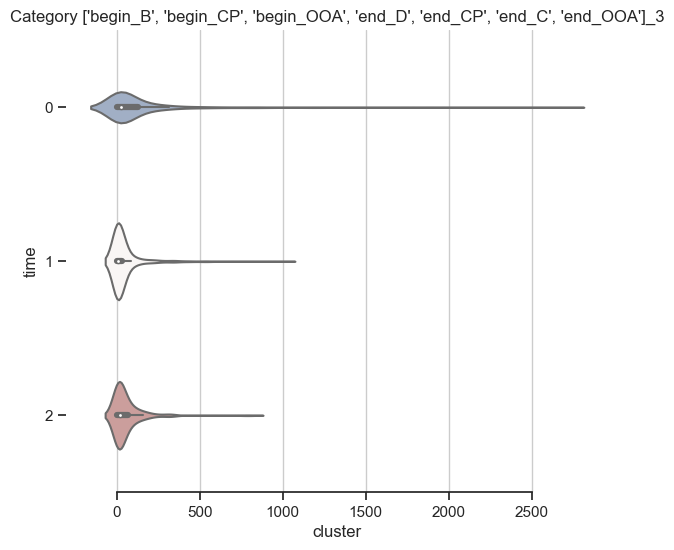

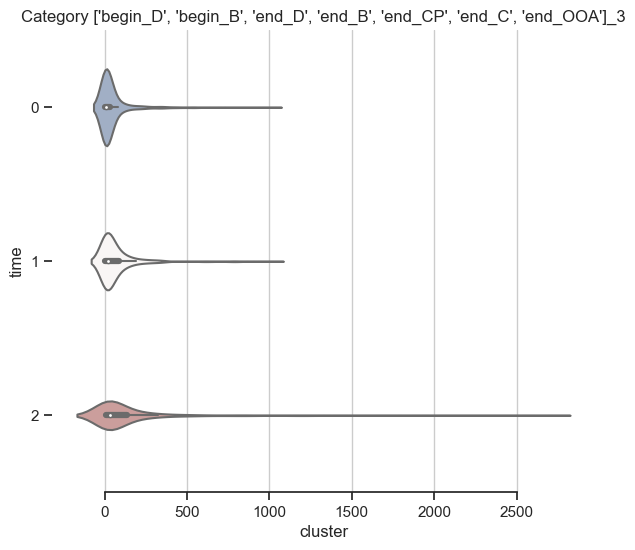

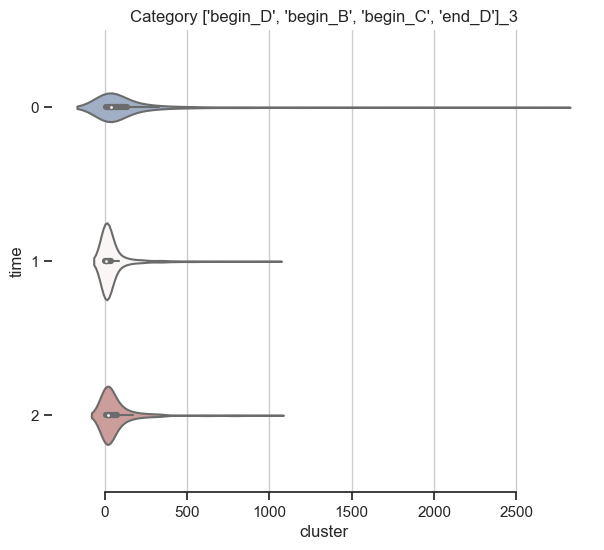

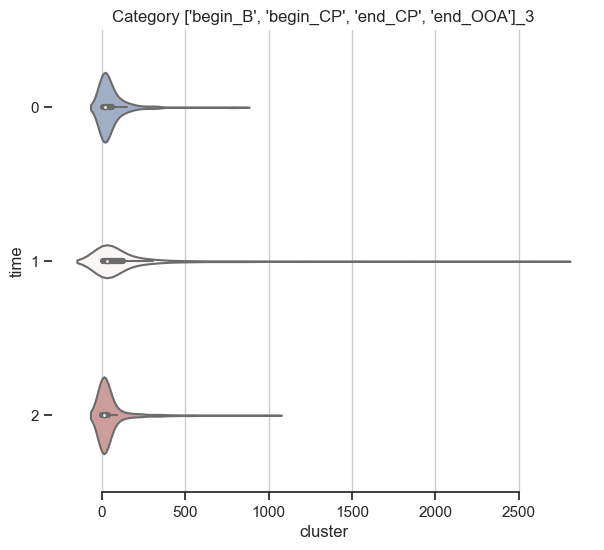

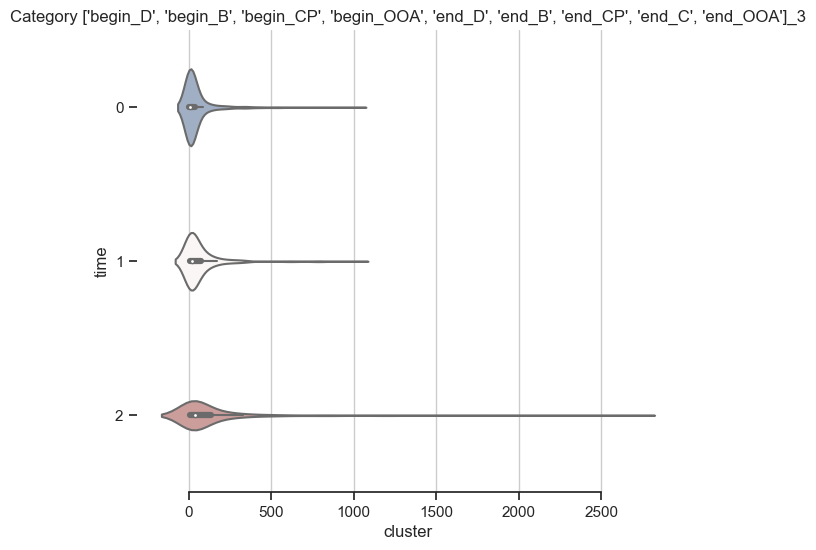

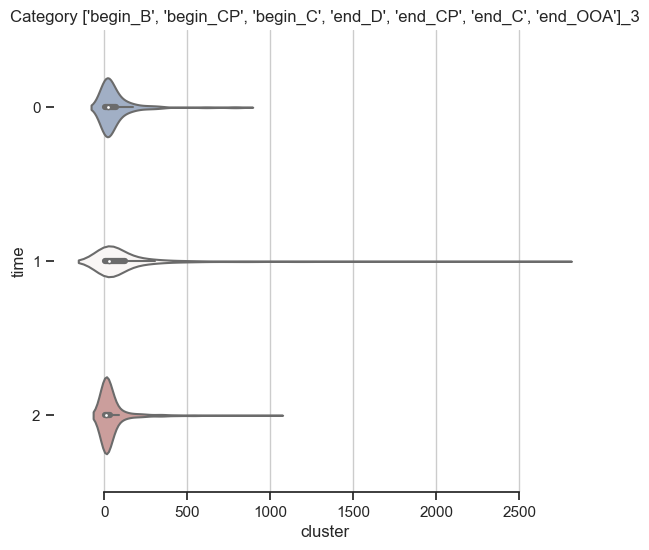

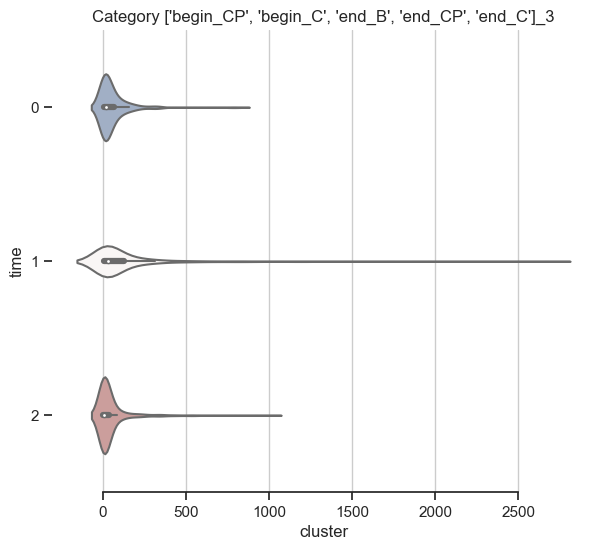

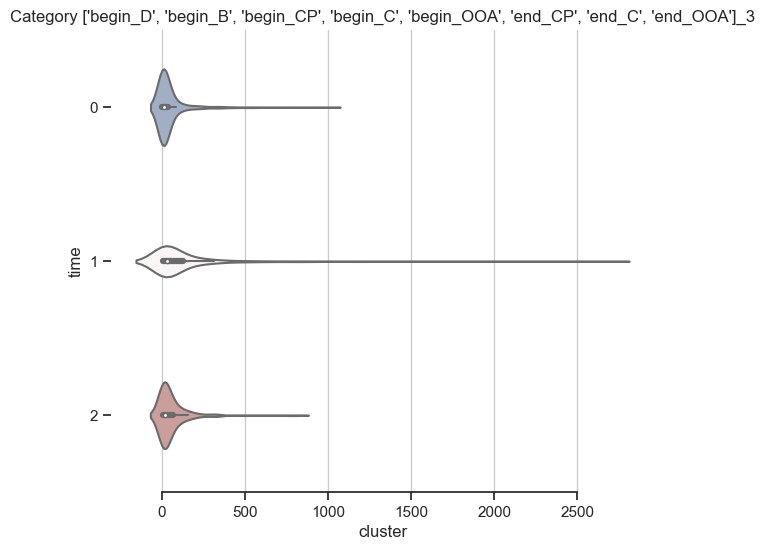

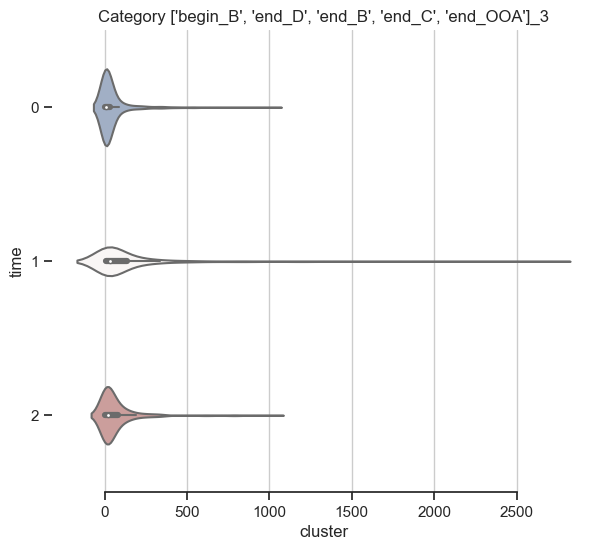

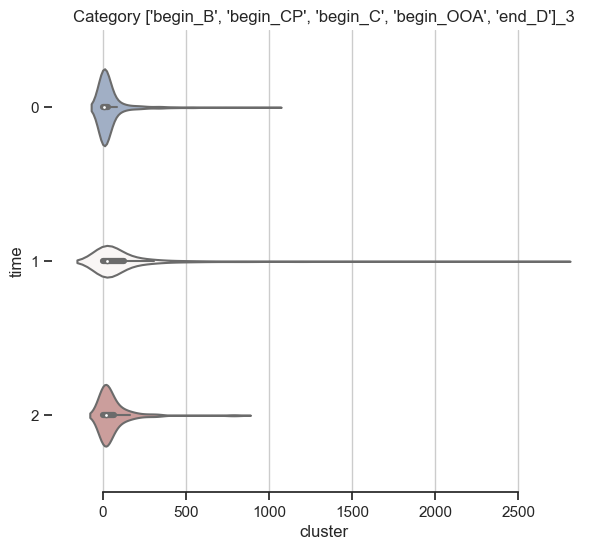

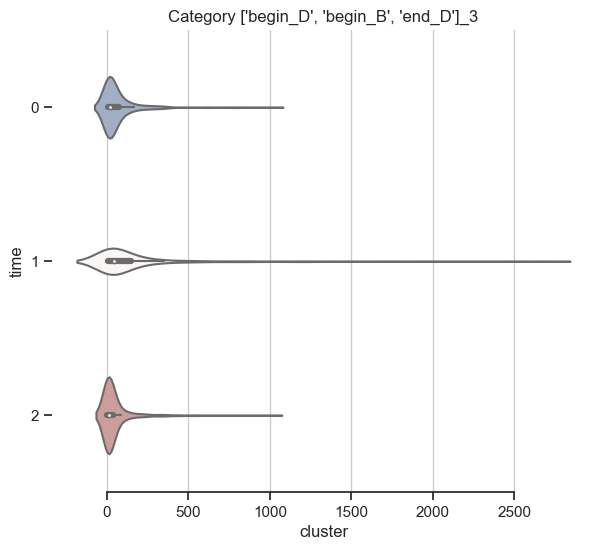

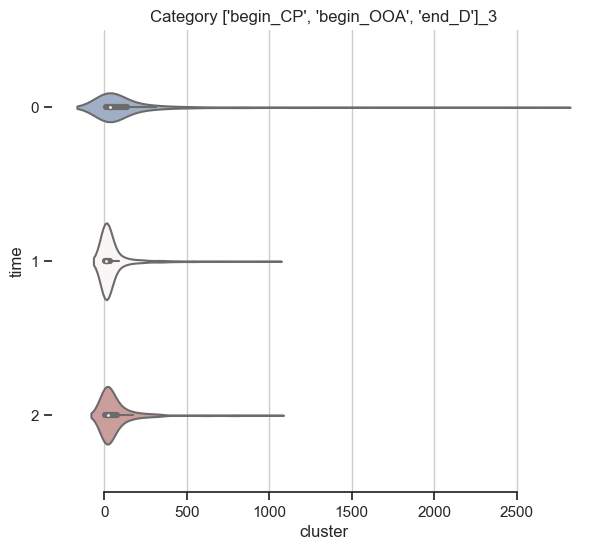

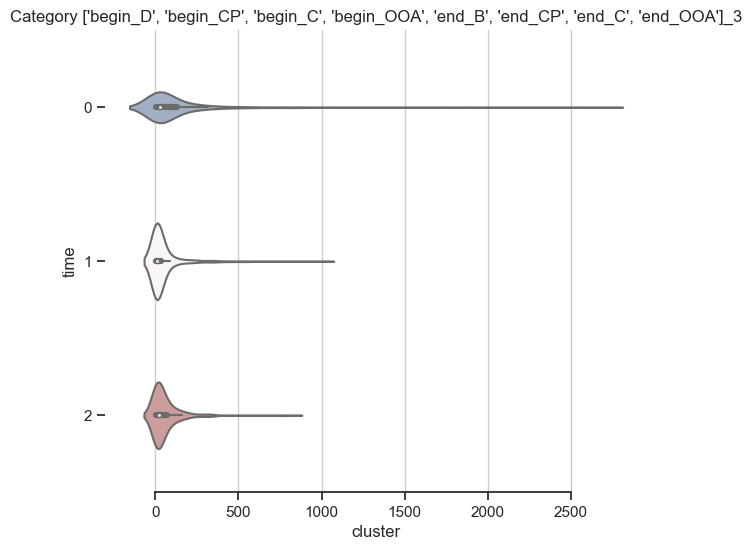

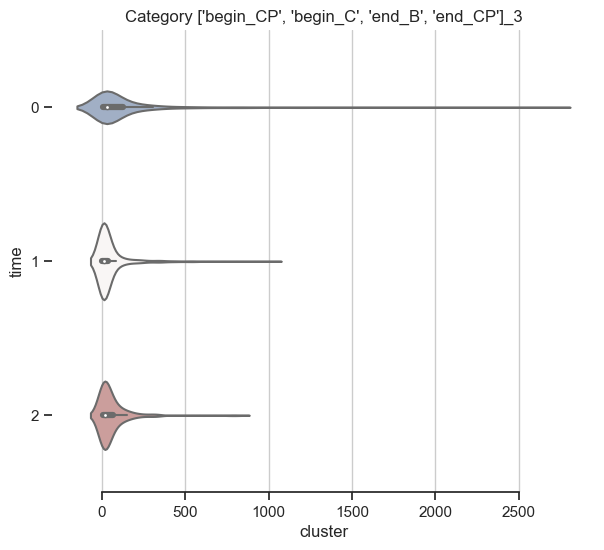

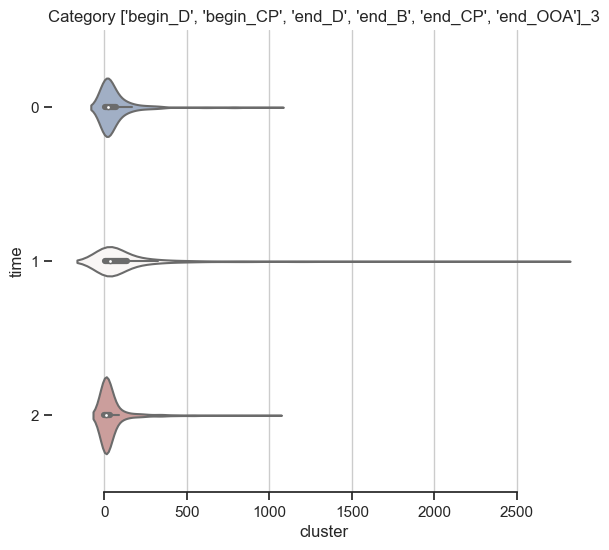

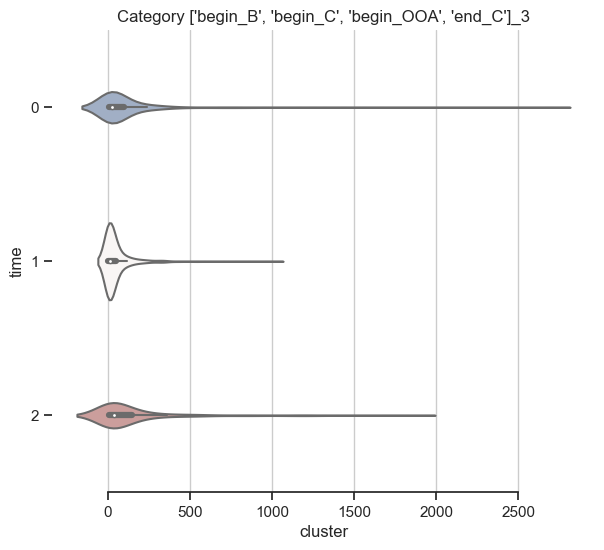

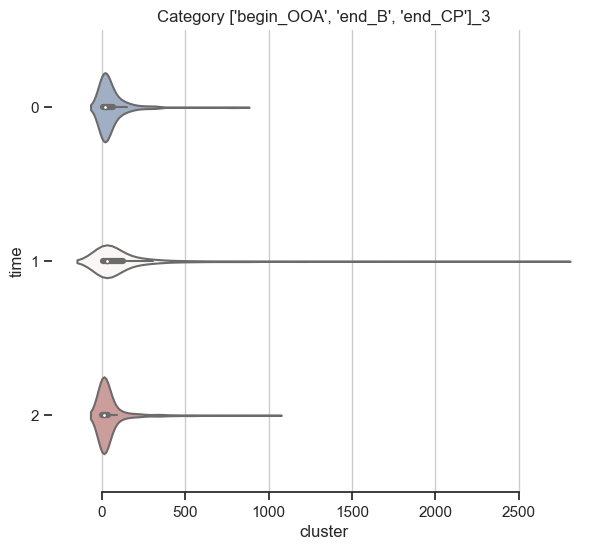

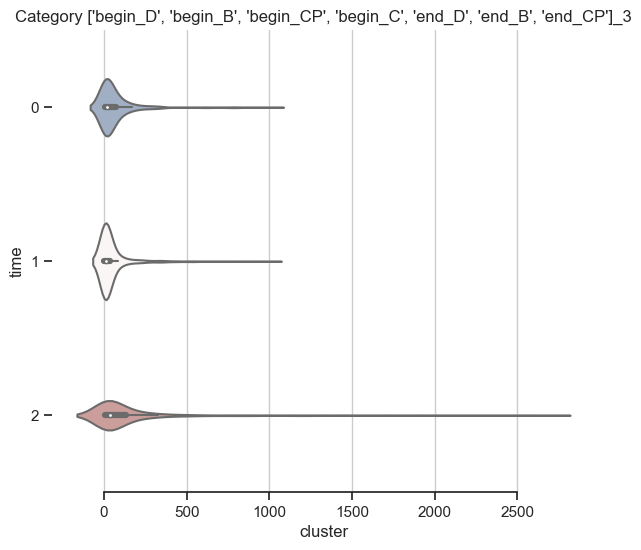

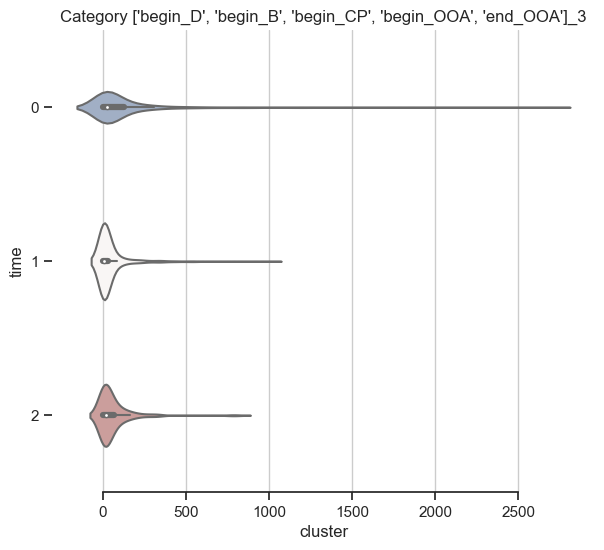

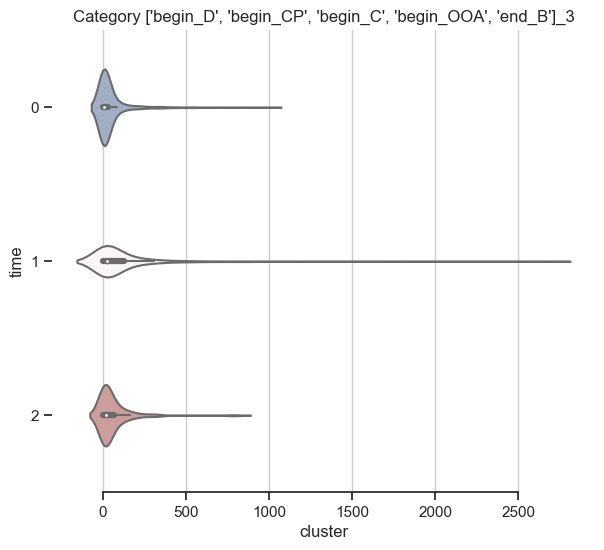

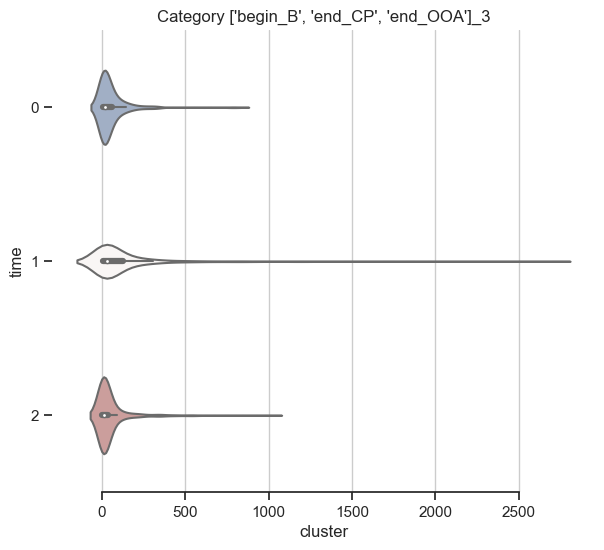

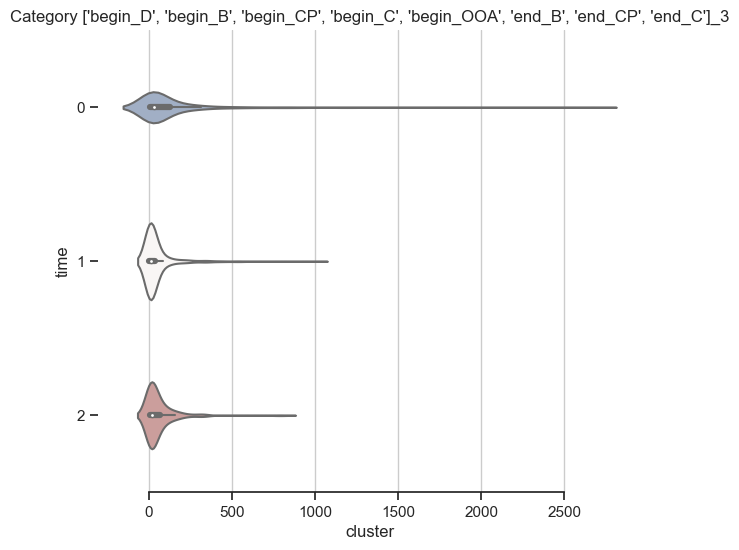

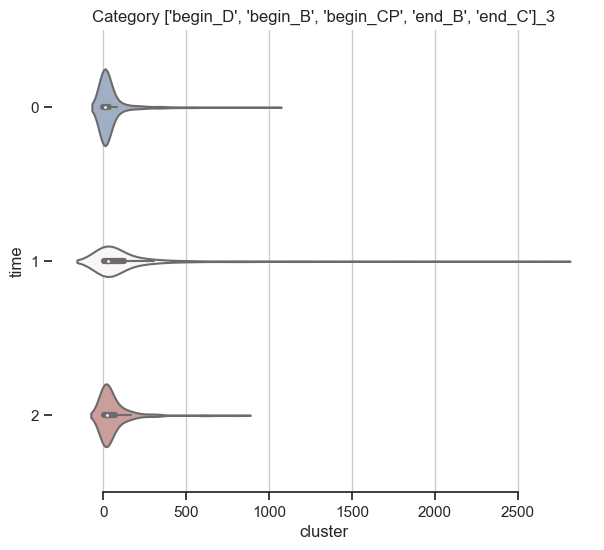

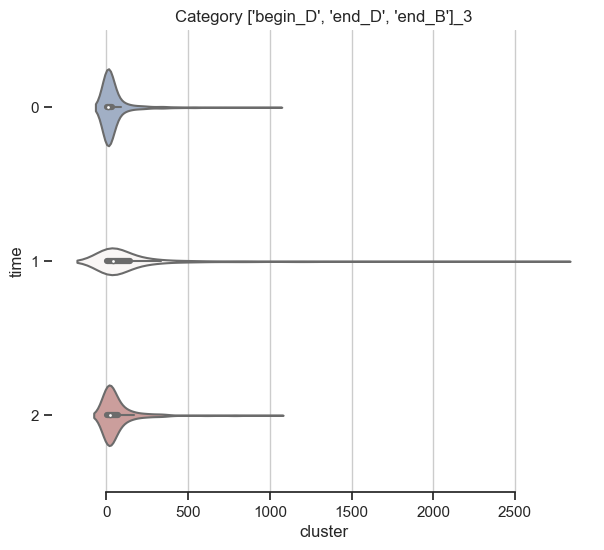

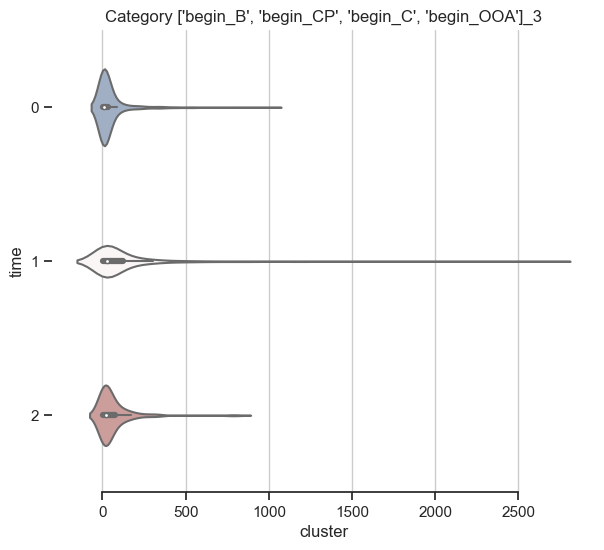

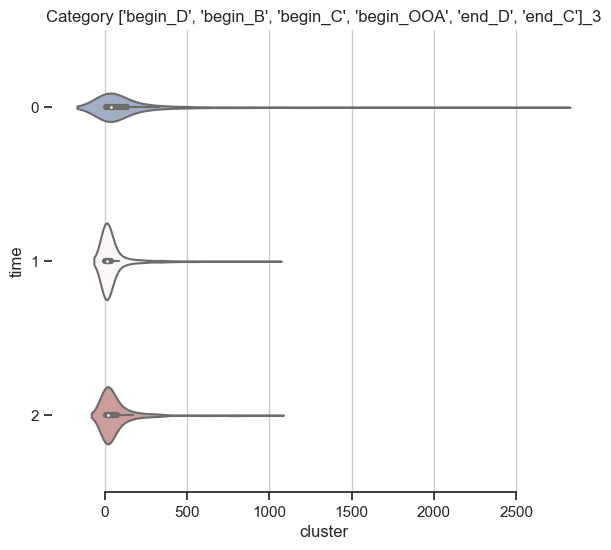

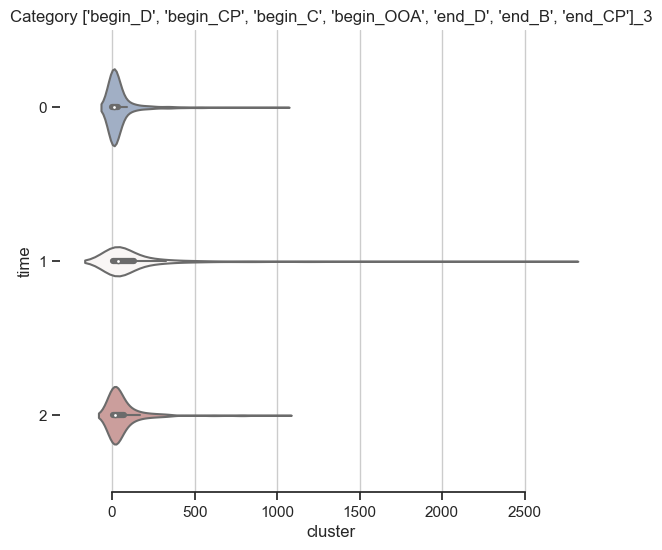

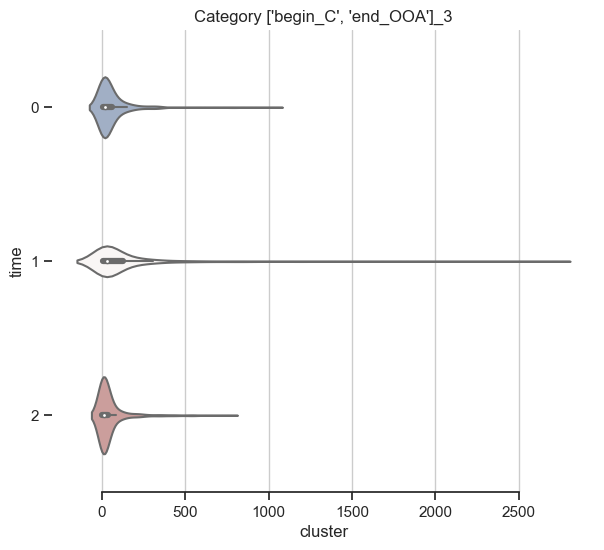

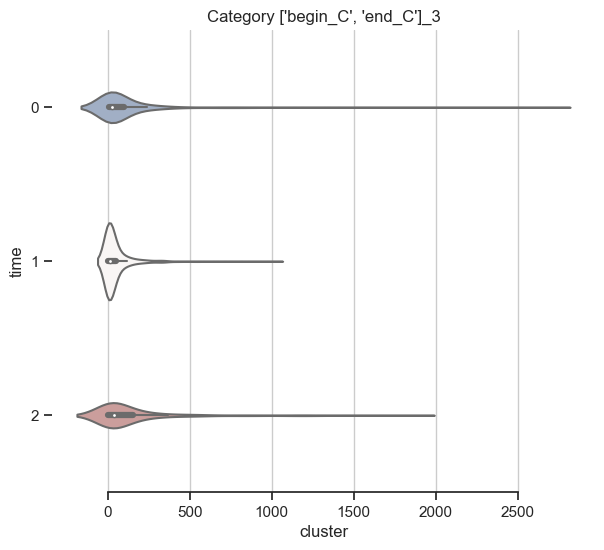

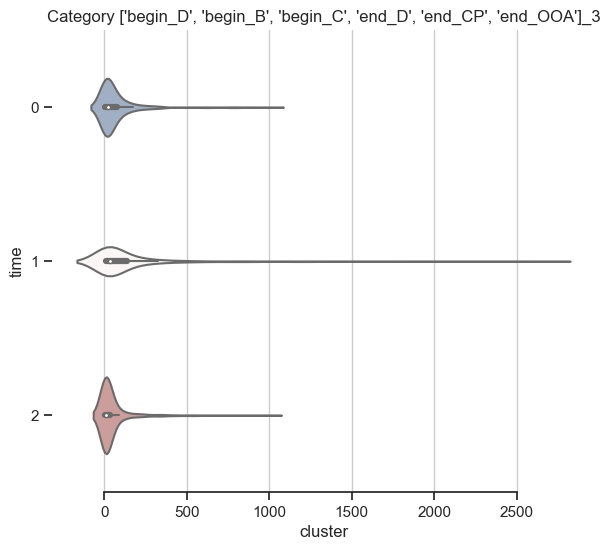

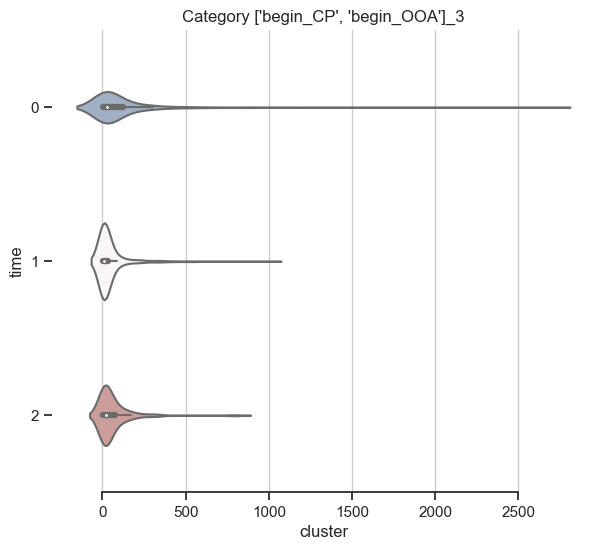

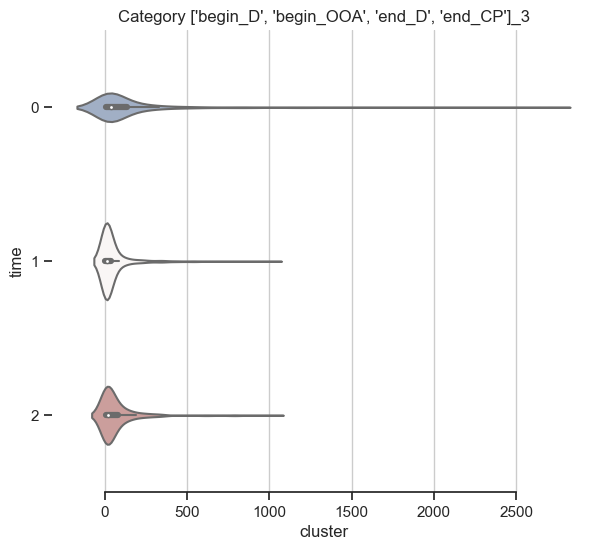

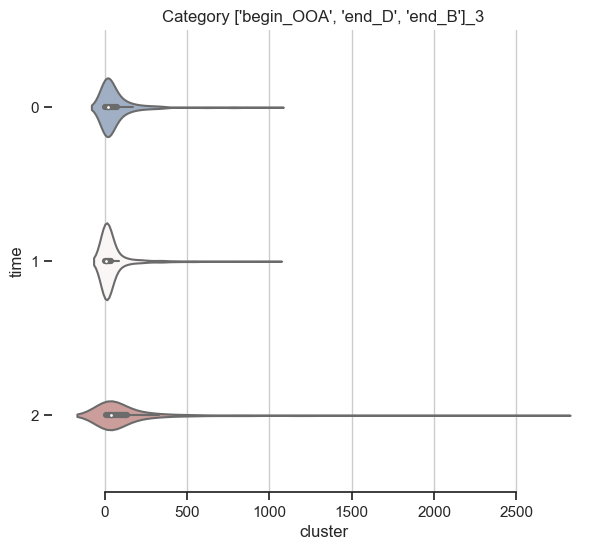

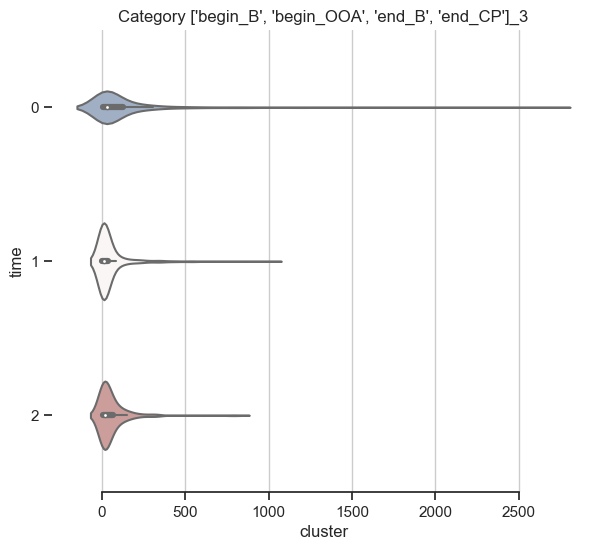

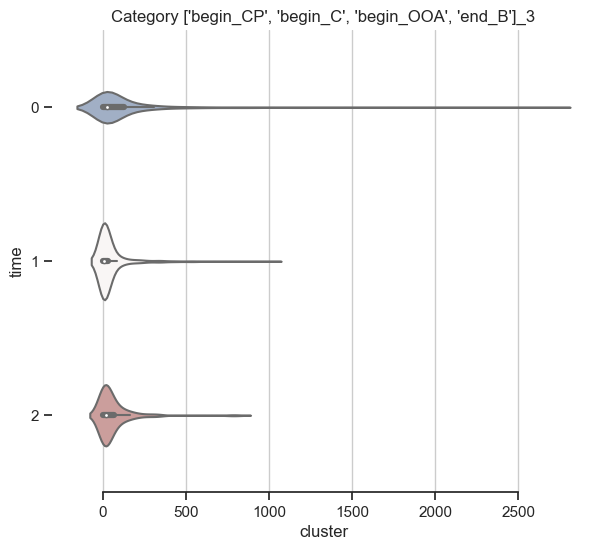

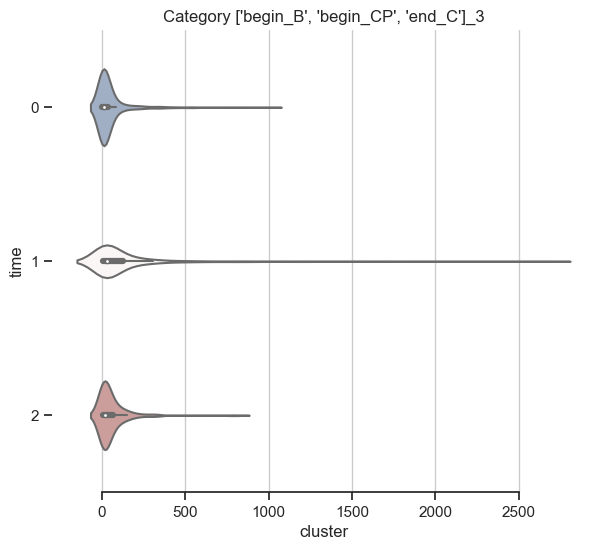

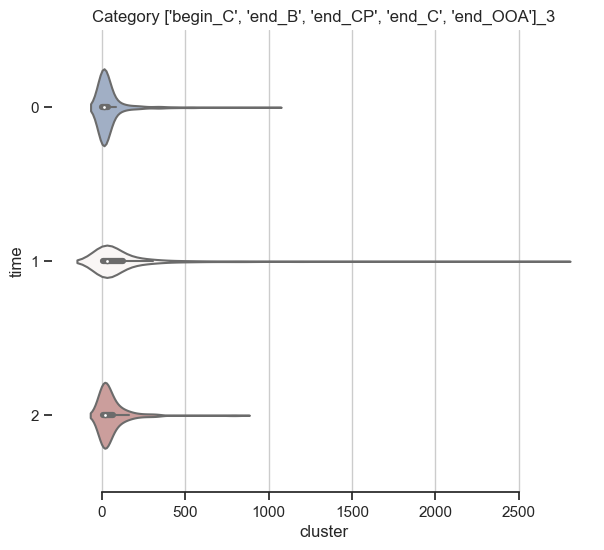

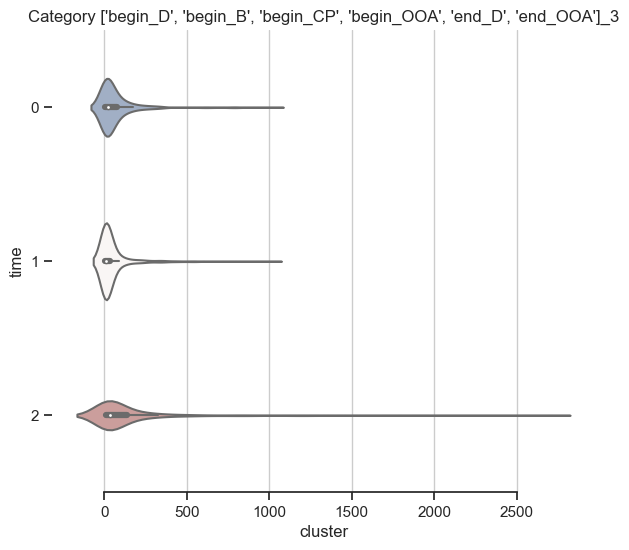

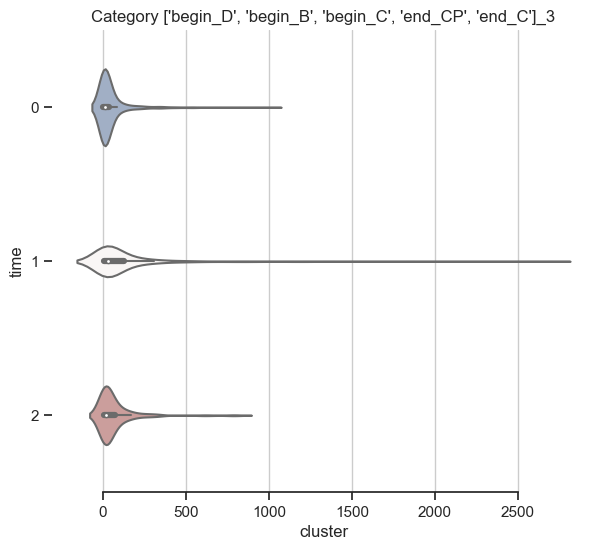

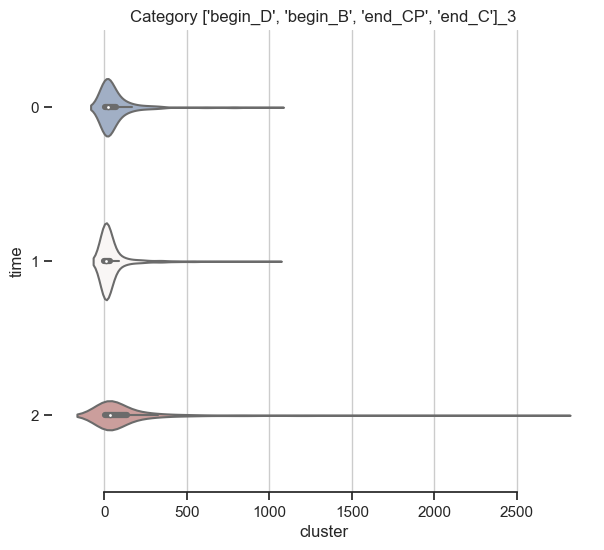

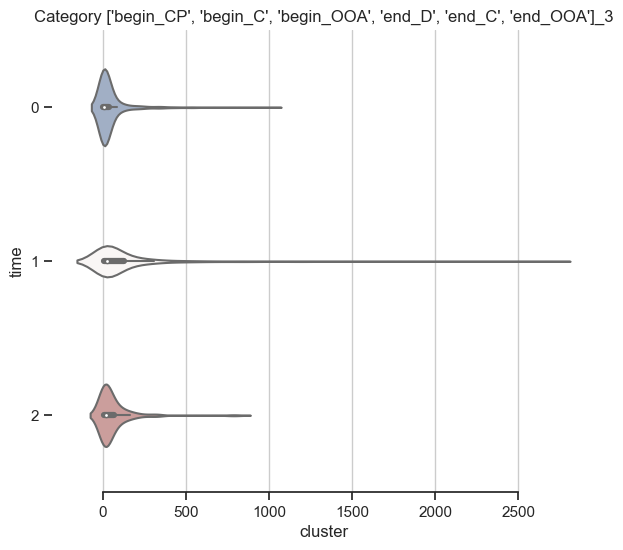

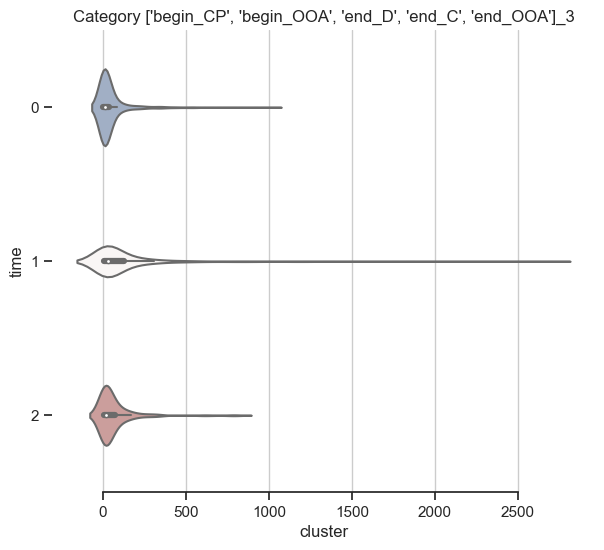

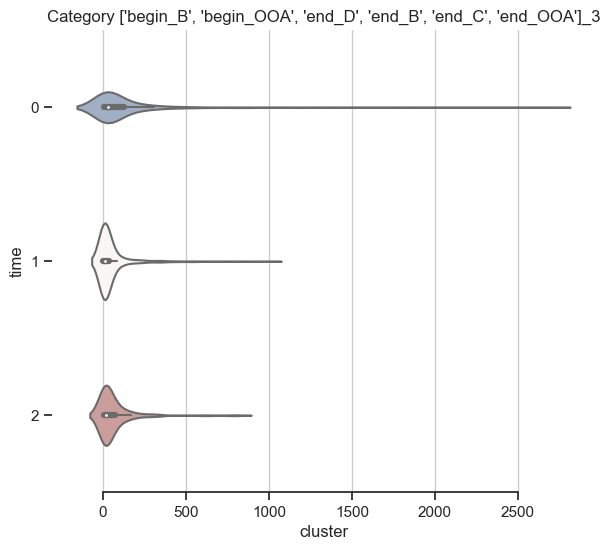

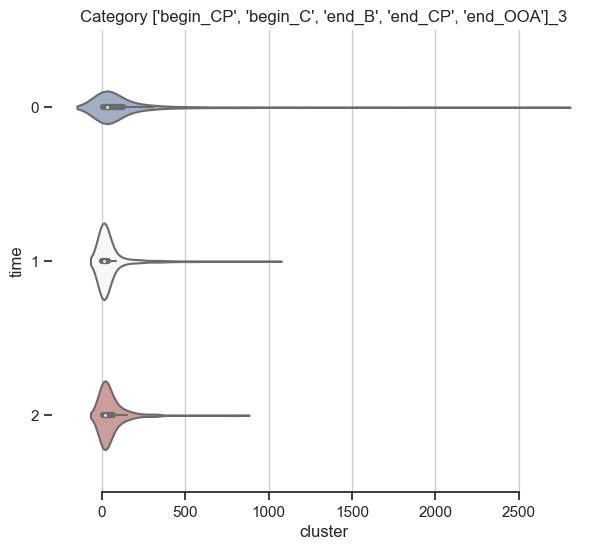

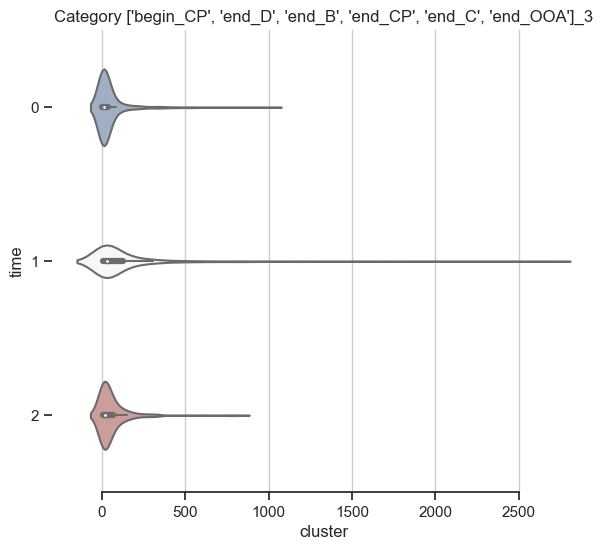

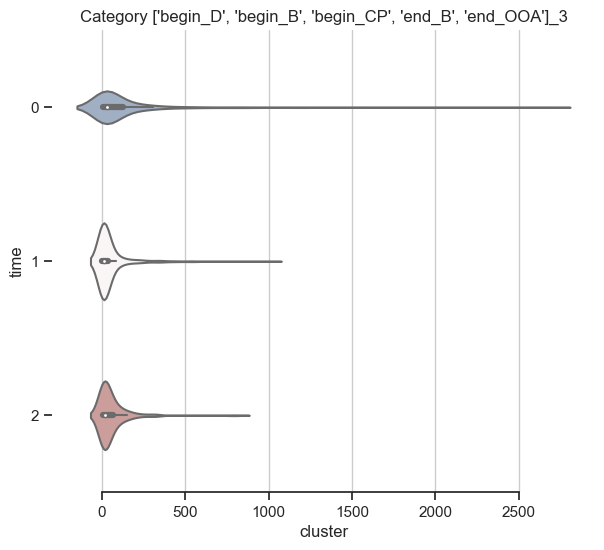

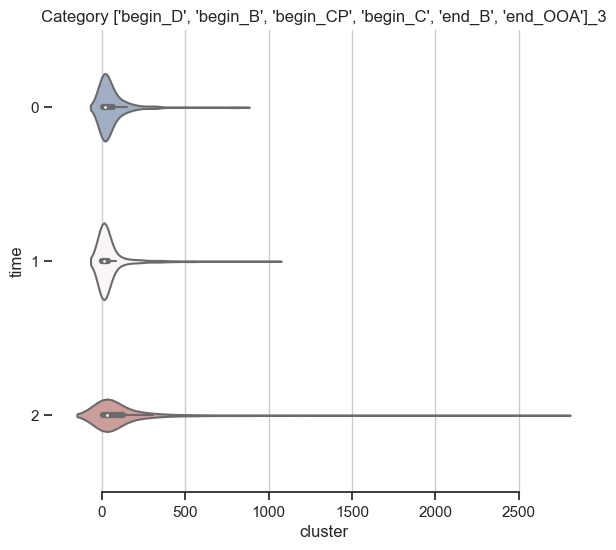

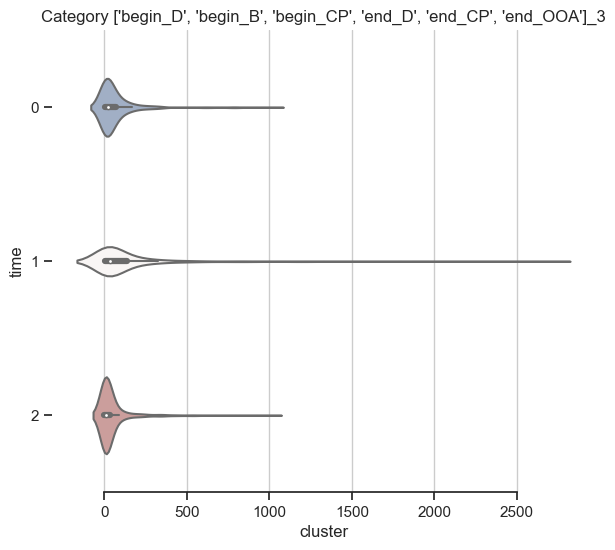

In [2]:
directory_path = r'../../models/KMeans/cluster3'
directory_path_box = r'../../models/Box/3'

parquet_files = [f for f in os.listdir(directory_path) if f.endswith('.parquet')]
print(parquet_files)

# plt.figure(figsize=(12, 8))

for pkl_file in parquet_files:
    file_path = os.path.join(directory_path, pkl_file)
    print("file :::" , file_path)
    variable_name = os.path.splitext(pkl_file)[0]
    print("Var ::" , variable_name)
    df_col_combined = pd.read_pickle(file_path)
    
    
    date = pd.to_timedelta(df_col_combined['total_time'])
    time_hours = date.dt.total_seconds() / 3600
    
    df_col_combined['hours'] = time_hours
    print("DF ::" , df_col_combined)
    
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(7, 6))
    # ax.set_xscale("log") 
    
    # sns.boxplot(df_col_combined, x=df_col_combined.columns[-4], y="hours", 
    #             # orient='h' , 
    #             # whis=[0, 100], 
    #             # width=.5,
    #             showfliers=False,
    #             palette="vlag")
    
    sns.violinplot(df_col_combined, x="hours", y=df_col_combined.columns[-4],  orient='h' , 
                whis=[0, 100], 
                width=.5,  
                palette="vlag")
    
    
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)
    plt.title(f'Category {df_col_combined.columns[-4]}')
    plt.xlabel('cluster')
    plt.ylabel('time')
    
    output_file_path = os.path.splitext("box_violinp")[0] + f'{df_col_combined.columns[-4]}.png'
    plt.savefig(output_file_path)